In [6]:
import pandas as pd
import re 
from glob import glob
from sklearn import metrics

In [2]:
def config_by_filename(f):
    exptype = "tsfresh" if "tsfresh" in f else "raw"
    p = re.compile("(\d+)min_")
    m = p.search(f)
    winsize = m.group(1)
    winconfig = "notcentered" if "notcentered" in f else "centered"
    
    return exptype, winsize, winconfig

In [3]:
files = glob("./pytorch/all_results*")
len(files)

26

In [4]:
dfs = []
for f in files:
    df_tmp = pd.read_csv(f)
    row = df_tmp.sort_values(by="loss").head(1)
    
    exptype, winsize, winconfig = config_by_filename(f)
    row["exptype"] = exptype
    row["winsize"] = winsize
    row["winconfig"] = winconfig
    
    dfs.append(row)
df = pd.concat(dfs)
#df = pd.read_csv("./all_results_expexp_manyTo1_raw_trials50.csv")

In [5]:
# to see all of the columns
pd.set_option('display.max_columns', None)

In [6]:
df = df.sort_values("mcc_main_y", ascending=False).reset_index(drop=True)
df

trial_id      loss  mcc_main_y  acc_main_y  prec_main_y  rec_main_y  \
0   a56ec_00016  0.332164    0.655931    0.867751     0.882687    0.942438   
1   31765_00005  0.325053    0.650427    0.872249     0.892619    0.941531   
2   a88ef_00006  0.354080    0.642221    0.856827     0.882854    0.920814   
3   db21a_00001  0.360568    0.637966    0.855968     0.881473    0.921919   
4   3211f_00012  0.356266    0.637247    0.858253     0.872056    0.939621   
5   88dc2_00000  1.554697    0.633471    0.856604     0.888760    0.916485   
6   b6f6a_00011  0.348921    0.621958    0.858266     0.863679    0.956121   
7   f39a6_00001  1.174104    0.619083    0.860126     0.888488    0.928504   
8   29c09_00009  0.346161    0.614284    0.860586     0.879117    0.942137   
9   732ff_00010  0.436379    0.610405    0.859460     0.877193    0.943108   
10  41f91_00012  0.344300    0.602113    0.860079     0.885422    0.935867   
11  12b3d_00004  3.057291    0.600186    0.848386     0.861091    0.942451   
12  a422b_00006  2.633133    0.595612    0.843000     0.851560    0.944381   
13  97188_00000  0.370717    0.592236    0.847013     0.852343    0.954287   
14  1b315_00011  0.375955    0.591232    0.847256     0.862887    0.939846   
15  04c39_00008  0.640048    0.587751    0.846837     0.856901    0.948289   
16  902c7_00004  0.394626    0.582158    0.838013     0.855490    0.930701   
17  8f7f6_00007  0.390847    0.581502    0.837654     0.847129    0.942070   
18  d297b_00001  0.404285    0.581202    0.835701     0.859022    0.920611   
19  a5c9d_00009  0.604944    0.576935    0.834307     0.852710    0.927096   
20  f5105_00008  1.817164    0.575179    0.852248     0.875326    0.937993   
21  47337_00008  0.356716    0.569541    0.852997     0.863289    0.956928   
22  64971_00018  3.404437    0.563927    0.824987     0.869868    0.888135   
23  477eb_00007  0.450672    0.559715    0.830429     0.841913    0.938683   
24  2653e_00006  3.133668    0.517787    0.835938     0.855530    0.941846   
25  142bf_00014  0.655640    0.000000    0.727424     0.727424    1.000000   

    f1_main_y  time_this_iter_s  done  timesteps_total  episodes_total  \
0    0.863494         76.863428  True              NaN             NaN   
1    0.868430         60.015007  True              NaN             NaN   
2    0.854336         64.699660  True              NaN             NaN   
3    0.853234        162.177852  True              NaN             NaN   
4    0.853266        257.985743  True              NaN             NaN   
5    0.854656         87.148081  True              NaN             NaN   
6    0.850045        175.201222  True              NaN             NaN   
7    0.856772        145.369167  True              NaN             NaN   
8    0.854898         63.646805  True              NaN             NaN   
9    0.853396         66.570263  True              NaN             NaN   
10   0.855270         65.850052  True              NaN             NaN   
11   0.841119         66.834277  True              NaN             NaN   
12   0.834773        326.466655  True              NaN             NaN   
13   0.837016        219.730171  True              NaN             NaN   
14   0.840100        182.745464  True              NaN             NaN   
15   0.837881        531.918918  True              NaN             NaN   
16   0.831377        139.924639  True              NaN             NaN   
17   0.828889         49.951278  True              NaN             NaN   
18   0.830518        124.480376  True              NaN             NaN   
19   0.827811         48.632834  True              NaN             NaN   
20   0.845622         96.458440  True              NaN             NaN   
21   0.841994         85.146792  True              NaN             NaN   
22   0.823527        110.491273  True              NaN             NaN   
23   0.820855         32.795978  True              NaN             NaN   
24   0.824743         66.082668  True             

# MCC comparision for NNs

tsfresh vs. raw

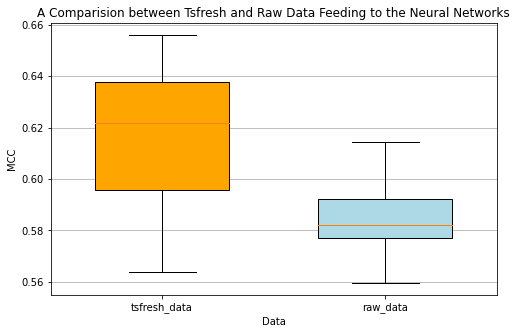

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


# sns.boxplot(x='exptype', y='mcc_main_y', data=df)


tsfresh = df[df['exptype']=='tsfresh']['mcc_main_y']
raw = df[df['exptype']=='raw']['mcc_main_y']


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([tsfresh, raw], labels=['tsfresh_data', 'raw_data'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Tsfresh and Raw Data Feeding to the Neural Networks')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

20min vs 10min vs 40min

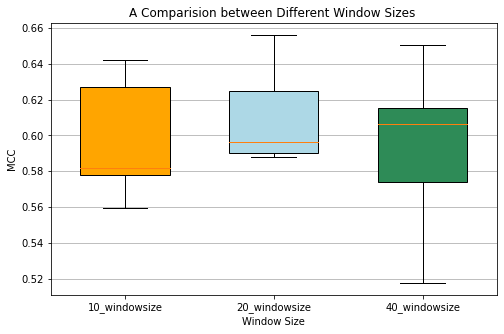

In [80]:
# sns.boxplot(x='winsize', y='mcc_main_y', data=df)

ten = df[df['winsize']== '10']['mcc_main_y']
twenty = df[df['winsize']== '20']['mcc_main_y']
fourty = df[df['winsize']== '40']['mcc_main_y']

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([ten, twenty, fourty], labels=['10_windowsize', '20_windowsize', '40_windowsize'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Different Window Sizes ')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Window Size')
ax.set_ylabel('MCC')

plt.show()

centered vs notcentered

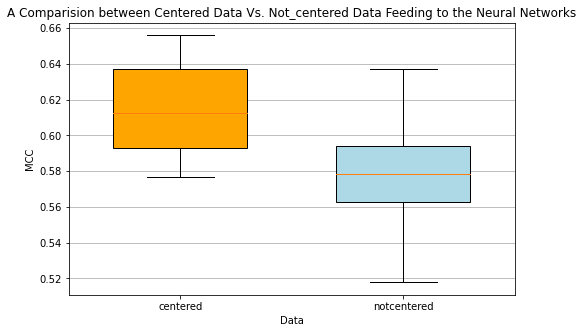

In [81]:
# sns.boxplot(x='winconfig', y='mcc_main_y', data=df)

centered = df[df['winconfig']=='centered']['mcc_main_y']
notcentered = df[df['winconfig']=='notcentered']['mcc_main_y']


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([centered, notcentered], labels=['centered', 'notcentered'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Centered Data Vs. Not_centered Data Feeding to the Neural Networks')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

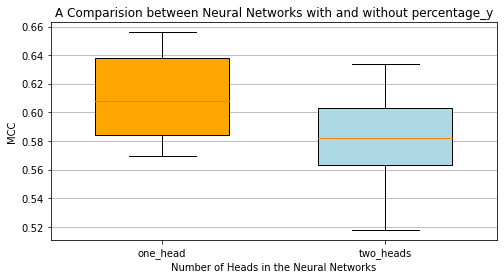

In [83]:
#two heads vs 1 head
# sns.boxplot(x='config.regression_tasks', y='mcc_main_y', data=df)

one_head = df[df['config.regression_tasks']=='[]']['mcc_main_y']
two_heads = df[df['config.regression_tasks']!='[]']['mcc_main_y']


fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([one_head, two_heads], labels=['one_head', 'two_heads'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Neural Networks with and without percentage_y')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Number of Heads in the Neural Networks')
ax.set_ylabel('MCC')

plt.show()

In [84]:
df.iloc[0]#["experiment_tag"]

trial_id                                                             a56ec_00016
loss                                                                    0.332164
mcc_main_y                                                              0.655931
acc_main_y                                                              0.867751
prec_main_y                                                             0.882687
rec_main_y                                                              0.942438
f1_main_y                                                               0.863494
time_this_iter_s                                                         76.8634
done                                                                        True
timesteps_total                                                              NaN
episodes_total                                                               NaN
training_iteration                                                            11
experiment_id               

In [85]:
#df[]

df[(df["config.use_cnn"] == "[True]") & (df["exptype"] == "tsfresh") & (df["winsize"] == "20")]

KeyError: 'config.use_cnn'

In [21]:
df.iloc[0]

trial_id                                                             a56ec_00016
loss                                                                    0.332164
mcc_main_y                                                              0.655931
acc_main_y                                                              0.867751
prec_main_y                                                             0.882687
rec_main_y                                                              0.942438
f1_main_y                                                               0.863494
time_this_iter_s                                                         76.8634
done                                                                        True
timesteps_total                                                              NaN
episodes_total                                                               NaN
training_iteration                                                            11
experiment_id               

# PyCaret Results

In [87]:
#df = pd.read_csv("./ml_predictions/sleep_ml_catboost_test.csv.gz")
files = glob("./pycaret/sleep_ml_*_test.csv.gz")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
    df = pd.concat(dfs)

df.sort_values("MCC", ascending=False)

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Light Gradient Boosting Machine    0.9018  0.9285  0.9592  0.9140  0.9360   
0  Light Gradient Boosting Machine    0.8948  0.9288  0.9574  0.9041  0.9300   
0  Light Gradient Boosting Machine    0.8981  0.9218  0.9561  0.9120  0.9335   
0           Extra Trees Classifier    0.8922  0.9211  0.9539  0.9037  0.9282   
0  Light Gradient Boosting Machine    0.8918  0.9194  0.9568  0.9011  0.9281   
0              Logistic Regression    0.8917  0.9261  0.9557  0.9018  0.9280   
0         Random Forest Classifier    0.8910  0.9222  0.9529  0.9031  0.9273   
0         Random Forest Classifier    0.8961  0.9236  0.9568  0.9091  0.9324   
0           Extra Trees Classifier    0.8958  0.9222  0.9565  0.9090  0.9322   
0              Logistic Regression    0.8954  0.9252  0.9585  0.9071  0.9321   
0     Linear Discriminant Analysis    0.8949  0.9217  0.9604  0.9050  0.9319   
0  Light Gradient Boosting Machine    0.8853  0.9204  0.9550  0.8926  0.9227   
0     Linear Discriminant Analysis    0.8872  0.9230  0.9533  0.8983  0.9250   
0           Extra Trees Classifier    0.8857  0.9117  0.9515  0.8979  0.9240   
0  Light Gradient Boosting Machine    0.8822  0.9131  0.9540  0.8896  0.9207   
0           Extra Trees Classifier    0.8819  0.9119  0.9531  0.8899  0.9204   
0  Light Gradient Boosting Machine    0.8826  0.9165  0.9515  0.8926  0.9211   
0           Extra Trees Classifier    0.8909  0.9160  0.9554  0.9043  0.9291   
0  Light Gradient Boosting Machine    0.8868  0.9171  0.9508  0.9008  0.9251   
0              Logistic Regression    0.8816  0.9152  0.9553  0.8880  0.9204   
0              Logistic Regression    0.8914  0.9217  0.9672  0.8960  0.9302   
0         Random Forest Classifier    0.8812  0.9124  0.9518  0.8900  0.9199   
0  Light Gradient Boosting Machine    0.8861  0.9126  0.9534  0.8981  0.9249   
0              Logistic Regression    0.8843  0.9169  0.9642  0.8870  0.9240   
0         Random Forest Classifier    0.8833  0.9127  0.9495  0.8966  0.9223   
0              Logistic Regression    0.8849  0.9197  0.9514  0.8982  0.9241   
0         Random Forest Classifier    0.8889  0.9158  0.9537  0.9033  0.9278   
0     Linear Discriminant Analysis    0.8785  0.9128  0.9567  0.8834  0.9186   
0  Light Gradient Boosting Machine    0.8789  0.9085  0.9518  0.8881  0.9188   
0         Random Forest Classifier    0.8783  0.9084  0.9485  0.8899  0.9183   
0           Extra Trees Classifier    0.8826  0.9099  0.9482  0.8979  0.9224   
0              Logistic Regression    0.8784  0.9125  0.9529  0.8867  0.9186   
0         Random Forest Classifier    0.8818  0.9109  0.9469  0.8980  0.9218   
0              Logistic Regression    0.8766  0.9062  0.9619  0.8776  0.9178   
0           Extra Trees Classifier    0.8772  0.9078  0.9491  0.8881  0.9176   
0         Random Forest Classifier    0.8758  0.9025  0.9455  0.8885  0.9161   
0           Extra Trees Classifier    0.8759  0.9008  0.9473  0.8872  0.9163   
0     Linear Discriminant Analysis    0.8795  0.9152  0.9745  0.8747  0.9219   
0     Linear Discriminant Analysis    0.8857  0.9209  0.9756  0.8838  0.9274   
0     Linear Discriminant Analysis    0.8802  0.9169  0.9489  0.8947  0.9210   
0     Linear Discriminant Analysis    0.8753  0.9099  0.9551  0.8816  0.9169   
0              Logistic Regression    0.8796  0.9124  0.9632  0.8836  0.9217   
0              Logistic Regression    0.8741  0.9051  0.9620  0.8755  0.9167   
0           Extra Trees Classifier    0.8730  0.8987  0.9473  0.8846  0.9149   
0         Random Forest Classifier    0.8727  0.9000  0.9449  0.8860  0.9145   
0     Linear Discriminant Analysis    0.8720  0.9049  0.9721  0.8658  0.9159   
0  Light Gradient Boosting Machine    0.8864  0.9107  0.9553  0.9016  0.9277   
0  Light Gradient Boosting Machine    0.8856  0.9125  0.9527  0.9026  0.9270   
0           Extra Trees Classifier    0.8757  0.9041  0.9493  0.8893  0.9183   
0              Logistic Regre

# MCC for ML models

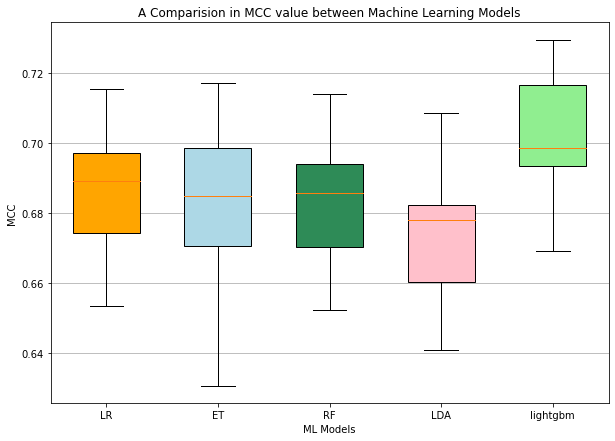

In [91]:

LR = df[df['Model']=='Logistic Regression']['MCC']
ET = df[df['Model']=='Extra Trees Classifier']['MCC']
RF = df[df['Model']=='Random Forest Classifier']['MCC']
LDA = df[df['Model']=='Linear Discriminant Analysis']['MCC']
lightgbm = df[df['Model']=='Light Gradient Boosting Machine']['MCC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
bplot1 =  ax.boxplot([LR, ET, RF, LDA, lightgbm], labels=['LR', 'ET', 'RF', 'LDA', 'lightgbm'],
            vert=True, patch_artist=True, 
            showfliers=False,
            widths=0.6
          )
ax.set_title('A Comparision in MCC value between Machine Learning Models')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('ML Models')
ax.set_ylabel('MCC')

plt.show()

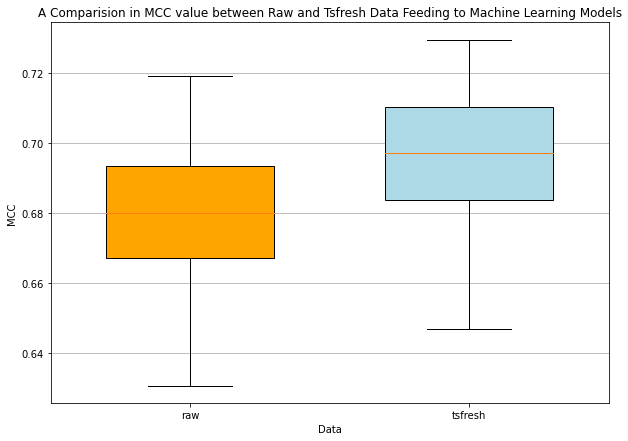

In [93]:
raw = df[df['featset']=='raw']['MCC']
tsfresh = df[df['featset']=='tsfresh']['MCC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([raw, tsfresh], labels=['raw', 'tsfresh'],
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
          )

ax.set_title('A Comparision in MCC value between Raw and Tsfresh Data Feeding to Machine Learning Models')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

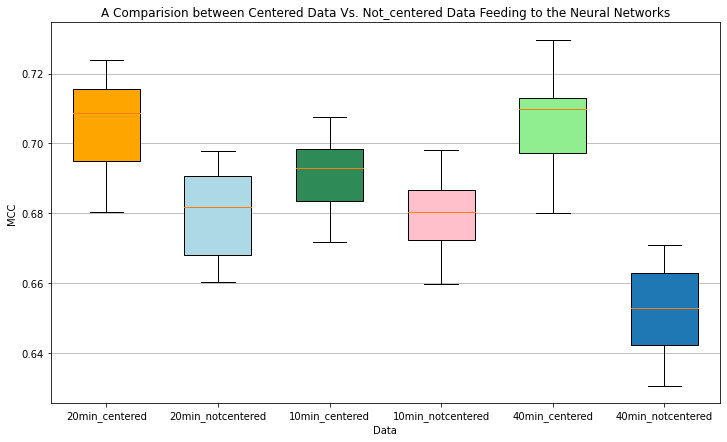

In [97]:

twenty_min_centered = df[df['exp']=='20min_centered']['MCC']
twenty_min_notcentered = df[df['exp']=='20min_notcentered']['MCC']
ten_min_centered = df[df['exp']=='10min_centered']['MCC']
ten_min_notcentered = df[df['exp']=='10min_notcentered']['MCC']
fourty_min_centered = df[df['exp']=='40min_centered']['MCC']
fourty_min_notcentered = df[df['exp']=='40min_notcentered']['MCC']


fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([twenty_min_centered, twenty_min_notcentered, ten_min_centered, ten_min_notcentered, fourty_min_centered, fourty_min_notcentered], labels=['20min_centered', '20min_notcentered', '10min_centered', '10min_notcentered', '40min_centered', '40min_notcentered'],
            vert=True, patch_artist=True, 
            showfliers=False,
            widths=0.6
          )

ax.set_title('A Comparision between Centered Data Vs. Not_centered Data Feeding to the Neural Networks')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

# Baseline Results

In [3]:
def calculate_classification_metrics(labels, predictions):
    return metrics.accuracy_score(labels, predictions), \
           metrics.precision_score(labels, predictions), \
           metrics.recall_score(labels, predictions), \
           metrics.f1_score(labels, predictions), \
           metrics.matthews_corrcoef(labels, predictions)

In [2]:
# the results was previously calculated by using hypnospy

files = glob("../data/processed/mesa/*.csv.gz")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))
    df = pd.concat(dfs)


      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-07 06:57:00  57.157012       0    5006        0.0   
1075       0.0  2017-01-07 06:57:30  58.027847       0    5006        0.0   
1076       0.0  2017-01-07 06:58:00  55.716919       0    5006        0.0   
1077       0.0  2017-01-07 06:58:30  60.323604       0    5006        0.0   
1078       0.0  2017-01-07 06:59:00  51.755615       0    5006        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 07:57:00  66.532121       0    6280        0.0   
1195       4.0  2017-01-03 07:57:30  66.192551       0    6280        4.0   
1196      25.0  2017-01-03 07:58:00  66.425754       0    6280       25.0   
1197       0.0  2017-01-03 07:58:30  57.664914       0    6280        0.0   
1198       0.0  2017-01-03 07:59:00  64.411242       0    6280        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1422      93.0  2017-01-04 08:56:30  75.078112       0    5821       93.0   
1423     236.0  2017-01-04 08:57:00  86.885968       0    5821      236.0   
1424     137.0  2017-01-04 08:57:30  63.108907       0    5821      137.0   
1425      19.0  2017-01-04 08:58:00  73.928681       0    5821       19.0   
1426     142.0  2017-01-04 08:58:30  63.108907       0    5821      142.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1070       0.0  2017-01-05 05:56:30  65.022934       2    2946        0.0   
1071      69.0  2017-01-05 05:57:30  78.199403       0    2946       69.0   
1072      90.0  2017-01-05 05:58:00  81.460961       0    2946       90.0   
1073      34.0  2017-01-05 05:58:30  76.572731       0    2946       34.0   
1074       0.0  2017-01-05 05:59:00  72.926270       0    2946        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 06:57:00  62.433151       2     408        0.0   
1075       0.0  2017-01-05 06:57:30  61.194759       2     408        0.0   
1076       0.0  2017-01-05 06:58:00  62.186313       2     408        0.0   
1077       0.0  2017-01-05 06:58:30  61.842251       2     408        0.0   
1078       0.0  2017-01-05 06:59:00  60.340574       2     408        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1277      41.0  2017-01-06 08:17:30  78.970231       0     193       41.0   
1278     117.0  2017-01-06 08:18:00  84.186332       0     193      117.0   
1279     114.0  2017-01-06 08:18:30  79.519073       0     193      114.0   
1280      37.0  2017-01-06 08:19:00  81.202334       0     193       37.0   
1281     192.0  2017-01-06 08:19:30  86.682390       0     193      192.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1221     215.0  2017-01-04 08:10:30  70.030392       0    6802      215.0   
1222       0.0  2017-01-04 08:23:00  58.922646       0    6802        0.0   
1223       0.0  2017-01-04 08:23:30  68.366079       0    6802        0.0   
1224       1.0  2017-01-04 08:24:00  76.639713       0    6802        1.0   
1225       0.0  2017-01-04 08:24:30  58.922646       0    6802        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1116      12.0  2017-01-03 07:22:30  88.431101       0    1021       12.0   
1117      22.0  2017-01-03 07:23:00  85.810222       0    1021       22.0   
1118      80.0  2017-01-03 07:23:30  88.674845       0    1021       80.0   
1119     121.0  2017-01-03 07:24:00  84.368958       0    1021      121.0   
1120     105.0  2017-01-03 07:24:30  95.503832       0    1021      105.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1045     398.0  2017-01-07 06:45:00  65.355626       0    4311      398.0   
1046     214.0  2017-01-07 06:45:30  68.334659       0    4311      214.0   
1047      89.0  2017-01-07 06:46:00  64.880571       0    4311       89.0   
1048      93.0  2017-01-07 06:46:30  68.035649       0    4311       93.0   
1049     142.0  2017-01-07 06:47:00  71.849160       0    4311      142.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

****
      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1091     415.0  2017-01-06 07:52:30   68.372406       0    2145      415.0   
1092     415.0  2017-01-06 07:53:00   68.372406       0    2145      415.0   
1093     415.0  2017-01-06 07:53:30  118.649912       0    2145      415.0   
1094     238.0  2017-01-06 07:54:00   68.372406       0    2145      238.0   
1095     300.0  2017-01-06 07:59:00   68.372406       0    2145      300.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClin

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
919      22.0  2017-01-03 04:44:30  72.719989       0    1109       22.0   
920      74.0  2017-01-03 04:45:00  72.819023       0    1109       74.0   
921     226.0  2017-01-03 04:45:30  72.832684       0    1109      226.0   
922     294.0  2017-01-03 04:46:00  72.918580       0    1109      294.0   
923     219.0  2017-01-03 04:46:30  74.276850       0    1109      219.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 05:57:00  69.866333       2    5673        0.0   
1195       0.0  2017-01-06 05:57:30  58.145360       2    5673        0.0   
1196       0.0  2017-01-06 05:58:00  74.891324       2    5673        0.0   
1197       0.0  2017-01-06 05:58:30  75.364834       2    5673        0.0   
1198      76.0  2017-01-06 05:59:00  69.695324       2    5673       76.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1145      93.0  2017-01-05 08:32:30  85.439891       0     312       93.0   
1146      96.0  2017-01-05 08:33:00  85.669652       0     312       96.0   
1147       0.0  2017-01-05 08:33:30  79.247601       0     312        0.0   
1148     107.0  2017-01-05 08:34:00  81.447889       0     312      107.0   
1149     111.0  2017-01-05 08:34:30  84.495760       0     312      111.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1034     243.0  2017-01-03 04:49:30  68.355274       0     271      243.0   
1035     350.0  2017-01-03 05:03:00  74.978044       0     271      350.0   
1036     228.0  2017-01-03 05:03:30  68.355274       0     271      228.0   
1037     200.0  2017-01-03 05:04:00  68.355274       0     271      200.0   
1038     307.0  2017-01-03 05:04:30  73.679950       0     271      307.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 07:57:00  70.440145       1    4227        0.0   
1195       0.0  2017-01-05 07:57:30  70.751805       2    4227        0.0   
1196       0.0  2017-01-05 07:58:00  71.360450       2    4227        0.0   
1197       1.0  2017-01-05 07:58:30  72.850438       1    4227        1.0   
1198       0.0  2017-01-05 07:59:00  70.599517       2    4227        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1479     177.0  2017-01-04 09:47:30   82.957516       0    2862      177.0   
1480     149.0  2017-01-04 09:48:00   82.957516       0    2862      149.0   
1481     224.0  2017-01-04 09:48:30  107.169902       0    2862      224.0   
1482     224.0  2017-01-04 09:49:00  116.414281       0    2862      224.0   
1483      67.0  2017-01-04 09:49:30  131.985228       0    2862       67.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
798     125.0  2017-01-05 04:39:00  87.354182       0    3186      125.0   
799     147.0  2017-01-05 04:39:30  84.193165       0    3186      147.0   
800     246.0  2017-01-05 04:40:00  83.719473       0    3186      246.0   
801     222.0  2017-01-05 04:40:30  85.457251       0    3186      222.0   
802     138.0  2017-01-05 04:41:00  81.462062       0    3186      138.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1408      13.0  2017-01-05 08:44:30  74.702587       0    5287       13.0   
1409       0.0  2017-01-05 08:45:00  73.752830       0    5287        0.0   
1410       0.0  2017-01-05 08:45:30  76.913628       0    5287        0.0   
1411       1.0  2017-01-05 08:46:00  77.048489       0    5287        1.0   
1412      17.0  2017-01-05 08:46:30  78.225141       0    5287       17.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1019       0.0  2017-01-04 06:29:30  78.088573       0    1637        0.0   
1020       4.0  2017-01-04 06:30:00  82.637421       0    1637        4.0   
1021      73.0  2017-01-04 06:30:30  83.993598       0    1637       73.0   
1022     194.0  2017-01-04 06:31:00  80.648288       0    1637      194.0   
1023     216.0  2017-01-04 06:31:30  73.624190       0    1637      216.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1093     278.0  2017-01-03 06:10:30  65.011119       0    5299      278.0   
1094     306.0  2017-01-03 06:13:00  65.011119       0    5299      306.0   
1095     207.0  2017-01-03 06:37:00  65.011119       0    5299      207.0   
1096     214.0  2017-01-03 06:37:30  83.889254       0    5299      214.0   
1097     306.0  2017-01-03 06:38:00  65.011119       0    5299      306.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
988       0.0  2017-01-04 07:14:00  77.469738       0    2049        0.0   
989       3.0  2017-01-04 07:14:30  83.532305       0    2049        3.0   
990      59.0  2017-01-04 07:15:00  83.152457       0    2049       59.0   
991     125.0  2017-01-04 07:15:30  81.430948       0    2049      125.0   
992      83.0  2017-01-04 07:16:00  77.285352       0    2049       83.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1097     137.0  2017-01-04 08:51:00  110.595723       0    5053      137.0   
1098     217.0  2017-01-04 08:51:30   87.792540       0    5053      217.0   
1099      57.0  2017-01-04 09:00:00   67.146762       0    5053       57.0   
1100      89.0  2017-01-04 09:00:30   55.872577       0    5053       89.0   
1101      88.0  2017-01-04 09:01:00   55.872577       0    5053       88.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194     234.0  2017-01-03 07:26:30  81.163309       0    4055      234.0   
1195     234.0  2017-01-03 07:27:00  84.369502       0    4055      234.0   
1196     205.0  2017-01-03 07:27:30  82.694765       0    4055      205.0   
1197     266.0  2017-01-03 07:28:00  82.406182       0    4055      266.0   
1198     205.0  2017-01-03 07:28:30  86.463918       0    4055      205.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1062       0.0  2017-01-04 05:51:00  69.021667       0    4128        0.0   
1063       0.0  2017-01-04 05:51:30  63.777802       0    4128        0.0   
1064       0.0  2017-01-04 05:52:00  67.676217       0    4128        0.0   
1065       0.0  2017-01-04 05:52:30  68.802619       0    4128        0.0   
1066       0.0  2017-01-04 05:53:00  71.524340       0    4128        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
895       0.0  2017-01-07 05:27:30  66.289641       0    6261        0.0   
896       0.0  2017-01-07 05:28:00  68.280470       0    6261        0.0   
897       0.0  2017-01-07 05:28:30  67.881664       0    6261        0.0   
898      35.0  2017-01-07 05:29:00  65.809602       0    6261       35.0   
899       0.0  2017-01-07 05:29:30  64.902926       0    6261        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1028       0.0  2017-01-05 05:34:00  87.036337       0     586        0.0   
1029       0.0  2017-01-05 05:34:30  88.408221       0     586        0.0   
1030     137.0  2017-01-05 05:35:00  81.916747       0     586      137.0   
1031     137.0  2017-01-05 05:35:30  83.191182       0     586      137.0   
1032     133.0  2017-01-05 05:36:00  80.149216       0     586      133.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1195       0.0  2017-01-04 07:35:00  52.681765       0    5096        0.0   
1196      72.0  2017-01-04 07:35:30  57.960330       0    5096       72.0   
1197       0.0  2017-01-04 07:36:00  57.960330       0    5096        0.0   
1198       0.0  2017-01-04 07:37:00  49.123686       0    5096        0.0   
1199       0.0  2017-01-04 07:37:30  57.960330       0    5096        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
894     145.0  2017-01-06 05:27:00   98.698775       0    4047      145.0   
895     131.0  2017-01-06 05:27:30   96.924031       0    4047      131.0   
896     249.0  2017-01-06 05:28:00   93.885246       0    4047      249.0   
897     218.0  2017-01-06 05:28:30   92.867259       0    4047      218.0   
898     211.0  2017-01-06 05:29:00  100.791488       0    4047      211.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 05:57:00  76.051658       1    2246        0.0   
1195       0.0  2017-01-06 05:57:30  74.634712       2    2246        0.0   
1196       0.0  2017-01-06 05:58:00  76.135524       2    2246        0.0   
1197       0.0  2017-01-06 05:58:30  73.178992       2    2246        0.0   
1198       0.0  2017-01-06 05:59:00  70.849372       2    2246        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1175     196.0  2017-01-04 07:20:00  81.913048       0     828      196.0   
1176     166.0  2017-01-04 07:20:30  78.964917       0     828      166.0   
1177     149.0  2017-01-04 07:21:00  88.432204       0     828      149.0   
1178       0.0  2017-01-04 07:21:30  85.516029       0     828        0.0   
1179     217.0  2017-01-04 07:22:00  84.109399       0     828      217.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
956      63.0  2017-01-04 07:19:00  71.118043       0     640       63.0   
957      33.0  2017-01-04 07:19:30  71.300992       0     640       33.0   
958      63.0  2017-01-04 07:20:00  71.120084       0     640       63.0   
959      34.0  2017-01-04 07:20:30  68.787280       0     640       34.0   
960      23.0  2017-01-04 07:21:00  67.935977       0     640       23.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1156     167.0  2017-01-05 08:38:00  102.204799       0    6422      167.0   
1157     155.0  2017-01-05 08:44:00   65.550764       0    6422      155.0   
1158     113.0  2017-01-05 08:44:30   65.550764       0    6422      113.0   
1159     234.0  2017-01-05 08:45:00   87.512855       0    6422      234.0   
1160     173.0  2017-01-05 08:45:30   65.550764       0    6422      173.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
999       19.0  2017-01-04 05:19:30  104.086726       0    3389       19.0   
1000     115.0  2017-01-04 05:20:00  106.604840       0    3389      115.0   
1001      71.0  2017-01-04 05:20:30  110.517821       0    3389       71.0   
1002     176.0  2017-01-04 05:21:00  111.573222       0    3389      176.0   
1003     230.0  2017-01-04 05:21:30  112.942703       0    3389      230.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1273      53.0  2017-01-06 06:42:30  86.314890       0    3712       53.0   
1274     142.0  2017-01-06 06:46:30  66.212902       0    3712      142.0   
1275     159.0  2017-01-06 06:47:00  75.526955       0    3712      159.0   
1276     170.0  2017-01-06 06:50:00  70.469796       0    3712      170.0   
1277     256.0  2017-01-06 06:50:30  70.469796       0    3712      256.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1316      93.0  2017-01-06 08:36:00  90.663065       0    3043       93.0   
1317      96.0  2017-01-06 08:36:30  92.611050       0    3043       96.0   
1318     181.0  2017-01-06 08:37:00  94.434139       0    3043      181.0   
1319     147.0  2017-01-06 08:37:30  94.733771       0    3043      147.0   
1320      34.0  2017-01-06 08:38:00  99.416778       0    3043       34.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1304     236.0  2017-01-04 06:24:30  40.154794       0    2325      236.0   
1305     133.0  2017-01-04 06:25:00  43.160523       0    2325      133.0   
1306       0.0  2017-01-04 06:25:30  43.282306       0    2325        0.0   
1307       0.0  2017-01-04 06:26:00  84.979096       0    2325        0.0   
1308       0.0  2017-01-04 06:26:30  84.979096       0    2325        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1085       0.0  2017-01-03 07:10:30  40.947928       0    2192        0.0   
1086       0.0  2017-01-03 07:11:00  62.628935       0    2192        0.0   
1087      86.0  2017-01-03 07:11:30  91.187665       0    2192       86.0   
1088     575.0  2017-01-03 08:38:00  67.255790       0    2192      575.0   
1089     239.0  2017-01-03 08:38:30  62.628935       0    2192      239.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
902     268.0  2017-01-03 03:59:30  88.454870       0    4675      268.0   
903     206.0  2017-01-03 04:00:00  87.870024       0    4675      206.0   
904     244.0  2017-01-03 04:00:30  86.285532       0    4675      244.0   
905     236.0  2017-01-03 04:01:00  85.781383       0    4675      236.0   
906     119.0  2017-01-03 04:01:30  61.548297       0    4675      119.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1249     408.0  2017-01-03 08:58:00  80.189578       0    4935      408.0   
1250     250.0  2017-01-03 09:04:30  67.065250       0    4935      250.0   
1251     130.0  2017-01-03 09:05:00  67.065250       0    4935      130.0   
1252      26.0  2017-01-03 09:05:30  67.065250       0    4935       26.0   
1253     106.0  2017-01-03 09:06:00  67.065250       0    4935      106.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1019       0.0  2017-01-04 05:59:30  84.317694       0    3647        0.0   
1020       0.0  2017-01-04 06:00:00  85.570736       0    3647        0.0   
1021       0.0  2017-01-04 06:00:30  84.348378       0    3647        0.0   
1022       0.0  2017-01-04 06:01:00  79.602391       0    3647        0.0   
1023       0.0  2017-01-04 06:05:30  57.371023       0    3647        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1304      92.0  2017-01-07 08:52:00  79.852420       0    4720       92.0   
1305      48.0  2017-01-07 08:52:30  76.257157       0    4720       48.0   
1306     248.0  2017-01-07 08:53:00  77.631670       0    4720      248.0   
1307     256.0  2017-01-07 08:53:30  78.884405       0    4720      256.0   
1308     128.0  2017-01-07 08:54:00  81.069978       0    4720      128.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1178     207.0  2017-01-03 06:56:30   84.363895       0    4497      207.0   
1179     111.0  2017-01-03 06:57:00   86.462090       0    4497      111.0   
1180     182.0  2017-01-03 06:57:30  106.967936       0    4497      182.0   
1181     271.0  2017-01-03 07:01:00   61.655289       0    4497      271.0   
1182     254.0  2017-01-03 07:01:30   71.906023       0    4497      254.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1214       0.0  2017-01-06 06:41:30  80.792466       0    4948        0.0   
1215       0.0  2017-01-06 06:42:00  78.716815       0    4948        0.0   
1216     109.0  2017-01-06 06:42:30  84.539163       0    4948      109.0   
1217      95.0  2017-01-06 06:43:00  79.393878       0    4948       95.0   
1218     150.0  2017-01-06 06:43:30  82.215493       0    4948      150.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1134       0.0  2017-01-04 08:46:00   61.052082       0    6577        0.0   
1135       0.0  2017-01-04 08:46:30  108.063252       0    6577        0.0   
1136       0.0  2017-01-04 08:47:00   92.975240       0    6577        0.0   
1137      76.0  2017-01-04 08:47:30  115.084523       0    6577       76.0   
1138      23.0  2017-01-04 08:48:00   61.052082       0    6577       23.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1126     151.0  2017-01-05 06:53:00  79.967397       0    6091      151.0   
1127     288.0  2017-01-05 06:53:30  81.105462       0    6091      288.0   
1128     228.0  2017-01-05 06:54:00  83.298733       0    6091      228.0   
1129     175.0  2017-01-05 06:54:30  85.262166       0    6091      175.0   
1130     137.0  2017-01-05 06:55:00  87.808404       0    6091      137.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1072     191.0  2017-01-04 06:56:30  89.126047       0    1510      191.0   
1073     160.0  2017-01-04 06:57:00  96.917993       0    1510      160.0   
1074     211.0  2017-01-04 06:57:30  91.299314       0    1510      211.0   
1075     314.0  2017-01-04 06:58:00  90.132421       0    1510      314.0   
1076     250.0  2017-01-04 06:58:30  91.763349       0    1510      250.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1326     424.0  2017-01-04 07:09:30   97.777607       0     144      424.0   
1327     137.0  2017-01-04 07:10:00  101.336608       0     144      137.0   
1328     244.0  2017-01-04 07:10:30  102.590099       0     144      244.0   
1329     147.0  2017-01-04 07:11:00  108.760715       0     144      147.0   
1330     114.0  2017-01-04 07:11:30   94.875792       0     144      114.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1202     209.0  2017-01-07 06:10:30  83.358998       0     715      209.0   
1203     165.0  2017-01-07 06:11:00  84.925525       0     715      165.0   
1204     202.0  2017-01-07 06:11:30  79.277015       0     715      202.0   
1205     217.0  2017-01-07 06:12:00  80.535228       0     715      217.0   
1206     231.0  2017-01-07 06:12:30  81.582602       0     715      231.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
890     196.0  2017-01-03 04:25:00  68.724251       0     800      196.0   
891     209.0  2017-01-03 04:25:30  73.891835       0     800      209.0   
892     292.0  2017-01-03 04:26:00  68.108155       0     800      292.0   
893     869.0  2017-01-03 04:33:00  62.342318       0     800      869.0   
894     209.0  2017-01-03 04:33:30  62.342318       0     800      209.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
849      21.0  2017-01-05 05:04:30  109.664099       0    6245       21.0   
850      92.0  2017-01-05 05:05:00  109.803357       0    6245       92.0   
851     266.0  2017-01-05 05:05:30  112.052426       0    6245      266.0   
852     204.0  2017-01-05 05:06:00  109.771953       0    6245      204.0   
853     218.0  2017-01-05 05:06:30  109.346863       0    6245      218.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
949       0.0  2017-01-03 04:57:00  81.204129       2    3931        0.0   
950       0.0  2017-01-03 04:57:30  77.661532       2    3931        0.0   
951       0.0  2017-01-03 04:58:00  81.204129       2    3931        0.0   
952       0.0  2017-01-03 04:58:30  81.204129       2    3931        0.0   
953       0.0  2017-01-03 04:59:00  76.313582       2    3931        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
889     271.0  2017-01-04 06:44:30   94.855934       0     768      271.0   
890     263.0  2017-01-04 06:45:00   99.011122       0     768      263.0   
891     263.0  2017-01-04 06:45:30  111.302452       0     768      263.0   
892     255.0  2017-01-04 06:46:00   87.366793       0     768      255.0   
893     247.0  2017-01-04 06:46:30   75.732543       0     768      247.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1006       0.0  2017-01-06 07:23:00  60.888977       0    2362        0.0   
1007      17.0  2017-01-06 07:23:30  61.553407       0    2362       17.0   
1008       0.0  2017-01-06 07:24:00  64.788151       0    2362        0.0   
1009      23.0  2017-01-06 07:24:30  67.146430       0    2362       23.0   
1010     230.0  2017-01-06 07:25:00  67.767379       0    2362      230.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1245       1.0  2017-01-03 09:50:00  131.983914       0    4163        1.0   
1246       1.0  2017-01-03 09:52:00   96.963468       0    4163        1.0   
1247       7.0  2017-01-03 09:53:30  108.971043       0    4163        7.0   
1248     219.0  2017-01-03 10:08:00   99.282788       0    4163      219.0   
1249     160.0  2017-01-03 10:08:30  114.647869       0    4163      160.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1173     133.0  2017-01-06 07:46:30  62.603738       0      48      133.0   
1174     100.0  2017-01-06 07:47:00  67.837807       0      48      100.0   
1175     104.0  2017-01-06 07:47:30  63.724010       0      48      104.0   
1176     207.0  2017-01-06 07:48:00  58.237008       0      48      207.0   
1177      59.0  2017-01-06 07:48:30  66.520795       0      48       59.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1203     239.0  2017-01-05 07:04:00  61.598709       0     971      239.0   
1204     321.0  2017-01-05 07:04:30  62.096649       0     971      321.0   
1205     311.0  2017-01-05 07:05:00  62.699177       0     971      311.0   
1206     112.0  2017-01-05 07:05:30  60.495845       0     971      112.0   
1207     177.0  2017-01-05 07:10:30  58.719508       0     971      177.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1284      59.0  2017-01-05 09:57:00   90.784121       0     382       59.0   
1285     119.0  2017-01-05 09:57:30   91.100965       0     382      119.0   
1286      93.0  2017-01-05 09:58:00   89.060181       0     382       93.0   
1287     142.0  2017-01-05 09:58:30  106.882162       0     382      142.0   
1288     193.0  2017-01-05 09:59:00   91.322723       0     382      193.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1063     129.0  2017-01-05 07:51:30  88.009910       0    5529      129.0   
1064      76.0  2017-01-05 07:52:00  85.846654       0    5529       76.0   
1065      55.0  2017-01-05 07:52:30  85.225636       0    5529       55.0   
1066     143.0  2017-01-05 07:53:00  85.643569       0    5529      143.0   
1067     159.0  2017-01-05 07:53:30  85.037763       0    5529      159.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1114      19.0  2017-01-05 07:21:00   94.947173       0    4839       19.0   
1115      71.0  2017-01-05 07:21:30   94.473706       0    4839       71.0   
1116     115.0  2017-01-05 07:22:00   96.674216       0    4839      115.0   
1117       0.0  2017-01-05 07:22:30  100.891030       0    4839        0.0   
1118      17.0  2017-01-05 07:23:00  103.303734       0    4839       17.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1282     119.0  2017-01-06 07:41:00  58.229990       2    5366      119.0   
1283      57.0  2017-01-06 07:41:30  62.979297       0    5366       57.0   
1284       0.0  2017-01-06 07:42:00  62.299607       0    5366        0.0   
1285       0.0  2017-01-06 07:42:30  62.482580       0    5366        0.0   
1286       0.0  2017-01-06 07:43:00  61.276813       0    5366        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1215       0.0  2017-01-05 06:07:30  77.716249       0    4000        0.0   
1216       0.0  2017-01-05 06:08:00  71.971539       0    4000        0.0   
1217       0.0  2017-01-05 06:08:30  70.000863       0    4000        0.0   
1218     284.0  2017-01-05 06:09:00  70.001955       0    4000      284.0   
1219     312.0  2017-01-05 06:09:30  73.006833       0    4000      312.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1100      82.0  2017-01-02 05:10:00  95.118234       0    5995       82.0   
1101     163.0  2017-01-02 05:10:30  92.976239       0    5995      163.0   
1102     188.0  2017-01-02 05:11:00  94.653696       0    5995      188.0   
1103     118.0  2017-01-02 05:11:30  93.380228       0    5995      118.0   
1104      76.0  2017-01-02 05:12:00  73.865170       0    5995       76.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1227     234.0  2017-01-05 08:14:30  119.523597       0      70      234.0   
1228       2.0  2017-01-05 08:34:30  144.434497       0      70        2.0   
1229      37.0  2017-01-05 08:35:00   82.197132       0      70       37.0   
1230     117.0  2017-01-05 08:35:30  130.185007       0      70      117.0   
1231      27.0  2017-01-05 08:36:00   82.197132       0      70       27.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1156     258.0  2017-01-04 07:42:30  103.657220       0     934      258.0   
1157     258.0  2017-01-04 07:43:00  103.956380       0     934      258.0   
1158     258.0  2017-01-04 07:43:30  104.741005       0     934      258.0   
1159     383.0  2017-01-04 07:56:00   67.057079       0     934      383.0   
1160     204.0  2017-01-04 07:56:30   72.889657       0     934      204.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1200       0.0  2017-01-06 06:03:00  82.688376       0    4026        0.0   
1201       0.0  2017-01-06 06:03:30  75.922712       0    4026        0.0   
1202       0.0  2017-01-06 06:06:00  54.069814       0    4026        0.0   
1203       0.0  2017-01-06 06:06:30  72.817434       0    4026        0.0   
1204      18.0  2017-01-06 06:07:00  60.109258       0    4026       18.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-07 06:57:00  63.427788       3    3710        0.0   
1195       0.0  2017-01-07 06:57:30  63.913302       2    3710        0.0   
1196       0.0  2017-01-07 06:58:00  63.949829       3    3710        0.0   
1197       0.0  2017-01-07 06:58:30  64.222740       2    3710        0.0   
1198       0.0  2017-01-07 06:59:00  65.139132       2    3710        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1160     179.0  2017-01-04 08:15:00  72.646909       0    1459      179.0   
1161     219.0  2017-01-04 08:15:30  74.208436       0    1459      219.0   
1162      81.0  2017-01-04 08:16:00  76.106017       0    1459       81.0   
1163     113.0  2017-01-04 08:16:30  81.601612       0    1459      113.0   
1164      99.0  2017-01-04 08:17:00  69.848998       0    1459       99.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 06:57:00  73.615179       1    2239        0.0   
1075       0.0  2017-01-04 06:57:30  74.824561       2    2239        0.0   
1076       0.0  2017-01-04 06:58:00  75.355951       2    2239        0.0   
1077       0.0  2017-01-04 06:58:30  74.385803       2    2239        0.0   
1078       0.0  2017-01-04 06:59:00  73.266013       2    2239        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
997        0.0  2017-01-05 05:19:00  70.290491       0     113        0.0   
998        0.0  2017-01-05 05:19:30  68.300658       0     113        0.0   
999      129.0  2017-01-05 05:20:00  66.311558       0     113      129.0   
1000       0.0  2017-01-05 05:20:30  66.541282       0     113        0.0   
1001      30.0  2017-01-05 05:21:00  53.526584       0     113       30.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1059     137.0  2017-01-06 05:50:00  90.876952       0    3399      137.0   
1060     151.0  2017-01-06 05:50:30  90.429163       0    3399      151.0   
1061      79.0  2017-01-06 05:51:00  91.049636       0    3399       79.0   
1062      82.0  2017-01-06 05:51:30  92.586739       0    3399       82.0   
1063      59.0  2017-01-06 05:52:00  89.942564       0    3399       59.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1018     221.0  2017-01-05 07:29:00  95.145838       0    2519      221.0   
1019     252.0  2017-01-05 07:29:30  91.918103       0    2519      252.0   
1020     244.0  2017-01-05 07:34:30  76.554779       0    2519      244.0   
1021     147.0  2017-01-05 07:35:00  76.554779       0    2519      147.0   
1022     207.0  2017-01-05 07:35:30  76.554779       0    2519      207.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1261     209.0  2017-01-07 08:15:30  70.014876       0    5503      209.0   
1262     171.0  2017-01-07 08:18:00  70.014876       0    5503      171.0   
1263     165.0  2017-01-07 08:18:30  70.014876       0    5503      165.0   
1264      52.0  2017-01-07 08:19:00  70.014876       0    5503       52.0   
1265     609.0  2017-01-07 08:19:30  70.014876       0    5503      609.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1005      84.0  2017-01-04 06:26:00  78.513567       0    3153       84.0   
1006     334.0  2017-01-04 06:30:30  64.585605       0    3153      334.0   
1007     197.0  2017-01-04 06:31:00  64.585605       0    3153      197.0   
1008     108.0  2017-01-04 06:31:30  64.585605       0    3153      108.0   
1009     144.0  2017-01-04 06:32:00  64.585605       0    3153      144.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
979       0.0  2017-01-07 06:25:00  88.586119       0    3053        0.0   
980      37.0  2017-01-07 06:25:30  80.698756       0    3053       37.0   
981       0.0  2017-01-07 06:26:00  88.494151       0    3053        0.0   
982       0.0  2017-01-07 06:26:30  81.333208       0    3053        0.0   
983     127.0  2017-01-07 06:27:00  90.797440       0    3053      127.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
995     322.0  2017-01-04 06:47:30  77.597950       0    2507      322.0   
996     322.0  2017-01-04 06:48:00  79.759734       0    2507      322.0   
997     378.0  2017-01-04 06:48:30  79.456151       0    2507      378.0   
998     160.0  2017-01-04 06:49:00  76.976267       0    2507      160.0   
999     264.0  2017-01-04 06:49:30  77.057205       0    2507      264.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1179      29.0  2017-01-03 07:49:30  71.814175       0    3761       29.0   
1180       0.0  2017-01-03 07:50:00  79.262085       0    3761        0.0   
1181     163.0  2017-01-03 07:50:30  86.175081       0    3761      163.0   
1182     644.0  2017-01-03 07:51:00  86.542196       0    3761      644.0   
1183     424.0  2017-01-03 07:51:30  82.191522       0    3761      424.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1211       0.0  2017-01-05 07:05:30  67.028243       0    4157        0.0   
1212      33.0  2017-01-05 07:06:00  69.024056       0    4157       33.0   
1213     128.0  2017-01-05 07:06:30  66.751998       0    4157      128.0   
1214       0.0  2017-01-05 07:07:00  66.236686       0    4157        0.0   
1215       2.0  2017-01-05 07:07:30  70.592012       0    4157        2.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1033     145.0  2017-01-04 07:06:30  73.358301       0    5231      145.0   
1034     141.0  2017-01-04 07:07:00  68.304912       0    5231      141.0   
1035     179.0  2017-01-04 07:07:30  65.417563       0    5231      179.0   
1036     131.0  2017-01-04 07:08:00  75.794727       0    5231      131.0   
1037     242.0  2017-01-04 07:08:30  89.885815       0    5231      242.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1280     215.0  2017-01-06 07:24:00  80.253639       0       1      215.0   
1281     194.0  2017-01-06 07:24:30  80.862131       0       1      194.0   
1282     194.0  2017-01-06 07:25:00  81.297593       0       1      194.0   
1283     262.0  2017-01-06 07:25:30  89.617435       0       1      262.0   
1284     299.0  2017-01-06 07:26:00  85.756281       0       1      299.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1205      58.0  2017-01-07 07:17:30   91.667471       0     910       58.0   
1206       8.0  2017-01-07 07:18:00  103.198157       0     910        8.0   
1207      14.0  2017-01-07 07:18:30  102.900110       0     910       14.0   
1208      42.0  2017-01-07 07:19:00  103.847943       0     910       42.0   
1209      49.0  2017-01-07 07:19:30  105.093694       0     910       49.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1146      54.0  2017-01-03 06:33:30  74.683443       0    2798       54.0   
1147      38.0  2017-01-03 06:34:00  74.980732       0    2798       38.0   
1148     100.0  2017-01-03 06:34:30  79.032823       0    2798      100.0   
1149     110.0  2017-01-03 06:35:00  76.596638       0    2798      110.0   
1150      93.0  2017-01-03 06:35:30  82.860964       0    2798       93.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1306     312.0  2017-01-07 06:55:00  100.594266       0    1085      312.0   
1307     380.0  2017-01-07 06:55:30   99.980561       0    1085      380.0   
1308     256.0  2017-01-07 06:56:00   96.577706       0    1085      256.0   
1309     203.0  2017-01-07 06:56:30   94.574465       0    1085      203.0   
1310     322.0  2017-01-07 06:57:00  101.444508       0    1085      322.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1068       0.0  2017-01-03 06:59:00   49.763894       0    2303        0.0   
1069       0.0  2017-01-03 06:59:30   44.557528       0    2303        0.0   
1070       0.0  2017-01-03 07:19:30  105.890436       0    2303        0.0   
1071     198.0  2017-01-03 07:58:30  120.333291       0    2303      198.0   
1072      95.0  2017-01-03 07:59:00  117.193513       0    2303       95.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
613     133.0  2017-01-04 03:38:00  60.881102       0    4846      133.0   
614     107.0  2017-01-04 03:38:30  60.648142       0    4846      107.0   
615      56.0  2017-01-04 03:39:00  60.993156       0    4846       56.0   
616     107.0  2017-01-04 03:39:30  61.674140       0    4846      107.0   
617     104.0  2017-01-04 03:40:00  67.540817       0    4846      104.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
932      73.0  2017-01-04 04:48:00  85.918466       0    5364       73.0   
933     157.0  2017-01-04 04:48:30  92.031887       0    5364      157.0   
934     111.0  2017-01-04 04:49:00  83.832654       0    5364      111.0   
935       0.0  2017-01-04 04:49:30  87.092767       0    5364        0.0   
936     133.0  2017-01-04 04:50:00  90.609748       0    5364      133.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1066      96.0  2017-01-06 05:57:00  80.547824       2    3842       96.0   
1067     297.0  2017-01-06 05:57:30  73.411664       3    3842      297.0   
1068     566.0  2017-01-06 05:58:00  80.547824       3    3842      566.0   
1069     157.0  2017-01-06 05:58:30  72.657974       2    3842      157.0   
1070       0.0  2017-01-06 05:59:00  75.467559       2    3842        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
875      12.0  2017-01-06 02:52:00  85.167584       0     380       12.0   
876     123.0  2017-01-06 02:56:00  71.876390       0     380      123.0   
877     279.0  2017-01-06 02:56:30  64.935966       0     380      279.0   
878     340.0  2017-01-06 02:57:00  58.867200       0     380      340.0   
879     375.0  2017-01-06 02:57:30  71.876390       0     380      375.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       4.0  2017-01-04 07:57:00  74.508469       0    6567        4.0   
1195       1.0  2017-01-04 07:57:30  73.959309       0    6567        1.0   
1196       5.0  2017-01-04 07:58:00  74.816779       2    6567        5.0   
1197       8.0  2017-01-04 07:58:30  74.955783       1    6567        8.0   
1198       0.0  2017-01-04 07:59:00  75.893576       0    6567        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 07:57:00  70.858956       0    4958        0.0   
1195       7.0  2017-01-06 07:57:30  78.726521       0    4958        7.0   
1196      57.0  2017-01-06 07:58:00  78.284388       0    4958       57.0   
1197      94.0  2017-01-06 07:58:30  72.447933       0    4958       94.0   
1198      65.0  2017-01-06 07:59:00  74.999134       0    4958       65.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1110     128.0  2017-01-03 07:15:00  89.298525       0    6416      128.0   
1111     168.0  2017-01-03 07:15:30  91.273128       0    6416      168.0   
1112     179.0  2017-01-03 07:16:00  88.203376       0    6416      179.0   
1113     158.0  2017-01-03 07:16:30  88.719731       0    6416      158.0   
1114     141.0  2017-01-03 07:17:00  89.789950       0    6416      141.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1262      72.0  2017-01-05 09:12:00  79.484424       0    6516       72.0   
1263      96.0  2017-01-05 09:12:30  60.842931       0    6516       96.0   
1264      28.0  2017-01-05 09:13:00  71.544775       0    6516       28.0   
1265      59.0  2017-01-05 09:13:30  97.858590       0    6516       59.0   
1266      83.0  2017-01-05 09:14:00  49.381382       0    6516       83.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1314     128.0  2017-01-02 07:27:00  87.875102       0    5885      128.0   
1315     147.0  2017-01-02 07:27:30  87.984323       0    5885      147.0   
1316     175.0  2017-01-02 07:28:00  88.118074       0    5885      175.0   
1317     128.0  2017-01-02 07:28:30  83.489746       0    5885      128.0   
1318      66.0  2017-01-02 07:29:00  83.367747       0    5885       66.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
879       0.0  2017-01-07 06:15:30  74.626463       0    5527        0.0   
880      13.0  2017-01-07 06:16:00  78.232513       0    5527       13.0   
881       0.0  2017-01-07 06:16:30  75.319460       0    5527        0.0   
882       0.0  2017-01-07 06:17:00  80.168179       0    5527        0.0   
883      41.0  2017-01-07 06:17:30  88.969813       0    5527       41.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      68.0  2017-01-05 04:57:00  68.870847       0    4110       68.0   
1195      31.0  2017-01-05 04:57:30  65.735758       0    4110       31.0   
1196      36.0  2017-01-05 04:58:00  63.458600       0    4110       36.0   
1197       0.0  2017-01-05 04:58:30  58.669018       0    4110        0.0   
1198       0.0  2017-01-05 04:59:00  67.733607       0    4110        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1155     125.0  2017-01-04 07:12:00  70.279224       0    3833      125.0   
1156      80.0  2017-01-04 07:13:00  70.391858       0    3833       80.0   
1157     101.0  2017-01-04 07:13:30  67.023033       0    3833      101.0   
1158     115.0  2017-01-04 07:14:00  66.745278       0    3833      115.0   
1159      10.0  2017-01-04 07:14:30  64.196662       0    3833       10.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1326     116.0  2017-01-03 08:08:30  106.861668       0    4622      116.0   
1327     155.0  2017-01-03 08:09:00  110.545125       0    4622      155.0   
1328     367.0  2017-01-03 08:09:30  109.646599       0    4622      367.0   
1329     155.0  2017-01-03 08:10:00  115.749378       0    4622      155.0   
1330     322.0  2017-01-03 08:10:30  109.271353       0    4622      322.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1081     116.0  2017-01-03 06:00:30   81.103540       0    1089      116.0   
1082      55.0  2017-01-03 06:01:00   76.792641       0    1089       55.0   
1083     257.0  2017-01-03 06:08:30  136.386203       0    1089      257.0   
1084     323.0  2017-01-03 06:10:00   70.500182       0    1089      323.0   
1085     312.0  2017-01-03 06:10:30   70.500182       0    1089      312.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
975     216.0  2017-01-05 05:07:30  74.092220       0    2372      216.0   
976     216.0  2017-01-05 05:08:00  79.467495       0    2372      216.0   
977      82.0  2017-01-05 05:12:30  60.681925       0    2372       82.0   
978     265.0  2017-01-05 05:13:30  60.681925       0    2372      265.0   
979     203.0  2017-01-05 05:14:00  60.681925       0    2372      203.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 05:57:00  49.440794       2     292        0.0   
1195       0.0  2017-01-04 05:57:30  60.604787       0     292        0.0   
1196       0.0  2017-01-04 05:58:00  72.003533       0     292        0.0   
1197       0.0  2017-01-04 05:58:30  53.191574       0     292        0.0   
1198       0.0  2017-01-04 05:59:00  53.511228       0     292        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1076     358.0  2017-01-07 06:10:00   92.052847       0    6224      358.0   
1077     304.0  2017-01-07 06:10:30   97.429351       0    6224      304.0   
1078     168.0  2017-01-07 07:48:30   46.473717       0    6224      168.0   
1079     198.0  2017-01-07 07:49:30  104.497393       0    6224      198.0   
1080     463.0  2017-01-07 07:50:00  101.901238       0    6224      463.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1193       0.0  2017-01-03 07:56:30  55.993207       0    1672        0.0   
1194       0.0  2017-01-03 07:57:00  55.285163       0    1672        0.0   
1195       0.0  2017-01-03 07:57:30  54.256768       0    1672        0.0   
1196       0.0  2017-01-03 07:58:00  53.518651       1    1672        0.0   
1197       0.0  2017-01-03 07:58:30  51.514133       1    1672        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1066     306.0  2017-01-06 05:52:00  92.091492       0    1772      306.0   
1067     328.0  2017-01-06 05:54:30  79.449498       0    1772      328.0   
1068     350.0  2017-01-06 05:55:00  65.059234       0    1772      350.0   
1069     236.0  2017-01-06 05:55:30  75.447913       0    1772      236.0   
1070     338.0  2017-01-06 05:56:00  76.263597       0    1772      338.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1158     212.0  2017-01-03 07:09:00  98.863298       0    5108      212.0   
1159     295.0  2017-01-03 07:09:30  94.360004       0    5108      295.0   
1160     286.0  2017-01-03 07:10:00  91.131273       0    5108      286.0   
1161     450.0  2017-01-03 07:10:30  94.684289       0    5108      450.0   
1162     479.0  2017-01-03 07:11:00  90.835554       0    5108      479.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1113      60.0  2017-01-04 08:17:00  79.225782       0    3558       60.0   
1114     126.0  2017-01-04 08:17:30  80.246402       0    3558      126.0   
1115      94.0  2017-01-04 08:18:00  82.361845       0    3558       94.0   
1116     135.0  2017-01-04 08:18:30  84.659773       0    3558      135.0   
1117     276.0  2017-01-04 08:19:00  83.038846       0    3558      276.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1309       6.0  2017-01-06 09:17:00  126.490249       0    3987        6.0   
1310      86.0  2017-01-06 09:17:30   61.764107       0    3987       86.0   
1311      90.0  2017-01-06 09:18:00   61.764107       0    3987       90.0   
1312     144.0  2017-01-06 09:18:30   61.764107       0    3987      144.0   
1313     165.0  2017-01-06 09:19:00   61.764107       0    3987      165.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1298     183.0  2017-01-05 08:22:30  60.768157       0    6139      183.0   
1299     171.0  2017-01-05 08:23:00  61.737593       0    6139      171.0   
1300     239.0  2017-01-05 08:23:30  60.602852       0    6139      239.0   
1301     130.0  2017-01-05 08:24:00  60.704888       0    6139      130.0   
1302     155.0  2017-01-05 08:24:30  61.588152       0    6139      155.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
945     168.0  2017-01-04 06:15:00  79.434968       0    1879      168.0   
946     132.0  2017-01-04 06:15:30  81.635882       0    1879      132.0   
947     279.0  2017-01-04 06:18:00  65.672580       0    1879      279.0   
948     147.0  2017-01-04 06:18:30  65.672580       0    1879      147.0   
949     162.0  2017-01-04 06:19:00  86.118937       0    1879      162.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1324       1.0  2017-01-03 09:50:30   60.542757       0    4521        1.0   
1325      11.0  2017-01-03 09:51:00   60.542757       0    4521       11.0   
1326      17.0  2017-01-03 09:51:30  138.219179       0    4521       17.0   
1327      67.0  2017-01-03 09:54:30   60.542757       0    4521       67.0   
1328       1.0  2017-01-03 09:58:30   60.542757       0    4521        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1189       0.0  2017-01-06 07:57:00  68.002618       0    1140        0.0   
1190       0.0  2017-01-06 07:57:30  73.154818       0    1140        0.0   
1191      21.0  2017-01-06 07:58:00  71.436097       0    1140       21.0   
1192       0.0  2017-01-06 07:58:30  72.702257       0    1140        0.0   
1193       0.0  2017-01-06 07:59:00  72.937337       0    1140        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
996       46.0  2017-01-03 06:14:00  61.349544       0    1760       46.0   
997       46.0  2017-01-03 06:14:30  71.326664       0    1760       46.0   
998       48.0  2017-01-03 06:15:00  61.545802       0    1760       48.0   
999       83.0  2017-01-03 06:15:30  66.213261       0    1760       83.0   
1000      55.0  2017-01-03 06:16:00  69.886670       0    1760       55.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 05:57:00  69.179800       0    6707        0.0   
1195       0.0  2017-01-05 05:57:30  59.126710       1    6707        0.0   
1196       0.0  2017-01-05 05:58:00  59.671437       1    6707        0.0   
1197       0.0  2017-01-05 05:58:30  57.745949       4    6707        0.0   
1198      75.0  2017-01-05 05:59:00  57.177007       4    6707       75.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1095     107.0  2017-01-06 07:08:30  73.065765       0    5167      107.0   
1096     339.0  2017-01-06 07:09:00  74.852683       0    5167      339.0   
1097     374.0  2017-01-06 07:09:30  74.384066       0    5167      374.0   
1098     307.0  2017-01-06 07:10:00  77.176839       0    5167      307.0   
1099     228.0  2017-01-06 07:10:30  63.894806       0    5167      228.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1165     119.0  2017-01-05 07:47:00  62.459775       0    3537      119.0   
1166     350.0  2017-01-05 07:47:30  62.459775       0    3537      350.0   
1167     278.0  2017-01-05 07:48:00  51.022439       0    3537      278.0   
1168     214.0  2017-01-05 07:48:30  66.391794       0    3537      214.0   
1169     133.0  2017-01-05 07:49:00  62.459775       0    3537      133.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
977       0.0  2017-01-04 05:08:30  84.353194       0    3554        0.0   
978       0.0  2017-01-04 05:09:00  96.375971       0    3554        0.0   
979       0.0  2017-01-04 05:09:30  98.198775       0    3554        0.0   
980       0.0  2017-01-04 05:10:00  95.854756       0    3554        0.0   
981       0.0  2017-01-04 05:10:30  91.349503       0    3554        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1072       0.0  2017-01-04 07:57:00  58.920230       4    3378        0.0   
1073       0.0  2017-01-04 07:57:30  58.629647       4    3378        0.0   
1074       0.0  2017-01-04 07:58:00  62.068532       4    3378        0.0   
1075       0.0  2017-01-04 07:58:30  61.178415       4    3378        0.0   
1076       0.0  2017-01-04 07:59:00  61.989263       4    3378        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1133       0.0  2017-01-04 08:56:30  61.473441       0    6382        0.0   
1134      39.0  2017-01-04 08:57:00  68.428805       0    6382       39.0   
1135      65.0  2017-01-04 08:57:30  64.722506       0    6382       65.0   
1136     174.0  2017-01-04 08:58:00  66.825025       0    6382      174.0   
1137     227.0  2017-01-04 08:58:30  67.963743       0    6382      227.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1435     574.0  2017-01-03 08:01:30  92.739835       0    5179      574.0   
1436      95.0  2017-01-03 08:08:00  48.343873       0    5179       95.0   
1437     459.0  2017-01-03 08:08:30  51.791422       0    5179      459.0   
1438     430.0  2017-01-03 08:09:00  75.298559       0    5179      430.0   
1439      37.0  2017-01-03 08:59:00  75.298559       0    5179       37.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1037     200.0  2017-01-03 07:40:30  81.970823       0     183      200.0   
1038     244.0  2017-01-03 07:41:00  83.248749       0     183      244.0   
1039     133.0  2017-01-03 07:41:30  86.409873       0     183      133.0   
1040     244.0  2017-01-03 07:42:00  84.321214       0     183      244.0   
1041     163.0  2017-01-03 07:42:30  76.682951       0     183      163.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1040      45.0  2017-01-04 07:10:00  73.527726       0    1756       45.0   
1041     144.0  2017-01-04 07:13:30  66.607522       0    1756      144.0   
1042     100.0  2017-01-04 07:14:00  66.607522       0    1756      100.0   
1043     274.0  2017-01-04 07:15:30  66.607522       0    1756      274.0   
1044     170.0  2017-01-04 07:16:00  66.607522       0    1756      170.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
834       0.0  2017-01-05 04:57:00  54.576677       2    5151        0.0   
835     200.0  2017-01-05 04:57:30  53.543508       2    5151      200.0   
836     207.0  2017-01-05 04:58:00  54.077536       2    5151      207.0   
837     193.0  2017-01-05 04:58:30  54.598788       2    5151      193.0   
838      86.0  2017-01-05 04:59:00  55.828760       2    5151       86.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1014     224.0  2017-01-06 06:27:00  85.974878       0    4254      224.0   
1015     117.0  2017-01-06 06:29:00  82.089985       0    4254      117.0   
1016      75.0  2017-01-06 06:30:00  66.108832       0    4254       75.0   
1017     130.0  2017-01-06 06:30:30  66.108832       0    4254      130.0   
1018     139.0  2017-01-06 06:31:00  66.108832       0    4254      139.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1262     332.0  2017-01-06 08:21:30   88.722969       0    2055      332.0   
1263     121.0  2017-01-06 08:22:00   86.581660       0    2055      121.0   
1264     248.0  2017-01-06 08:33:30   88.509287       0    2055      248.0   
1265     459.0  2017-01-06 08:36:00   63.894983       0    2055      459.0   
1266      25.0  2017-01-06 08:49:30  120.044440       0    2055       25.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
950     232.0  2017-01-05 07:30:00  54.666316       0    4229      232.0   
951     190.0  2017-01-05 07:30:30  54.666316       0    4229      190.0   
952     183.0  2017-01-05 07:47:30  54.666316       0    4229      183.0   
953     433.0  2017-01-05 07:48:00  44.665707       0    4229      433.0   
954     380.0  2017-01-05 07:49:00  54.666316       0    4229      380.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1059       0.0  2017-01-03 06:30:00  89.182445       0    6172        0.0   
1060       0.0  2017-01-03 06:30:30  95.614790       0    6172        0.0   
1061       0.0  2017-01-03 06:31:00  92.845415       0    6172        0.0   
1062       0.0  2017-01-03 06:31:30  88.305043       0    6172        0.0   
1063       0.0  2017-01-03 06:32:00  92.562111       0    6172        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1118       1.0  2017-01-04 07:19:30  66.137623       2    1951        1.0   
1119       0.0  2017-01-04 07:20:00  81.841865       0    1951        0.0   
1120       0.0  2017-01-04 07:20:30  88.137095       0    1951        0.0   
1121       2.0  2017-01-04 07:21:00  97.445049       0    1951        2.0   
1122      29.0  2017-01-04 07:21:30  93.706320       0    1951       29.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1161      16.0  2017-01-03 10:03:00   75.639202       0    6723       16.0   
1162      14.0  2017-01-03 10:03:30   99.312732       0    6723       14.0   
1163      10.0  2017-01-03 10:04:00  127.406403       0    6723       10.0   
1164      52.0  2017-01-03 10:18:00   94.517608       0    6723       52.0   
1165       7.0  2017-01-03 10:18:30   52.098430       0    6723        7.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1232     582.0  2017-01-03 08:48:00  103.252793       0     522      582.0   
1233     751.0  2017-01-03 08:48:30  116.231243       0     522      751.0   
1234     879.0  2017-01-03 08:49:00   98.231732       0     522      879.0   
1235     601.0  2017-01-03 08:49:30   57.643124       0     522      601.0   
1236     683.0  2017-01-03 08:50:00   57.643124       0     522      683.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1147       0.0  2017-01-07 07:57:00  61.133244       2    5907        0.0   
1148       0.0  2017-01-07 07:57:30  61.245259       2    5907        0.0   
1149       0.0  2017-01-07 07:58:00  67.569706       0    5907        0.0   
1150       0.0  2017-01-07 07:58:30  67.479638       0    5907        0.0   
1151       0.0  2017-01-07 07:59:00  64.287805       0    5907        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1131     185.0  2017-01-04 06:45:00  56.738147       0    1068      185.0   
1132     185.0  2017-01-04 06:45:30  61.809141       0    1068      185.0   
1133     106.0  2017-01-04 06:46:00  75.160675       0    1068      106.0   
1134       0.0  2017-01-04 06:46:30  75.160675       0    1068        0.0   
1135       0.0  2017-01-04 06:47:00  75.160675       0    1068        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1066     134.0  2017-01-07 05:53:00  85.569062       0    4417      134.0   
1067     159.0  2017-01-07 05:57:00  60.969586       0    4417      159.0   
1068     202.0  2017-01-07 05:57:30  60.969586       0    4417      202.0   
1069     154.0  2017-01-07 05:58:30  60.969586       0    4417      154.0   
1070     105.0  2017-01-07 06:50:30  60.969586       0    4417      105.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1326     268.0  2017-01-03 08:04:30  66.419071       0    3570      268.0   
1327     220.0  2017-01-03 08:05:00  62.472649       0    3570      220.0   
1328     220.0  2017-01-03 08:05:30  63.769972       0    3570      220.0   
1329     186.0  2017-01-03 08:06:00  62.724108       0    3570      186.0   
1330      48.0  2017-01-03 08:06:30  63.339157       0    3570       48.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
963       9.0  2017-01-06 06:35:30  73.460449       0    5864        9.0   
964       6.0  2017-01-06 06:36:00  76.720059       0    5864        6.0   
965      17.0  2017-01-06 06:36:30  73.625816       0    5864       17.0   
966      29.0  2017-01-06 06:37:00  83.386021       0    5864       29.0   
967      41.0  2017-01-06 06:37:30  65.353325       0    5864       41.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
924     252.0  2017-01-03 04:42:00  74.486779       0    6011      252.0   
925     288.0  2017-01-03 04:42:30  64.087352       0    6011      288.0   
926     438.0  2017-01-03 04:43:00  67.849124       0    6011      438.0   
927     306.0  2017-01-03 04:43:30  67.293016       0    6011      306.0   
928     269.0  2017-01-03 04:44:00  63.468484       0    6011      269.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1032     160.0  2017-01-06 07:17:00  64.349536       0    5881      160.0   
1033      77.0  2017-01-06 07:17:30  64.349536       0    5881       77.0   
1034     190.0  2017-01-06 07:18:00  64.349536       0    5881      190.0   
1035      57.0  2017-01-06 07:18:30  64.349536       0    5881       57.0   
1036       0.0  2017-01-06 07:19:00  64.349536       0    5881        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1050     147.0  2017-01-03 07:56:30  62.960325       0    5272      147.0   
1051      73.0  2017-01-03 07:57:30  62.960325       0    5272       73.0   
1052      15.0  2017-01-03 07:58:00  62.960325       0    5272       15.0   
1053      16.0  2017-01-03 07:58:30  62.960325       0    5272       16.0   
1054      33.0  2017-01-03 07:59:00  62.960325       0    5272       33.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
971      94.0  2017-01-04 07:05:30  86.607868       0     288       94.0   
972     120.0  2017-01-04 07:06:00  85.781949       0     288      120.0   
973     331.0  2017-01-04 08:30:30  66.213349       0     288      331.0   
974     183.0  2017-01-04 08:31:00  83.147287       0     288      183.0   
975     120.0  2017-01-04 08:31:30  76.113236       0     288      120.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1029     124.0  2017-01-06 06:40:30  73.280525       0    2268      124.0   
1030     230.0  2017-01-06 06:41:00  80.522126       0    2268      230.0   
1031     230.0  2017-01-06 06:41:30  77.067401       0    2268      230.0   
1032     209.0  2017-01-06 06:42:00  75.752333       0    2268      209.0   
1033      64.0  2017-01-06 06:45:00  52.709727       0    2268       64.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1141       1.0  2017-01-04 07:33:00  78.170674       0    4638        1.0   
1142      17.0  2017-01-04 07:33:30  78.170674       0    4638       17.0   
1143       0.0  2017-01-04 07:34:00  73.432478       0    4638        0.0   
1144      12.0  2017-01-04 07:37:00  78.170674       0    4638       12.0   
1145      35.0  2017-01-04 07:38:00  78.170674       0    4638       35.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
877      77.0  2017-01-03 03:48:30  99.807700       0    1516       77.0   
878      62.0  2017-01-03 03:49:00  98.216070       0    1516       62.0   
879      87.0  2017-01-03 03:49:30  80.150394       0    1516       87.0   
880     130.0  2017-01-03 03:50:00  85.827201       0    1516      130.0   
881      95.0  2017-01-03 03:50:30  74.528568       0    1516       95.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1012       0.0  2017-01-03 06:27:00  54.193862       0    6097        0.0   
1013     226.0  2017-01-03 06:27:30  52.230154       0    6097      226.0   
1014     370.0  2017-01-03 06:28:00  64.031569       0    6097      370.0   
1015     102.0  2017-01-03 06:28:30  65.123036       0    6097      102.0   
1016     464.0  2017-01-03 06:29:00  66.312450       0    6097      464.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
941     217.0  2017-01-05 05:19:00  68.991487       0    3854      217.0   
942     159.0  2017-01-05 05:19:30  67.697049       0    3854      159.0   
943      47.0  2017-01-05 05:20:00  67.891494       0    3854       47.0   
944       1.0  2017-01-05 05:20:30  68.629189       0    3854        1.0   
945      23.0  2017-01-05 05:21:00  69.550235       0    3854       23.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
864     118.0  2017-01-06 04:12:00  63.723051       0    2376      118.0   
865      88.0  2017-01-06 04:12:30  65.137117       0    2376       88.0   
866      68.0  2017-01-06 04:13:00  66.388638       0    2376       68.0   
867      84.0  2017-01-06 04:13:30  65.840484       0    2376       84.0   
868      95.0  2017-01-06 04:14:00  67.279668       0    2376       95.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1012     182.0  2017-01-06 04:56:00  74.085539       0    3630      182.0   
1013     123.0  2017-01-06 04:56:30  64.655272       0    3630      123.0   
1014     107.0  2017-01-06 04:57:00  69.440934       0    3630      107.0   
1015      18.0  2017-01-06 04:57:30  67.078801       0    3630       18.0   
1016     200.0  2017-01-06 04:58:00  68.688509       0    3630      200.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
893       0.0  2017-01-06 05:29:30   99.522794       0    2556        0.0   
894       0.0  2017-01-06 05:30:00   93.958258       0    2556        0.0   
895       0.0  2017-01-06 05:30:30  101.011952       0    2556        0.0   
896      45.0  2017-01-06 05:31:00  102.709313       0    2556       45.0   
897       1.0  2017-01-06 05:31:30  105.675888       0    2556        1.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1192       0.0  2017-01-04 05:57:00  54.958822       2    5686        0.0   
1193       0.0  2017-01-04 05:57:30  54.627864       2    5686        0.0   
1194       0.0  2017-01-04 05:58:00  54.311269       2    5686        0.0   
1195       0.0  2017-01-04 05:58:30  55.650213       2    5686        0.0   
1196       0.0  2017-01-04 05:59:00  56.322087       2    5686        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1084     163.0  2017-01-05 07:17:30  76.747174       0     914      163.0   
1085     163.0  2017-01-05 07:18:00  76.747174       0     914      163.0   
1086     152.0  2017-01-05 07:20:30  76.747174       0     914      152.0   
1087      50.0  2017-01-05 07:22:00  76.747174       0     914       50.0   
1088     180.0  2017-01-05 07:22:30  76.747174       0     914      180.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1094     230.0  2017-01-05 06:57:00   67.878390       0    4649      230.0   
1095     365.0  2017-01-05 06:57:30   82.935464       0    4649      365.0   
1096     365.0  2017-01-05 06:58:00   83.202340       0    4649      365.0   
1097     300.0  2017-01-05 06:58:30  103.580002       0    4649      300.0   
1098     377.0  2017-01-05 06:59:00   67.878390       0    4649      377.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1224     118.0  2017-01-06 07:27:30  76.831539       0     762      118.0   
1225      73.0  2017-01-06 07:28:00  82.339024       0     762       73.0   
1226     176.0  2017-01-06 07:28:30  83.928000       0     762      176.0   
1227     115.0  2017-01-06 07:29:00  89.227553       0     762      115.0   
1228     143.0  2017-01-06 07:29:30  77.902662       0     762      143.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1118       0.0  2017-01-05 06:27:00  81.407256       0    1404        0.0   
1119       0.0  2017-01-05 06:27:30  74.278348       4    1404        0.0   
1120       0.0  2017-01-05 06:28:00  65.586760       4    1404        0.0   
1121       0.0  2017-01-05 06:28:30  72.673288       4    1404        0.0   
1122       0.0  2017-01-05 06:29:00  83.980407       4    1404        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1128      19.0  2017-01-03 06:30:00  76.088310       0     977       19.0   
1129     153.0  2017-01-03 06:30:30  75.941532       0     977      153.0   
1130     223.0  2017-01-03 06:31:00  75.697380       0     977      223.0   
1131     320.0  2017-01-03 06:31:30  72.060905       0     977      320.0   
1132     177.0  2017-01-03 06:32:00  68.199666       0     977      177.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1099     223.0  2017-01-04 06:09:30  73.810100       0    4165      223.0   
1100      97.0  2017-01-04 06:10:00  72.475100       0    4165       97.0   
1101     143.0  2017-01-04 06:10:30  71.957159       0    4165      143.0   
1102     101.0  2017-01-04 06:11:00  74.213100       0    4165      101.0   
1103     120.0  2017-01-04 06:11:30  74.702145       0    4165      120.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1012     104.0  2017-01-05 05:48:00  69.043353       0    1328      104.0   
1013     124.0  2017-01-05 05:48:30  68.330311       0    1328      124.0   
1014     129.0  2017-01-05 05:49:00  68.235351       0    1328      129.0   
1015      83.0  2017-01-05 05:49:30  67.999337       0    1328       83.0   
1016      94.0  2017-01-05 05:50:00  69.695983       0    1328       94.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1058      21.0  2017-01-06 06:49:00  78.904481       0    4974       21.0   
1059      62.0  2017-01-06 06:49:30  80.147397       0    4974       62.0   
1060       0.0  2017-01-06 06:50:00  80.450094       0    4974        0.0   
1061     101.0  2017-01-06 06:50:30  78.586187       0    4974      101.0   
1062     143.0  2017-01-06 06:51:00  77.405235       0    4974      143.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 05:57:00  59.126844       4    6781        0.0   
1075       0.0  2017-01-05 05:57:30  59.003964       0    6781        0.0   
1076       0.0  2017-01-05 05:58:00  58.553535       1    6781        0.0   
1077      82.0  2017-01-05 05:58:30  57.640658       4    6781       82.0   
1078     188.0  2017-01-05 05:59:00  61.697888       0    6781      188.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1074     140.0  2017-01-03 06:57:00   99.060515       0    1890      140.0   
1075      35.0  2017-01-03 06:57:30  100.608724       0    1890       35.0   
1076       0.0  2017-01-03 06:58:00   97.778837       0    1890        0.0   
1077       7.0  2017-01-03 06:58:30   95.539398       0    1890        7.0   
1078      61.0  2017-01-03 06:59:00   97.790618       0    1890       61.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
998       70.0  2017-01-05 05:01:30  71.597441       0     105       70.0   
999      119.0  2017-01-05 05:02:00  71.946133       0     105      119.0   
1000     163.0  2017-01-05 05:02:30  69.535993       0     105      163.0   
1001     110.0  2017-01-05 05:03:00  70.808344       0     105      110.0   
1002     123.0  2017-01-05 05:03:30  75.294321       0     105      123.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1067      87.0  2017-01-04 07:06:00  72.639904       0    3801       87.0   
1068     209.0  2017-01-04 07:06:30  72.584883       0    3801      209.0   
1069     165.0  2017-01-04 07:07:00  83.585321       0    3801      165.0   
1070     159.0  2017-01-04 07:07:30  82.696685       0    3801      159.0   
1071     238.0  2017-01-04 07:08:00  76.740494       0    3801      238.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1041       0.0  2017-01-04 05:57:00  70.707155       4    2572        0.0   
1042       0.0  2017-01-04 05:57:30  84.576407       0    2572        0.0   
1043       0.0  2017-01-04 05:58:00  78.789825       4    2572        0.0   
1044       0.0  2017-01-04 05:58:30  78.149122       4    2572        0.0   
1045       0.0  2017-01-04 05:59:00  72.700795       4    2572        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
801     116.0  2017-01-03 05:19:30  67.535450       0    2094      116.0   
802     240.0  2017-01-03 05:20:00  67.444879       0    2094      240.0   
803     101.0  2017-01-03 07:14:00  66.128264       0    2094      101.0   
804     101.0  2017-01-03 07:15:00  66.128264       0    2094      101.0   
805     217.0  2017-01-03 07:15:30  66.128264       0    2094      217.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
808     122.0  2017-01-05 05:44:00  73.549192       0    5239      122.0   
809     142.0  2017-01-05 05:49:30  65.310127       0    5239      142.0   
810     187.0  2017-01-05 05:50:00  65.310127       0    5239      187.0   
811     228.0  2017-01-05 05:50:30  65.310127       0    5239      228.0   
812      84.0  2017-01-05 05:51:00  65.310127       0    5239       84.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1275       0.0  2017-01-05 08:39:00  82.925036       0    1212        0.0   
1276      21.0  2017-01-05 08:39:30  82.337586       0    1212       21.0   
1277       0.0  2017-01-05 08:40:00  82.509583       0    1212        0.0   
1278      11.0  2017-01-05 08:40:30  81.745200       0    1212       11.0   
1279       0.0  2017-01-05 08:41:00  82.655699       0    1212        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 05:57:00  56.746299       2    6424        0.0   
1195       0.0  2017-01-05 05:57:30  56.948097       2    6424        0.0   
1196       0.0  2017-01-05 05:58:00  57.756136       0    6424        0.0   
1197       0.0  2017-01-05 05:58:30  61.239306       0    6424        0.0   
1198       0.0  2017-01-05 05:59:00  57.463307       1    6424        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 07:57:00  58.006859       0    6447        0.0   
1195       0.0  2017-01-03 07:57:30  55.820983       1    6447        0.0   
1196       0.0  2017-01-03 07:58:00  59.587563       0    6447        0.0   
1197       0.0  2017-01-03 07:58:30  59.144676       1    6447        0.0   
1198       0.0  2017-01-03 07:59:00  57.654858       1    6447        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1512     268.0  2017-01-06 08:15:00   97.914552       0    1797      268.0   
1513     315.0  2017-01-06 08:15:30  100.603087       0    1797      315.0   
1514      11.0  2017-01-06 08:18:30   66.266205       0    1797       11.0   
1515     286.0  2017-01-06 08:19:00   49.625227       0    1797      286.0   
1516     383.0  2017-01-06 08:19:30   66.266205       0    1797      383.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1241     298.0  2017-01-07 07:32:30  84.034249       0    4141      298.0   
1242     230.0  2017-01-07 07:33:00  83.474031       0    4141      230.0   
1243     214.0  2017-01-07 07:33:30  85.435067       0    4141      214.0   
1244     181.0  2017-01-07 07:34:00  83.192761       0    4141      181.0   
1245     111.0  2017-01-07 07:34:30  90.602341       0    4141      111.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1143     184.0  2017-01-06 08:10:00   73.165603       0    2297      184.0   
1144      91.0  2017-01-06 08:10:30  109.586097       0    2297       91.0   
1145      95.0  2017-01-06 08:11:00  101.957445       0    2297       95.0   
1146       0.0  2017-01-06 08:11:30  102.214981       0    2297        0.0   
1147       0.0  2017-01-06 08:12:00   73.165603       0    2297        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
995       0.0  2017-01-06 06:17:30  85.593146       0    5047        0.0   
996      13.0  2017-01-06 06:18:00  84.948348       0    5047       13.0   
997      69.0  2017-01-06 06:18:30  79.971069       0    5047       69.0   
998      43.0  2017-01-06 06:24:00  91.261571       0    5047       43.0   
999      60.0  2017-01-06 06:24:30  55.197659       0    5047       60.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1231     234.0  2017-01-03 07:50:00  66.245223       0    6727      234.0   
1232      58.0  2017-01-03 08:30:00  66.245223       0    6727       58.0   
1233      41.0  2017-01-03 08:30:30  93.928593       0    6727       41.0   
1234      70.0  2017-01-03 08:37:00  66.245223       0    6727       70.0   
1235       0.0  2017-01-03 08:37:30  66.245223       0    6727        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1179       0.0  2017-01-03 07:57:00  53.403273       4     791        0.0   
1180       0.0  2017-01-03 07:57:30  53.338136       4     791        0.0   
1181       0.0  2017-01-03 07:58:00  54.626169       4     791        0.0   
1182       0.0  2017-01-03 07:58:30  54.560735       1     791        0.0   
1183       0.0  2017-01-03 07:59:00  53.998846       4     791        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
846     341.0  2017-01-03 03:33:30  93.316802       0     526      341.0   
847     365.0  2017-01-03 03:34:00  93.100921       0     526      365.0   
848     238.0  2017-01-03 03:34:30  99.610169       0     526      238.0   
849     171.0  2017-01-03 03:35:00  94.048514       0     526      171.0   
850     353.0  2017-01-03 03:35:30  73.920214       0     526      353.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1378     181.0  2017-01-04 08:51:30  57.898759       0    4088      181.0   
1379     147.0  2017-01-04 08:52:00  89.609235       0    4088      147.0   
1380     107.0  2017-01-04 08:52:30  57.898759       0    4088      107.0   
1381     244.0  2017-01-04 08:53:00  57.898759       0    4088      244.0   
1382     193.0  2017-01-04 08:53:30  57.898759       0    4088      193.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
962     222.0  2017-01-04 07:03:00  47.768077       0    6115      222.0   
963     271.0  2017-01-04 07:05:30  50.542097       0    6115      271.0   
964     104.0  2017-01-04 07:06:00  50.542097       0    6115      104.0   
965     329.0  2017-01-04 07:07:00  50.542097       0    6115      329.0   
966      71.0  2017-01-04 07:51:00  50.542097       0    6115       71.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1073     467.0  2017-01-06 07:52:00  56.075666       0    6015      467.0   
1074     244.0  2017-01-06 07:52:30  56.075666       0    6015      244.0   
1075     373.0  2017-01-06 07:53:00  56.075666       0    6015      373.0   
1076     181.0  2017-01-06 07:53:30  56.075666       0    6015      181.0   
1077     317.0  2017-01-06 07:54:00  56.075666       0    6015      317.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
977       0.0  2017-01-04 06:13:30  78.043185       0    2807        0.0   
978       0.0  2017-01-04 06:14:00  81.185855       0    2807        0.0   
979       0.0  2017-01-04 06:14:30  85.035619       0    2807        0.0   
980       0.0  2017-01-04 06:15:00  93.277041       0    2807        0.0   
981      39.0  2017-01-04 06:15:30  89.231118       0    2807       39.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1103      96.0  2017-01-04 06:56:30  73.308130       0    2043       96.0   
1104     100.0  2017-01-04 06:57:00  70.910952       0    2043      100.0   
1105     248.0  2017-01-04 07:00:00  87.020455       0    2043      248.0   
1106     265.0  2017-01-04 07:00:30  51.075785       0    2043      265.0   
1107     116.0  2017-01-04 07:05:30  51.075785       0    2043      116.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
827     283.0  2017-01-03 05:49:00  72.846478       0    3354      283.0   
828     178.0  2017-01-03 05:49:30  79.076234       0    3354      178.0   
829     183.0  2017-01-03 05:57:30  82.198287       0    3354      183.0   
830     160.0  2017-01-03 06:11:30  65.439085       0    3354      160.0   
831     149.0  2017-01-03 06:32:00  65.439085       0    3354      149.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 04:57:00  50.523657       0    6648        0.0   
1195      13.0  2017-01-03 04:57:30  49.604137       0    6648       13.0   
1196      17.0  2017-01-03 04:58:00  50.181115       0    6648       17.0   
1197       0.0  2017-01-03 04:58:30  47.961697       0    6648        0.0   
1198       0.0  2017-01-03 04:59:00  51.512510       0    6648        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1142     137.0  2017-01-06 06:31:00   75.979332       0     318      137.0   
1143      45.0  2017-01-06 06:31:30  107.091621       0     318       45.0   
1144      73.0  2017-01-06 06:32:00  107.141487       0     318       73.0   
1145     127.0  2017-01-06 06:32:30  102.556588       0     318      127.0   
1146     110.0  2017-01-06 06:33:00   98.464236       0     318      110.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
676      78.0  2017-01-06 03:48:00  75.201670       0    6064       78.0   
677      53.0  2017-01-06 03:48:30  71.811917       1    6064       53.0   
678      60.0  2017-01-06 03:49:00  72.497669       2    6064       60.0   
679       0.0  2017-01-06 03:49:30  75.086823       0    6064        0.0   
680      70.0  2017-01-06 03:50:00  69.928476       0    6064       70.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
941     271.0  2017-01-06 06:19:00  87.110019       0    6482      271.0   
942     236.0  2017-01-06 06:21:30  56.458815       0    6482      236.0   
943     138.0  2017-01-06 06:22:00  55.951711       0    6482      138.0   
944     329.0  2017-01-06 06:23:00  55.951711       0    6482      329.0   
945     329.0  2017-01-06 06:23:30  55.951711       0    6482      329.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-06 05:57:00  68.423686       4    1752        0.0   
1075       0.0  2017-01-06 05:57:30  66.643878       4    1752        0.0   
1076       0.0  2017-01-06 05:58:00  67.515420       4    1752        0.0   
1077       0.0  2017-01-06 05:58:30  66.353364       4    1752        0.0   
1078       0.0  2017-01-06 05:59:00  60.396473       4    1752        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1307     255.0  2017-01-06 08:57:00  69.409946       0    2868      255.0   
1308     177.0  2017-01-06 08:57:30  69.409946       0    2868      177.0   
1309     223.0  2017-01-06 08:58:00  69.409946       0    2868      223.0   
1310     201.0  2017-01-06 08:58:30  69.409946       0    2868      201.0   
1311       6.0  2017-01-06 08:59:00  69.409946       0    2868        6.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
926     153.0  2017-01-05 05:12:30  94.536659       0    6656      153.0   
927     194.0  2017-01-05 05:13:00  94.196639       0    6656      194.0   
928     209.0  2017-01-05 05:13:30  92.243191       0    6656      209.0   
929     536.0  2017-01-05 05:19:30  77.218427       0    6656      536.0   
930     230.0  2017-01-05 05:20:00  77.218427       0    6656      230.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1007      67.0  2017-01-03 06:23:30  121.179270       0    4501       67.0   
1008     131.0  2017-01-03 06:24:00  109.613883       0    4501      131.0   
1009     168.0  2017-01-03 06:26:00  109.229774       0    4501      168.0   
1010       1.0  2017-01-03 06:31:30   79.936710       0    4501        1.0   
1011       0.0  2017-01-03 06:32:00   79.936710       0    4501        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1374     176.0  2017-01-06 08:59:30  61.272151       0    5632      176.0   
1375     163.0  2017-01-06 09:00:00  71.355519       0    5632      163.0   
1376     299.0  2017-01-06 09:00:30  48.197569       0    5632      299.0   
1377     163.0  2017-01-06 09:01:00  76.891920       0    5632      163.0   
1378     329.0  2017-01-06 09:01:30  61.272151       0    5632      329.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 05:57:00  58.255685       0    5163        0.0   
1075       0.0  2017-01-04 05:57:30  66.802561       0    5163        0.0   
1076       0.0  2017-01-04 05:58:00  79.445403       0    5163        0.0   
1077       0.0  2017-01-04 05:58:30  57.498448       0    5163        0.0   
1078       0.0  2017-01-04 05:59:00  57.718444       0    5163        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1175      79.0  2017-01-05 07:20:30  80.350555       0    1619       79.0   
1176     107.0  2017-01-05 07:21:00  82.748267       0    1619      107.0   
1177     200.0  2017-01-05 07:21:30  84.685672       0    1619      200.0   
1178     175.0  2017-01-05 07:22:00  81.881988       0    1619      175.0   
1179     157.0  2017-01-05 07:22:30  74.099618       0    1619      157.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194     118.0  2017-01-04 06:57:00  85.230190       0    6298      118.0   
1195     128.0  2017-01-04 06:57:30  82.289108       0    6298      128.0   
1196      93.0  2017-01-04 06:58:00  83.698451       0    6298       93.0   
1197     128.0  2017-01-04 06:58:30  83.372370       0    6298      128.0   
1198     111.0  2017-01-04 06:59:00  81.539068       0    6298      111.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1242     200.0  2017-01-04 08:00:30  73.675503       0    2104      200.0   
1243     128.0  2017-01-04 08:03:00  59.624454       0    2104      128.0   
1244     169.0  2017-01-04 08:03:30  98.274299       0    2104      169.0   
1245     147.0  2017-01-04 08:04:00  62.111968       0    2104      147.0   
1246     252.0  2017-01-04 08:04:30  85.843189       0    2104      252.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1008       0.0  2017-01-06 06:24:00  76.563879       0    4529        0.0   
1009       0.0  2017-01-06 06:24:30  80.935049       0    4529        0.0   
1010       0.0  2017-01-06 06:25:00  83.926372       0    4529        0.0   
1011       0.0  2017-01-06 06:25:30  83.908591       0    4529        0.0   
1012       1.0  2017-01-06 06:26:00  82.561104       0    4529        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1308      98.0  2017-01-03 08:27:00  74.140837       0    6052       98.0   
1309      55.0  2017-01-03 08:27:30  73.289491       0    6052       55.0   
1310      77.0  2017-01-03 08:28:00  80.984350       0    6052       77.0   
1311      80.0  2017-01-03 08:28:30  84.269038       0    6052       80.0   
1312      98.0  2017-01-03 08:29:00  86.769818       0    6052       98.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1403      87.0  2017-01-07 07:54:30  57.147086       0    6286       87.0   
1404     105.0  2017-01-07 07:55:00  59.848210       0    6286      105.0   
1405      74.0  2017-01-07 07:55:30  57.614147       0    6286       74.0   
1406       0.0  2017-01-07 07:56:00  60.898156       0    6286        0.0   
1407       7.0  2017-01-07 07:56:30  65.073429       0    6286        7.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1066      68.0  2017-01-06 06:27:00   68.362652       0    1607       68.0   
1067      18.0  2017-01-06 06:27:30   98.328442       0    1607       18.0   
1068      39.0  2017-01-06 06:28:00   83.381012       0    1607       39.0   
1069     100.0  2017-01-06 06:28:30   89.692416       0    1607      100.0   
1070     123.0  2017-01-06 06:29:00  101.564985       0    1607      123.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
808      80.0  2017-01-05 06:47:30  74.534434       0    2636       80.0   
809      62.0  2017-01-05 06:48:00  43.189139       0    2636       62.0   
810      83.0  2017-01-05 06:48:30  74.534434       0    2636       83.0   
811      83.0  2017-01-05 06:49:00  74.534434       0    2636       83.0   
812      75.0  2017-01-05 06:49:30  78.241490       0    2636       75.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1035     170.0  2017-01-06 07:09:30  62.698404       0    4895      170.0   
1036     626.0  2017-01-06 07:10:00  62.698404       0    4895      626.0   
1037     667.0  2017-01-06 07:10:30  92.580459       0    4895      667.0   
1038     626.0  2017-01-06 07:11:00  97.531072       0    4895      626.0   
1039     782.0  2017-01-06 07:11:30  62.698404       0    4895      782.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1140       0.0  2017-01-05 05:33:00  76.593077       0    4366        0.0   
1141       0.0  2017-01-05 05:33:30  79.407519       0    4366        0.0   
1142      61.0  2017-01-05 05:34:00  78.754549       0    4366       61.0   
1143     127.0  2017-01-05 05:34:30  77.238547       0    4366      127.0   
1144     212.0  2017-01-05 05:35:00  76.976362       0    4366      212.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
805      40.0  2017-01-06 06:12:30  59.461300       0    4266       40.0   
806       9.0  2017-01-06 06:13:00  64.334241       0    4266        9.0   
807       1.0  2017-01-06 06:13:30  64.278299       0    4266        1.0   
808       0.0  2017-01-06 06:14:00  73.943032       0    4266        0.0   
809      19.0  2017-01-06 06:14:30  72.508956       0    4266       19.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1183     205.0  2017-01-07 06:55:30  79.202083       0    2747      205.0   
1184     306.0  2017-01-07 06:56:00  82.394445       0    2747      306.0   
1185     186.0  2017-01-07 06:56:30  81.588725       0    2747      186.0   
1186       7.0  2017-01-07 06:57:00  83.726650       0    2747        7.0   
1187      99.0  2017-01-07 06:57:30  78.363658       0    2747       99.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 06:57:00  56.318297       0    6804        0.0   
1195       0.0  2017-01-06 06:57:30  61.617340       0    6804        0.0   
1196       0.0  2017-01-06 06:58:00  63.665121       0    6804        0.0   
1197       0.0  2017-01-06 06:58:30  61.179227       0    6804        0.0   
1198       0.0  2017-01-06 06:59:00  61.040098       0    6804        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1068       1.0  2017-01-03 05:57:00  59.473145       2    1390        1.0   
1069       0.0  2017-01-03 05:57:30  58.694690       2    1390        0.0   
1070       0.0  2017-01-03 05:58:00  56.267433       2    1390        0.0   
1071       0.0  2017-01-03 05:58:30  58.211396       2    1390        0.0   
1072       0.0  2017-01-03 05:59:00  87.856481       1    1390        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
959     274.0  2017-01-05 05:28:00  89.444424       0    1863      274.0   
960     293.0  2017-01-05 05:28:30  74.738445       0    1863      293.0   
961     184.0  2017-01-05 05:29:00  76.141943       0    1863      184.0   
962     392.0  2017-01-05 05:37:30  79.558878       0    1863      392.0   
963     178.0  2017-01-05 05:38:00  57.947285       0    1863      178.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1070       0.0  2017-01-07 05:57:00  61.347370       4    2659        0.0   
1071       0.0  2017-01-07 05:57:30  62.590751       4    2659        0.0   
1072       0.0  2017-01-07 05:58:00  61.352372       4    2659        0.0   
1073       0.0  2017-01-07 05:58:30  62.319330       4    2659        0.0   
1074       0.0  2017-01-07 05:59:00  60.781156       4    2659        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1136     168.0  2017-01-03 06:10:00   84.477766       0    5489      168.0   
1137     186.0  2017-01-03 06:10:30   90.227718       0    5489      186.0   
1138     268.0  2017-01-03 06:18:30  104.377302       0    5489      268.0   
1139     450.0  2017-01-03 06:19:00   96.429116       0    5489      450.0   
1140     337.0  2017-01-03 06:26:30   67.042100       0    5489      337.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1432     147.0  2017-01-04 09:56:00  59.950286       0    3442      147.0   
1433     221.0  2017-01-04 09:56:30  62.748346       0    3442      221.0   
1434     147.0  2017-01-04 09:57:00  63.399490       0    3442      147.0   
1435     157.0  2017-01-04 09:57:30  64.262897       0    3442      157.0   
1436      28.0  2017-01-04 09:58:00  59.272631       0    3442       28.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1221     196.0  2017-01-03 07:13:00  94.602821       0    1768      196.0   
1222     189.0  2017-01-03 07:13:30  92.820637       0    1768      189.0   
1223     101.0  2017-01-03 07:14:00  89.278039       0    1768      101.0   
1224     112.0  2017-01-03 07:14:30  90.948423       0    1768      112.0   
1225      88.0  2017-01-03 07:15:00  90.228042       0    1768       88.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1132     315.0  2017-01-05 07:32:00  118.882208       0    6754      315.0   
1133     132.0  2017-01-05 07:32:30  126.893731       0    6754      132.0   
1134     174.0  2017-01-05 07:33:00   62.310124       0    6754      174.0   
1135      46.0  2017-01-05 07:33:30  104.169670       0    6754       46.0   
1136      59.0  2017-01-05 07:34:00   98.628706       0    6754       59.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 06:57:00  50.048354       2    1584        0.0   
1075       0.0  2017-01-04 06:57:30  49.314704       1    1584        0.0   
1076      20.0  2017-01-04 06:58:00  61.709257       0    1584       20.0   
1077       0.0  2017-01-04 06:58:30  51.578333       0    1584        0.0   
1078       0.0  2017-01-04 06:59:00  55.610985       0    1584        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1070       0.0  2017-01-05 05:57:00  65.472797       1    1733        0.0   
1071       0.0  2017-01-05 05:57:30  65.672138       2    1733        0.0   
1072       0.0  2017-01-05 05:58:00  65.521998       1    1733        0.0   
1073      36.0  2017-01-05 05:58:30  65.118224       2    1733       36.0   
1074       0.0  2017-01-05 05:59:00  64.091756       2    1733        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1144     179.0  2017-01-03 06:41:00  81.937728       0    1162      179.0   
1145     102.0  2017-01-03 06:41:30  79.511115       0    1162      102.0   
1146      92.0  2017-01-03 06:42:00  79.768598       0    1162       92.0   
1147     191.0  2017-01-03 06:42:30  76.978359       0    1162      191.0   
1148      29.0  2017-01-03 06:43:00  58.488753       0    1162       29.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
859     240.0  2017-01-03 05:09:30  68.195745       0    3335      240.0   
860     293.0  2017-01-03 05:10:00  77.350104       0    3335      293.0   
861     293.0  2017-01-03 05:10:30  71.859296       0    3335      293.0   
862     274.0  2017-01-03 05:11:00  73.861279       0    3335      274.0   
863     210.0  2017-01-03 05:11:30  72.374010       0    3335      210.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 08:57:00  66.399230       4    5134        0.0   
1195       0.0  2017-01-04 08:57:30  80.509454       0    5134        0.0   
1196       0.0  2017-01-04 08:58:00  61.874534       4    5134        0.0   
1197       0.0  2017-01-04 08:58:30  69.926569       4    5134        0.0   
1198       0.0  2017-01-04 08:59:00  69.891543       4    5134        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
888      73.0  2017-01-05 06:24:30  68.957194       0     528       73.0   
889      49.0  2017-01-05 06:25:00  73.106444       0     528       49.0   
890     207.0  2017-01-05 06:25:30  72.485572       0     528      207.0   
891     100.0  2017-01-05 06:26:00  71.918389       0     528      100.0   
892      22.0  2017-01-05 06:26:30  67.527017       0     528       22.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
797      99.0  2017-01-06 06:42:30  71.963663       0    5157       99.0   
798       0.0  2017-01-06 06:47:00  75.987606       0    5157        0.0   
799       0.0  2017-01-06 06:48:00  75.987606       0    5157        0.0   
800       6.0  2017-01-06 06:48:30  70.001176       0    5157        6.0   
801      22.0  2017-01-06 06:49:00  75.987606       0    5157       22.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1084     113.0  2017-01-05 06:04:00  83.790665       0    2030      113.0   
1085      65.0  2017-01-05 06:04:30  86.077107       0    2030       65.0   
1086     156.0  2017-01-05 06:05:00  98.638747       0    2030      156.0   
1087     127.0  2017-01-05 06:05:30  92.543260       0    2030      127.0   
1088     150.0  2017-01-05 06:06:00  73.755327       0    2030      150.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       1.0  2017-01-04 05:57:00  61.410128       4    1650        1.0   
1195       0.0  2017-01-04 05:57:30  65.531156       4    1650        0.0   
1196       0.0  2017-01-04 05:58:00  72.845324       4    1650        0.0   
1197      45.0  2017-01-04 05:58:30  69.973459       0    1650       45.0   
1198       0.0  2017-01-04 05:59:00  67.367155       4    1650        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1059       0.0  2017-01-04 05:38:30  69.626058       2    6117        0.0   
1060       0.0  2017-01-04 05:39:00  68.649973       2    6117        0.0   
1061       0.0  2017-01-04 05:39:30  57.164979       2    6117        0.0   
1062      12.0  2017-01-04 05:40:00  74.518428       0    6117       12.0   
1063      42.0  2017-01-04 05:42:00  72.757674       0    6117       42.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1139     216.0  2017-01-04 05:29:30  83.660127       0    3190      216.0   
1140      66.0  2017-01-04 05:30:00  81.719749       0    3190       66.0   
1141     124.0  2017-01-04 05:30:30  85.726922       0    3190      124.0   
1142     300.0  2017-01-04 05:31:00  86.625976       0    3190      300.0   
1143     194.0  2017-01-04 05:31:30  83.993169       0    3190      194.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-06 06:57:00  72.194766       0    5677        0.0   
1075      54.0  2017-01-06 06:57:30  67.213026       0    5677       54.0   
1076      39.0  2017-01-06 06:58:00  70.548974       0    5677       39.0   
1077      46.0  2017-01-06 06:58:30  62.559609       0    5677       46.0   
1078      46.0  2017-01-06 06:59:00  62.685908       0    5677       46.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1277     222.0  2017-01-05 07:08:30  95.585834       0    2966      222.0   
1278     143.0  2017-01-05 07:09:00  96.399484       0    2966      143.0   
1279     170.0  2017-01-05 07:09:30  98.855243       0    2966      170.0   
1280     222.0  2017-01-05 07:10:00  98.030055       0    2966      222.0   
1281      15.0  2017-01-05 07:10:30  91.402690       0    2966       15.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1308      13.0  2017-01-03 09:57:00  75.070377       2    5714       13.0   
1309      28.0  2017-01-03 09:57:30  69.975907       2    5714       28.0   
1310       0.0  2017-01-03 09:58:00  73.497534       2    5714        0.0   
1311      45.0  2017-01-03 09:58:30  70.780949       2    5714       45.0   
1312       0.0  2017-01-03 09:59:00  72.243269       2    5714        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-07 06:57:00  54.671114       0    3344        0.0   
1195       0.0  2017-01-07 06:57:30  56.040116       0    3344        0.0   
1196      60.0  2017-01-07 06:58:00  57.648440       0    3344       60.0   
1197      94.0  2017-01-07 06:58:30  53.736278       0    3344       94.0   
1198       0.0  2017-01-07 06:59:00  59.267517       0    3344        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1046       0.0  2017-01-03 05:57:00  52.948848       2    1113        0.0   
1047       0.0  2017-01-03 05:57:30  52.078952       2    1113        0.0   
1048       0.0  2017-01-03 05:58:00  51.970044       2    1113        0.0   
1049       0.0  2017-01-03 05:58:30  52.115226       2    1113        0.0   
1050       0.0  2017-01-03 05:59:00  53.156782       2    1113        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1190      59.0  2017-01-04 08:27:00   87.355581       0     275       59.0   
1191       4.0  2017-01-04 08:27:30  103.349107       0     275        4.0   
1192       0.0  2017-01-04 08:28:00  103.203298       0     275        0.0   
1193       1.0  2017-01-04 08:28:30   67.116656       0     275        1.0   
1194      45.0  2017-01-04 08:29:00  118.115052       0     275       45.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1168     141.0  2017-01-04 08:14:00  72.848054       0    3239      141.0   
1169     158.0  2017-01-04 08:14:30  71.733564       0    3239      158.0   
1170     128.0  2017-01-04 08:15:00  71.704508       0    3239      128.0   
1171     206.0  2017-01-04 08:15:30  70.808770       0    3239      206.0   
1172      93.0  2017-01-04 08:16:00  74.468688       0    3239       93.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1082     113.0  2017-01-05 07:01:00  101.022262       0    3468      113.0   
1083     155.0  2017-01-05 07:01:30   96.261538       0    3468      155.0   
1084     102.0  2017-01-05 07:02:00   97.414873       0    3468      102.0   
1085     126.0  2017-01-05 07:05:00   59.101067       0    3468      126.0   
1086     167.0  2017-01-05 07:05:30   80.759945       0    3468      167.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1234       0.0  2017-01-07 07:47:00  66.811128       2    1717        0.0   
1235       0.0  2017-01-07 07:47:30  66.679026       2    1717        0.0   
1236       0.0  2017-01-07 07:48:00  78.000857       2    1717        0.0   
1237       0.0  2017-01-07 07:48:30  87.922648       0    1717        0.0   
1238       0.0  2017-01-07 07:49:00  90.749222       0    1717        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1028     136.0  2017-01-06 06:39:00  87.904882       0    4527      136.0   
1029     122.0  2017-01-06 06:39:30  86.949619       0    4527      122.0   
1030     118.0  2017-01-06 06:40:00  87.364065       0    4527      118.0   
1031     145.0  2017-01-06 06:40:30  89.067480       0    4527      145.0   
1032      70.0  2017-01-06 06:41:00  87.392505       0    4527       70.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1346     231.0  2017-01-05 09:27:00   70.560179       0    2933      231.0   
1347     149.0  2017-01-05 09:27:30   70.560179       0    2933      149.0   
1348     177.0  2017-01-05 09:28:00  124.831260       0    2933      177.0   
1349     239.0  2017-01-05 09:28:30  112.331471       0    2933      239.0   
1350     332.0  2017-01-05 09:29:00   94.679632       0    2933      332.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1192       0.0  2017-01-04 06:57:00  61.140437       4    5854        0.0   
1193       0.0  2017-01-04 06:57:30  61.216925       4    5854        0.0   
1194       0.0  2017-01-04 06:58:00  63.751031       4    5854        0.0   
1195       0.0  2017-01-04 06:58:30  62.303869       4    5854        0.0   
1196       0.0  2017-01-04 06:59:00  62.485440       4    5854        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1273      56.0  2017-01-05 08:57:00  74.216458       0    3311       56.0   
1274       6.0  2017-01-05 08:57:30  75.187739       0    3311        6.0   
1275       0.0  2017-01-05 08:58:00  70.115147       0    3311        0.0   
1276      18.0  2017-01-05 08:58:30  63.785849       0    3311       18.0   
1277      54.0  2017-01-05 08:59:00  85.787165       0    3311       54.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1053     324.0  2017-01-05 06:25:00  53.801183       0    4544      324.0   
1054     135.0  2017-01-05 06:25:30  60.483978       0    4544      135.0   
1055     211.0  2017-01-05 06:26:00  75.964854       0    4544      211.0   
1056     191.0  2017-01-05 07:46:00  53.801183       0    4544      191.0   
1057     121.0  2017-01-05 07:46:30  74.407372       0    4544      121.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1021      11.0  2017-01-04 06:30:30  116.566443       0    5722       11.0   
1022      47.0  2017-01-04 06:31:00  117.501840       0    5722       47.0   
1023     162.0  2017-01-04 06:31:30  113.187423       0    5722      162.0   
1024     113.0  2017-01-04 06:32:00  112.776532       0    5722      113.0   
1025      92.0  2017-01-04 06:32:30  117.149671       0    5722       92.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1061     127.0  2017-01-07 07:16:30  75.620840       0    2638      127.0   
1062      13.0  2017-01-07 07:17:00  76.633168       0    2638       13.0   
1063      29.0  2017-01-07 07:17:30  75.791496       0    2638       29.0   
1064       0.0  2017-01-07 07:18:00  65.583822       0    2638        0.0   
1065       0.0  2017-01-07 07:18:30  64.168598       0    2638        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
594     136.0  2017-01-06 06:01:00   97.403211       0    1705      136.0   
595      67.0  2017-01-06 06:01:30  102.525803       0    1705       67.0   
596      12.0  2017-01-06 06:02:00   94.565479       0    1705       12.0   
597      95.0  2017-01-06 06:02:30   97.412908       0    1705       95.0   
598     393.0  2017-01-06 06:03:00   97.592695       0    1705      393.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1619      62.0  2017-01-03 10:29:30  62.029610       0     332       62.0   
1620     178.0  2017-01-03 10:30:00  60.472482       0     332      178.0   
1621     190.0  2017-01-03 10:30:30  62.983621       0     332      190.0   
1622     293.0  2017-01-03 10:31:00  64.752262       0     332      293.0   
1623     380.0  2017-01-03 10:31:30  66.989223       0     332      380.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1392     188.0  2017-01-04 09:47:00  84.909719       0    5002      188.0   
1393      45.0  2017-01-04 09:47:30  87.202692       0    5002       45.0   
1394      44.0  2017-01-04 09:48:00  88.897875       0    5002       44.0   
1395     196.0  2017-01-04 09:48:30  86.994810       0    5002      196.0   
1396     302.0  2017-01-04 09:49:00  93.310904       0    5002      302.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
988     139.0  2017-01-05 08:16:30  71.469913       0    3303      139.0   
989       0.0  2017-01-05 08:17:30  78.383064       0    3303        0.0   
990     159.0  2017-01-05 08:18:00  71.469913       0    3303      159.0   
991     263.0  2017-01-05 08:18:30  45.156770       0    3303      263.0   
992     111.0  2017-01-05 08:19:00  71.469913       0    3303      111.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1208     219.0  2017-01-04 06:04:30  66.346815       0    2165      219.0   
1209     234.0  2017-01-04 06:05:00  72.828184       0    2165      234.0   
1210     295.0  2017-01-04 06:05:30  80.043767       0    2165      295.0   
1211     226.0  2017-01-04 06:06:00  74.192333       0    2165      226.0   
1212     304.0  2017-01-04 06:06:30  73.382851       0    2165      304.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1253       2.0  2017-01-06 07:49:00  78.448575       0    2106        2.0   
1254     408.0  2017-01-06 07:59:00  82.445690       0    2106      408.0   
1255       1.0  2017-01-06 08:03:00  82.445690       0    2106        1.0   
1256       0.0  2017-01-06 08:03:30  82.445690       0    2106        0.0   
1257       0.0  2017-01-06 08:04:00  82.445690       0    2106        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1060       1.0  2017-01-04 06:00:30  61.626068       0    5858        1.0   
1061      69.0  2017-01-04 06:01:00  61.626068       0    5858       69.0   
1062      87.0  2017-01-04 06:01:30  72.580792       0    5858       87.0   
1063      76.0  2017-01-04 06:02:00  90.850038       0    5858       76.0   
1064      76.0  2017-01-04 06:02:30  64.638043       0    5858       76.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
892     173.0  2017-01-05 05:38:30  63.415435       0    1973      173.0   
893     191.0  2017-01-05 05:39:30  56.052667       0    1973      191.0   
894      95.0  2017-01-05 05:40:00  76.161746       0    1973       95.0   
895      92.0  2017-01-05 05:56:30  63.415435       0    1973       92.0   
896      28.0  2017-01-05 05:57:00  63.415435       0    1973       28.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1065     320.0  2017-01-03 05:00:30  152.074880       0    1766      320.0   
1066     331.0  2017-01-03 05:01:30   61.770401       0    1766      331.0   
1067     281.0  2017-01-03 05:02:00   89.784370       0    1766      281.0   
1068     263.0  2017-01-03 06:13:00  115.415206       0    1766      263.0   
1069     472.0  2017-01-03 06:14:00   61.770401       0    1766      472.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
834       0.0  2017-01-05 03:57:00  55.711868       2    6330        0.0   
835       0.0  2017-01-05 03:57:30  55.476611       2    6330        0.0   
836       0.0  2017-01-05 03:58:00  55.379216       2    6330        0.0   
837       0.0  2017-01-05 03:58:30  55.121025       2    6330        0.0   
838       0.0  2017-01-05 03:59:00  55.062187       2    6330        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1401       8.0  2017-01-04 07:52:00  88.564350       0     386        8.0   
1402       0.0  2017-01-04 07:52:30  90.915468       0     386        0.0   
1403       0.0  2017-01-04 07:53:00  91.276239       0     386        0.0   
1404       0.0  2017-01-04 07:53:30  85.686821       0     386        0.0   
1405      20.0  2017-01-04 07:54:00  87.365211       0     386       20.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1161     108.0  2017-01-04 07:41:00  73.949410       0    2680      108.0   
1162      76.0  2017-01-04 07:41:30  76.368482       0    2680       76.0   
1163      90.0  2017-01-04 07:42:00  79.017888       0    2680       90.0   
1164      25.0  2017-01-04 07:42:30  77.692857       0    2680       25.0   
1165     159.0  2017-01-04 07:43:00  83.084104       0    2680      159.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1078      35.0  2017-01-05 05:59:00   68.832888       0    2537       35.0   
1079       0.0  2017-01-05 06:01:00   92.045902       0    2537        0.0   
1080       0.0  2017-01-05 06:02:30   79.145543       0    2537        0.0   
1081     165.0  2017-01-05 06:13:30   62.429463       0    2537      165.0   
1082     246.0  2017-01-05 06:14:00  111.984756       0    2537      246.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1126       0.0  2017-01-06 05:57:00  78.208050       2    2266        0.0   
1127       0.0  2017-01-06 05:57:30  78.791113       2    2266        0.0   
1128       0.0  2017-01-06 05:58:00  78.884025       1    2266        0.0   
1129       0.0  2017-01-06 05:58:30  79.433967       1    2266        0.0   
1130       0.0  2017-01-06 05:59:00  78.345987       1    2266        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1147     206.0  2017-01-06 08:35:00   67.555042       0    5450      206.0   
1148     317.0  2017-01-06 08:46:00   82.890095       0    5450      317.0   
1149      23.0  2017-01-06 08:47:00   93.913438       0    5450       23.0   
1150     162.0  2017-01-06 08:47:30  110.394409       0    5450      162.0   
1151     200.0  2017-01-06 08:48:00  102.338135       0    5450      200.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1154      17.0  2017-01-03 08:09:00  74.723736       0    5550       17.0   
1155      88.0  2017-01-03 08:09:30  75.355265       0    5550       88.0   
1156      99.0  2017-01-03 08:10:00  72.801139       0    5550       99.0   
1157      92.0  2017-01-03 08:10:30  72.390619       0    5550       92.0   
1158     136.0  2017-01-03 08:11:00  76.687994       0    5550      136.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
974       0.0  2017-01-04 07:07:00  62.704155       1    5362        0.0   
975       6.0  2017-01-04 07:07:30  63.114698       1    5362        6.0   
976      10.0  2017-01-04 07:08:00  67.149892       0    5362       10.0   
977     282.0  2017-01-04 07:36:30  96.661297       0    5362      282.0   
978     231.0  2017-01-04 07:37:00  71.406430       0    5362      231.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1015       0.0  2017-01-06 06:55:30  110.046766       0    5784        0.0   
1016       0.0  2017-01-06 06:56:00  116.790561       0    5784        0.0   
1017       0.0  2017-01-06 06:56:30   67.038070       0    5784        0.0   
1018       3.0  2017-01-06 06:57:00  104.852684       0    5784        3.0   
1019       0.0  2017-01-06 06:57:30   67.038070       0    5784        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1004     199.0  2017-01-05 06:29:00  107.435853       0    3585      199.0   
1005     199.0  2017-01-05 06:29:30   74.537748       0    3585      199.0   
1006     228.0  2017-01-05 06:30:00  105.114625       0    3585      228.0   
1007     244.0  2017-01-05 06:30:30   74.537748       0    3585      244.0   
1008     213.0  2017-01-05 06:31:00   74.537748       0    3585      213.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1197      88.0  2017-01-05 07:18:30  77.658575       0    1334       88.0   
1198     122.0  2017-01-05 07:19:00  80.663592       0    1334      122.0   
1199      95.0  2017-01-05 07:19:30  83.027411       0    1334       95.0   
1200     107.0  2017-01-05 07:20:00  92.861401       0    1334      107.0   
1201      16.0  2017-01-05 07:20:30  81.971148       0    1334       16.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1342      75.0  2017-01-07 07:41:00  88.812085       0    2429       75.0   
1343      38.0  2017-01-07 07:41:30  82.127087       0    2429       38.0   
1344      18.0  2017-01-07 07:42:00  77.368926       0    2429       18.0   
1345      86.0  2017-01-07 07:42:30  78.028338       0    2429       86.0   
1346      56.0  2017-01-07 07:43:00  84.574960       0    2429       56.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 07:27:00  51.726703       2    6502        0.0   
1075      51.0  2017-01-05 07:27:30  61.039736       1    6502       51.0   
1076       0.0  2017-01-05 07:28:00  58.573324       0    6502        0.0   
1077       0.0  2017-01-05 07:28:30  56.956203       0    6502        0.0   
1078       0.0  2017-01-05 07:29:00  52.743999       2    6502        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1302      37.0  2017-01-06 09:55:00  113.985490       0     967       37.0   
1303      42.0  2017-01-06 09:55:30  113.478523       0     967       42.0   
1304      40.0  2017-01-06 09:56:00  108.467107       0     967       40.0   
1305      65.0  2017-01-06 09:56:30  107.516376       0     967       65.0   
1306      92.0  2017-01-06 09:57:00  107.864186       0     967       92.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1244     271.0  2017-01-06 09:14:30  130.651863       0    5788      271.0   
1245      35.0  2017-01-06 09:15:00  132.965465       0    5788       35.0   
1246      93.0  2017-01-06 09:15:30  135.281214       0    5788       93.0   
1247       6.0  2017-01-06 09:16:00   63.435219       0    5788        6.0   
1248      56.0  2017-01-06 09:16:30   63.435219       0    5788       56.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1102     150.0  2017-01-04 08:16:30  93.553240       0    2274      150.0   
1103      80.0  2017-01-04 08:17:30  69.732979       0    2274       80.0   
1104     102.0  2017-01-04 08:18:00  49.118599       0    2274      102.0   
1105      69.0  2017-01-04 08:18:30  58.545620       0    2274       69.0   
1106     126.0  2017-01-04 08:19:30  69.732979       0    2274      126.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1672       0.0  2017-01-06 08:27:00  56.900353       0    2374        0.0   
1673       0.0  2017-01-06 08:27:30  57.056337       0    2374        0.0   
1674       0.0  2017-01-06 08:28:00  56.283169       0    2374        0.0   
1675       0.0  2017-01-06 08:28:30  56.797352       0    2374        0.0   
1676       0.0  2017-01-06 08:29:00  59.057243       0    2374        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      18.0  2017-01-03 05:57:00  77.965809       0    2987       18.0   
1195       0.0  2017-01-03 05:57:30  74.688162       1    2987        0.0   
1196       1.0  2017-01-03 05:58:00  73.596992       1    2987        1.0   
1197       0.0  2017-01-03 05:58:30  75.333364       1    2987        0.0   
1198       0.0  2017-01-03 05:59:00  71.910879       1    2987        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1249     569.0  2017-01-04 05:54:30  90.672233       0    3856      569.0   
1250     690.0  2017-01-04 05:55:00  76.528658       0    3856      690.0   
1251     569.0  2017-01-04 05:55:30  86.423849       0    3856      569.0   
1252     188.0  2017-01-04 05:58:30  96.801889       0    3856      188.0   
1253     111.0  2017-01-04 05:59:00  66.111361       0    3856      111.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1068       0.0  2017-01-04 07:57:00  59.669907       1    4493        0.0   
1069       0.0  2017-01-04 07:57:30  59.438884       2    4493        0.0   
1070       0.0  2017-01-04 07:58:00  59.946144       1    4493        0.0   
1071       0.0  2017-01-04 07:58:30  59.012244       1    4493        0.0   
1072       0.0  2017-01-04 07:59:00  57.442146       1    4493        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
815     160.0  2017-01-03 05:48:00  72.257456       0    5983      160.0   
816     190.0  2017-01-03 05:48:30  71.538788       0    5983      190.0   
817     172.0  2017-01-03 05:49:00  71.896584       0    5983      172.0   
818     172.0  2017-01-03 05:49:30  71.932458       0    5983      172.0   
819     184.0  2017-01-03 05:50:00  74.730238       0    5983      184.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
998      179.0  2017-01-05 06:19:00  84.103027       0    2317      179.0   
999      257.0  2017-01-05 06:19:30  82.854294       0    2317      257.0   
1000     275.0  2017-01-05 06:20:00  89.291570       0    2317      275.0   
1001     184.0  2017-01-05 06:20:30  98.255066       0    2317      184.0   
1002     184.0  2017-01-05 06:21:00  94.710907       0    2317      184.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1221      49.0  2017-01-05 08:17:30  95.206702       0    1091       49.0   
1222      88.0  2017-01-05 08:18:00  95.244957       0    1091       88.0   
1223      95.0  2017-01-05 08:18:30  89.902739       0    1091       95.0   
1224     226.0  2017-01-05 08:19:00  87.054601       0    1091      226.0   
1225     266.0  2017-01-05 08:19:30  92.523887       0    1091      266.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1193       0.0  2017-01-06 08:57:00  72.328953       0    6410        0.0   
1194       2.0  2017-01-06 08:57:30  72.699140       0    6410        2.0   
1195       0.0  2017-01-06 08:58:00  69.169846       0    6410        0.0   
1196       0.0  2017-01-06 08:58:30  68.708272       0    6410        0.0   
1197       0.0  2017-01-06 08:59:00  67.945148       0    6410        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
936       3.0  2017-01-03 06:50:30  69.244842       0    4389        3.0   
937       0.0  2017-01-03 06:51:00  78.317314       0    4389        0.0   
938       9.0  2017-01-03 06:51:30  76.180540       0    4389        9.0   
939       0.0  2017-01-03 06:52:00  81.096622       0    4389        0.0   
940       6.0  2017-01-03 06:52:30  64.745392       0    4389        6.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
934     567.0  2017-01-03 07:07:00  52.515838       0    6445      567.0   
935     297.0  2017-01-03 07:07:30  77.954731       0    6445      297.0   
936     915.0  2017-01-03 07:08:00  63.621421       0    6445      915.0   
937     374.0  2017-01-03 07:08:30  77.954731       0    6445      374.0   
938     586.0  2017-01-03 07:09:00  77.954731       0    6445      586.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1233     197.0  2017-01-04 08:55:00  88.068236       0    2188      197.0   
1234     248.0  2017-01-04 08:55:30  86.014419       0    2188      248.0   
1235     203.0  2017-01-04 08:56:00  85.892794       0    2188      203.0   
1236     274.0  2017-01-04 08:56:30  81.734595       0    2188      274.0   
1237     128.0  2017-01-04 09:00:00  55.520437       0    2188      128.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 04:57:00  74.986783       2    4612        0.0   
1195       0.0  2017-01-05 04:57:30  74.030186       2    4612        0.0   
1196       0.0  2017-01-05 04:58:00  75.323751       2    4612        0.0   
1197       0.0  2017-01-05 04:58:30  75.457112       2    4612        0.0   
1198       0.0  2017-01-05 04:59:00  73.078131       1    4612        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1292       9.0  2017-01-06 08:49:30   58.344736       0    3024        9.0   
1293     370.0  2017-01-06 09:18:30   58.344736       0    3024      370.0   
1294     478.0  2017-01-06 09:19:00   89.702937       0    3024      478.0   
1295     156.0  2017-01-06 09:19:30   58.344736       0    3024      156.0   
1296       7.0  2017-01-06 09:20:00  108.250357       0    3024        7.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1077     185.0  2017-01-05 06:45:30  84.911645       0    6438      185.0   
1078     258.0  2017-01-05 06:46:00  82.309473       0    6438      258.0   
1079     126.0  2017-01-05 06:46:30  84.358376       0    6438      126.0   
1080     258.0  2017-01-05 06:47:00  87.265125       0    6438      258.0   
1081     383.0  2017-01-05 06:47:30  88.483822       0    6438      383.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 05:57:00  55.951631       2    2413        0.0   
1075       0.0  2017-01-05 05:57:30  56.626122       2    2413        0.0   
1076       0.0  2017-01-05 05:58:00  57.423591       2    2413        0.0   
1077       0.0  2017-01-05 05:58:30  55.965300       2    2413        0.0   
1078       0.0  2017-01-05 05:59:00  55.776143       2    2413        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
968      71.0  2017-01-05 06:04:00  75.954407       0    4864       71.0   
969     216.0  2017-01-05 06:04:30  96.167198       0    4864      216.0   
970     177.0  2017-01-05 06:05:00  94.760014       0    4864      177.0   
971     120.0  2017-01-05 06:05:30  87.124909       0    4864      120.0   
972     183.0  2017-01-05 06:06:00  80.693388       0    4864      183.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
985     179.0  2017-01-03 06:12:30  67.248580       0    4671      179.0   
986     242.0  2017-01-03 06:13:00  65.003144       0    4671      242.0   
987     198.0  2017-01-03 06:15:30  50.671570       0    4671      198.0   
988      51.0  2017-01-03 06:16:30  50.495642       0    4671       51.0   
989      63.0  2017-01-03 06:17:00  52.332735       0    4671       63.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
914       0.0  2017-01-06 07:31:30  72.258660       0    6306        0.0   
915      53.0  2017-01-06 07:32:00  70.183699       0    6306       53.0   
916      44.0  2017-01-06 07:32:30  72.706604       0    6306       44.0   
917     140.0  2017-01-06 07:33:00  75.656189       0    6306      140.0   
918     232.0  2017-01-06 07:33:30  76.945637       0    6306      232.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194     228.0  2017-01-06 06:27:00  82.053379       0    4600      228.0   
1195      57.0  2017-01-06 06:27:30  79.043274       0    4600       57.0   
1196      10.0  2017-01-06 06:28:00  74.496410       0    4600       10.0   
1197      77.0  2017-01-06 06:28:30  74.381882       0    4600       77.0   
1198     158.0  2017-01-06 06:29:00  70.687248       0    4600      158.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 06:57:00  52.471366       2    4815        0.0   
1195       0.0  2017-01-04 06:57:30  51.420196       2    4815        0.0   
1196       0.0  2017-01-04 06:58:00  51.449486       2    4815        0.0   
1197       0.0  2017-01-04 06:58:30  49.493695       2    4815        0.0   
1198       0.0  2017-01-04 06:59:00  53.428744       1    4815        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
949       0.0  2017-01-05 04:56:00  70.426906       0    2084        0.0   
950       0.0  2017-01-05 04:56:30  65.768837       0    2084        0.0   
951      40.0  2017-01-05 04:58:30  64.305547       0    2084       40.0   
952     169.0  2017-01-05 05:04:00  64.305547       0    2084      169.0   
953     151.0  2017-01-05 05:04:30  64.305547       0    2084      151.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
916       7.0  2017-01-07 04:38:00  68.485856       0    6318        7.0   
917       0.0  2017-01-07 04:38:30  66.133479       0    6318        0.0   
918       0.0  2017-01-07 04:39:00  68.243497       0    6318        0.0   
919       0.0  2017-01-07 04:39:30  71.730580       0    6318        0.0   
920       0.0  2017-01-07 04:42:30  56.255422       0    6318        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1066     127.0  2017-01-04 06:53:00  76.007507       0    5354      127.0   
1067     173.0  2017-01-04 06:53:30  78.267918       0    5354      173.0   
1068      99.0  2017-01-04 06:54:00  80.931719       0    5354       99.0   
1069     198.0  2017-01-04 06:54:30  78.024991       0    5354      198.0   
1070     347.0  2017-01-04 06:55:00  73.418796       0    5354      347.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1231     277.0  2017-01-06 08:52:00  75.500195       0    4285      277.0   
1232     205.0  2017-01-06 08:52:30  75.930252       0    4285      205.0   
1233     141.0  2017-01-06 08:53:00  73.129124       0    4285      141.0   
1234     243.0  2017-01-06 08:53:30  82.884416       0    4285      243.0   
1235     141.0  2017-01-06 08:54:00  77.834114       0    4285      141.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074      99.0  2017-01-05 06:57:00  67.959167       0    4032       99.0   
1075      88.0  2017-01-05 06:57:30  69.159776       0    4032       88.0   
1076      99.0  2017-01-05 06:58:00  71.972973       0    4032       99.0   
1077      37.0  2017-01-05 06:58:30  67.461357       0    4032       37.0   
1078     285.0  2017-01-05 06:59:00  68.797098       0    4032      285.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1314     160.0  2017-01-04 07:57:00  88.397557       0    6783      160.0   
1315      98.0  2017-01-04 07:57:30  85.493980       0    6783       98.0   
1316      31.0  2017-01-04 07:58:00  85.199466       0    6783       31.0   
1317     225.0  2017-01-04 07:58:30  86.465837       0    6783      225.0   
1318      26.0  2017-01-04 07:59:00  86.349397       0    6783       26.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
984     207.0  2017-01-03 06:11:30   55.487463       0    1453      207.0   
985     181.0  2017-01-03 07:53:30   66.987604       0    1453      181.0   
986     125.0  2017-01-03 07:54:00   66.987604       0    1453      125.0   
987      87.0  2017-01-03 07:54:30   66.987604       0    1453       87.0   
988     104.0  2017-01-03 07:55:00  157.473440       0    1453      104.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
720     261.0  2017-01-03 04:00:00  55.627719       2    5793      261.0   
721     317.0  2017-01-03 04:00:30  55.457045       2    5793      317.0   
722     236.0  2017-01-03 04:01:00  54.939197       2    5793      236.0   
723     278.0  2017-01-03 04:01:30  55.104813       2    5793      278.0   
724       0.0  2017-01-03 04:02:00  55.274879       2    5793        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1523      26.0  2017-01-05 10:57:00  69.198900       0    5886       26.0   
1524       0.0  2017-01-05 10:57:30  71.511817       0    5886        0.0   
1525       0.0  2017-01-05 10:58:00  69.390985       0    5886        0.0   
1526       4.0  2017-01-05 10:58:30  69.390985       0    5886        4.0   
1527      55.0  2017-01-05 10:59:00  69.390985       0    5886       55.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
933      27.0  2017-01-03 06:48:30  56.112662       0    3625       27.0   
934     167.0  2017-01-03 06:49:00  56.112662       0    3625      167.0   
935     198.0  2017-01-03 06:50:00  49.868472       0    3625      198.0   
936     241.0  2017-01-03 07:22:30  61.443127       0    3625      241.0   
937      47.0  2017-01-03 07:32:30  56.112662       0    3625       47.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1419     230.0  2017-01-07 08:49:30  116.827499       0    5986      230.0   
1420     201.0  2017-01-07 08:50:00  121.913167       0    5986      201.0   
1421     300.0  2017-01-07 08:50:30  123.412556       0    5986      300.0   
1422     365.0  2017-01-07 08:51:00  123.410006       0    5986      365.0   
1423     281.0  2017-01-07 08:51:30  121.424822       0    5986      281.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1280     107.0  2017-01-04 08:40:00  92.038871       0    1194      107.0   
1281     152.0  2017-01-04 08:40:30  93.652933       0    1194      152.0   
1282     176.0  2017-01-04 08:41:00  92.989018       0    1194      176.0   
1283     215.0  2017-01-04 08:41:30  85.495638       0    1194      215.0   
1284     169.0  2017-01-04 08:42:00  88.622776       0    1194      169.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1130     440.0  2017-01-06 06:57:00  79.570713       0     614      440.0   
1131     289.0  2017-01-06 09:18:00  59.288396       0     614      289.0   
1132     245.0  2017-01-06 09:18:30  59.288396       0     614      245.0   
1133     262.0  2017-01-06 09:19:00  64.236921       0     614      262.0   
1134     245.0  2017-01-06 09:19:30  59.288396       0     614      245.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1208     137.0  2017-01-05 07:57:00  84.918845       0    6415      137.0   
1209      93.0  2017-01-05 07:57:30  57.195450       0    6415       93.0   
1210     103.0  2017-01-05 07:58:00  69.507769       0    6415      103.0   
1211     119.0  2017-01-05 07:58:30  83.837971       0    6415      119.0   
1212      82.0  2017-01-05 07:59:00  92.903833       0    6415       82.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1304     508.0  2017-01-04 08:02:00  48.731941       0     962      508.0   
1305     334.0  2017-01-04 08:02:30  58.794566       0     962      334.0   
1306     128.0  2017-01-04 08:03:00  58.794566       0     962      128.0   
1307     240.0  2017-01-04 08:24:00  47.802235       0     962      240.0   
1308     447.0  2017-01-04 08:24:30  58.794566       0     962      447.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-07 05:57:00  73.073031       4     862        0.0   
1075       0.0  2017-01-07 05:57:30  76.568167       4     862        0.0   
1076       2.0  2017-01-07 05:58:00  74.678018       4     862        2.0   
1077       0.0  2017-01-07 05:58:30  73.925020       4     862        0.0   
1078       0.0  2017-01-07 05:59:00  75.861576       1     862        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 04:57:00  77.721025       0    5316        0.0   
1195       0.0  2017-01-04 04:57:30  73.727962       0    5316        0.0   
1196       0.0  2017-01-04 04:58:00  69.647939       0    5316        0.0   
1197       0.0  2017-01-04 04:58:30  74.806931       0    5316        0.0   
1198       0.0  2017-01-04 04:59:00  80.268099       0    5316        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 07:57:00  74.003233       2    4070        0.0   
1075       0.0  2017-01-05 07:57:30  69.538740       2    4070        0.0   
1076       0.0  2017-01-05 07:58:00  71.131750       2    4070        0.0   
1077       9.0  2017-01-05 07:58:30  81.144926       1    4070        9.0   
1078       0.0  2017-01-05 07:59:00  67.224600       1    4070        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
779      80.0  2017-01-05 03:59:30  65.660693       0    4750       80.0   
780     145.0  2017-01-05 04:00:00  62.917152       0    4750      145.0   
781     135.0  2017-01-05 04:00:30  69.762022       0    4750      135.0   
782     234.0  2017-01-05 04:01:00  66.050444       0    4750      234.0   
783     370.0  2017-01-05 04:01:30  68.776087       0    4750      370.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 07:57:00  63.128664       2    3822        0.0   
1195       0.0  2017-01-03 07:57:30  63.096801       2    3822        0.0   
1196       0.0  2017-01-03 07:58:00  63.869452       2    3822        0.0   
1197       0.0  2017-01-03 07:58:30  62.457206       2    3822        0.0   
1198       0.0  2017-01-03 07:59:00  63.459228       2    3822        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1175       0.0  2017-01-03 07:47:30  85.929904       0    1403        0.0   
1176      25.0  2017-01-03 07:48:00  82.581899       0    1403       25.0   
1177     250.0  2017-01-03 07:48:30  81.288152       0    1403      250.0   
1178     198.0  2017-01-03 07:49:00  88.341687       0    1403      198.0   
1179     113.0  2017-01-03 07:49:30  91.183001       0    1403      113.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1271     353.0  2017-01-05 09:14:00   62.432997       0    4826      353.0   
1272     247.0  2017-01-05 09:14:30   89.067566       0    4826      247.0   
1273     353.0  2017-01-05 09:15:00   62.432997       0    4826      353.0   
1274     353.0  2017-01-05 09:15:30  117.720848       0    4826      353.0   
1275     188.0  2017-01-05 09:16:00   62.432997       0    4826      188.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
999      138.0  2017-01-06 05:19:30   85.918538       0    4062      138.0   
1000     100.0  2017-01-06 05:20:00   87.460258       0    4062      100.0   
1001     215.0  2017-01-06 05:20:30   85.002351       0    4062      215.0   
1002     188.0  2017-01-06 05:21:00  100.062570       0    4062      188.0   
1003      24.0  2017-01-06 05:21:30   95.069290       0    4062       24.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1310      36.0  2017-01-04 08:57:00  67.969157       0    4484       36.0   
1311      23.0  2017-01-04 08:57:30  69.432137       0    4484       23.0   
1312      49.0  2017-01-04 08:58:00  69.270052       0    4484       49.0   
1313      61.0  2017-01-04 08:58:30  68.891103       0    4484       61.0   
1314      16.0  2017-01-04 08:59:00  68.765192       0    4484       16.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1170       0.0  2017-01-04 06:57:00  71.678559       1    5304        0.0   
1171       0.0  2017-01-04 06:57:30  66.885455       2    5304        0.0   
1172       0.0  2017-01-04 06:58:00  68.378073       1    5304        0.0   
1173       0.0  2017-01-04 06:58:30  60.734116       2    5304        0.0   
1174       0.0  2017-01-04 06:59:00  61.318611       2    5304        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1200     198.0  2017-01-06 07:00:00  78.734994       0    2567      198.0   
1201     127.0  2017-01-06 07:00:30  81.877636       0    2567      127.0   
1202     191.0  2017-01-06 07:01:00  83.583603       0    2567      191.0   
1203     109.0  2017-01-06 07:01:30  82.438573       0    2567      109.0   
1204     179.0  2017-01-06 07:02:00  65.101318       0    2567      179.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1142      34.0  2017-01-06 05:36:00  84.903253       0    4873       34.0   
1143     168.0  2017-01-06 05:36:30  83.076259       0    4873      168.0   
1144     118.0  2017-01-06 05:37:00  80.933519       0    4873      118.0   
1145     205.0  2017-01-06 05:37:30  84.308801       0    4873      205.0   
1146       0.0  2017-01-06 05:38:00  80.161728       0    4873        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1095     187.0  2017-01-06 06:24:00  68.992564       0    5500      187.0   
1096     193.0  2017-01-06 06:24:30  67.992053       0    5500      193.0   
1097     133.0  2017-01-06 06:25:00  69.926817       0    5500      133.0   
1098     169.0  2017-01-06 06:30:30  93.015178       0    5500      169.0   
1099     200.0  2017-01-06 06:31:00  57.990327       0    5500      200.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1191       0.0  2017-01-06 06:29:30  64.388340       0    4137        0.0   
1192       0.0  2017-01-06 06:30:00  70.544792       0    4137        0.0   
1193       0.0  2017-01-06 06:30:30  64.705709       0    4137        0.0   
1194       0.0  2017-01-06 06:31:00  74.713691       0    4137        0.0   
1195      70.0  2017-01-06 06:31:30  74.472853       0    4137       70.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1062     113.0  2017-01-07 06:27:00  62.368320       0    4029      113.0   
1063     145.0  2017-01-07 06:27:30  64.074760       0    4029      145.0   
1064     185.0  2017-01-07 06:28:00  65.033719       0    4029      185.0   
1065     226.0  2017-01-07 06:28:30  65.737888       0    4029      226.0   
1066     205.0  2017-01-07 06:29:00  66.149219       0    4029      205.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1329     176.0  2017-01-03 06:29:00  72.427807       0    1682      176.0   
1330     223.0  2017-01-03 06:29:30  66.847811       0    1682      223.0   
1331     112.0  2017-01-03 06:30:00  68.738619       0    1682      112.0   
1332      46.0  2017-01-03 06:30:30  66.106571       0    1682       46.0   
1333      41.0  2017-01-03 06:31:00  64.872504       0    1682       41.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1047       0.0  2017-01-05 06:57:00  64.519081       4    6452        0.0   
1048       0.0  2017-01-05 06:57:30  60.972505       4    6452        0.0   
1049       0.0  2017-01-05 06:58:00  63.098302       4    6452        0.0   
1050       0.0  2017-01-05 06:58:30  62.872190       4    6452        0.0   
1051       0.0  2017-01-05 06:59:00  61.265691       4    6452        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1063       1.0  2017-01-06 05:57:00  55.641235       1    1997        1.0   
1064       0.0  2017-01-06 05:57:30  60.172027       2    1997        0.0   
1065       0.0  2017-01-06 05:58:00  60.172027       2    1997        0.0   
1066       0.0  2017-01-06 05:58:30  60.172027       1    1997        0.0   
1067       0.0  2017-01-06 05:59:00  51.710239       2    1997        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074     114.0  2017-01-04 06:57:00  64.353853       0    1219      114.0   
1075      60.0  2017-01-04 06:57:30  67.035904       0    1219       60.0   
1076      58.0  2017-01-04 06:58:00  66.407805       0    1219       58.0   
1077     274.0  2017-01-04 06:58:30  61.174195       0    1219      274.0   
1078     172.0  2017-01-04 06:59:00  58.676073       0    1219      172.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
941       3.0  2017-01-05 07:00:00   70.946672       0    5332        3.0   
942       0.0  2017-01-05 07:00:30  106.338612       0    5332        0.0   
943      65.0  2017-01-05 07:01:00   70.946672       0    5332       65.0   
944       0.0  2017-01-05 07:01:30  126.267396       0    5332        0.0   
945      35.0  2017-01-05 07:02:00  107.216963       0    5332       35.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
806     334.0  2017-01-05 03:44:00  90.979014       0    4861      334.0   
807     356.0  2017-01-05 03:44:30  95.505761       0    4861      356.0   
808     406.0  2017-01-05 05:57:30  66.077957       0    4861      406.0   
809     768.0  2017-01-05 05:58:00  66.077957       0    4861      768.0   
810     284.0  2017-01-05 05:58:30  66.077957       0    4861      284.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1248     219.0  2017-01-05 06:58:00  77.970401       0    3042      219.0   
1249     191.0  2017-01-05 06:58:30  74.491208       0    3042      191.0   
1250     435.0  2017-01-05 06:59:00  75.588413       0    3042      435.0   
1251     304.0  2017-01-05 06:59:30  86.789997       0    3042      304.0   
1252     370.0  2017-01-05 07:00:00  97.703543       0    3042      370.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
904       0.0  2017-01-03 04:32:00  90.782734       0    5243        0.0   
905       0.0  2017-01-03 04:32:30  91.974369       0    5243        0.0   
906       0.0  2017-01-03 04:33:00  90.571581       0    5243        0.0   
907       0.0  2017-01-03 04:33:30  91.434281       0    5243        0.0   
908       0.0  2017-01-03 04:34:00  92.303390       0    5243        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1166       0.0  2017-01-07 06:03:00  64.430193       0    3906        0.0   
1167       0.0  2017-01-07 06:03:30  69.966219       0    3906        0.0   
1168       0.0  2017-01-07 06:04:00  65.581414       0    3906        0.0   
1169       0.0  2017-01-07 06:04:30  66.458289       0    3906        0.0   
1170       0.0  2017-01-07 06:05:00  64.349067       0    3906        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      21.0  2017-01-06 06:57:00  64.507088       0     837       21.0   
1195       6.0  2017-01-06 06:57:30  69.606439       0     837        6.0   
1196      34.0  2017-01-06 06:58:00  65.409953       0     837       34.0   
1197     132.0  2017-01-06 06:58:30  63.827892       0     837      132.0   
1198      73.0  2017-01-06 06:59:00  60.966348       0     837       73.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1110      81.0  2017-01-03 07:17:30  85.156962       0    1215       81.0   
1111     168.0  2017-01-03 07:18:00  85.952069       0    1215      168.0   
1112     156.0  2017-01-03 07:18:30  89.018136       0    1215      156.0   
1113     304.0  2017-01-03 07:24:00  68.409944       0    1215      304.0   
1114     394.0  2017-01-03 07:24:30  68.409944       0    1215      394.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1019      55.0  2017-01-05 05:15:30   98.449205       0    1790       55.0   
1020       9.0  2017-01-05 05:16:00  107.932715       0    1790        9.0   
1021     309.0  2017-01-05 05:18:30   67.672245       0    1790      309.0   
1022     171.0  2017-01-05 05:19:00   67.672245       0    1790      171.0   
1023     389.0  2017-01-05 05:19:30  100.387449       0    1790      389.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1062       1.0  2017-01-03 06:57:00  108.026913       0    1376        1.0   
1063     132.0  2017-01-03 06:57:30   96.774719       0    1376      132.0   
1064     106.0  2017-01-03 06:58:00  124.185152       0    1376      106.0   
1065     100.0  2017-01-03 06:58:30  119.226291       0    1376      100.0   
1066      66.0  2017-01-03 06:59:00   74.731636       0    1376       66.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1383      38.0  2017-01-02 07:31:30  77.733650       0     854       38.0   
1384       0.0  2017-01-02 07:32:00  69.502138       0     854        0.0   
1385       0.0  2017-01-02 07:40:00  58.024287       0     854        0.0   
1386       1.0  2017-01-02 07:40:30  58.024287       0     854        1.0   
1387       1.0  2017-01-02 07:41:00  58.024287       0     854        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1163     635.0  2017-01-06 07:48:00  90.451086       0    3865      635.0   
1164     559.0  2017-01-06 07:48:30  83.937805       0    3865      559.0   
1165     130.0  2017-01-06 07:49:00  83.836666       0    3865      130.0   
1166      69.0  2017-01-06 07:49:30  85.755567       0    3865       69.0   
1167      19.0  2017-01-06 07:50:00  86.487076       0    3865       19.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1374     180.0  2017-01-06 09:27:00  91.950229       0    3396      180.0   
1375     286.0  2017-01-06 09:27:30  74.701388       0    3396      286.0   
1376     296.0  2017-01-06 09:28:00  73.623464       0    3396      296.0   
1377     268.0  2017-01-06 09:28:30  71.611110       0    3396      268.0   
1378     306.0  2017-01-06 09:29:00  70.656946       0    3396      306.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
961       0.0  2017-01-03 06:21:30   56.121452       0    2416        0.0   
962       0.0  2017-01-03 06:22:00   82.576402       0    2416        0.0   
963       0.0  2017-01-03 06:22:30   66.827663       0    2416        0.0   
964       0.0  2017-01-03 06:23:00   58.295655       0    2416        0.0   
965       0.0  2017-01-03 06:23:30  122.167519       0    2416        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
893     106.0  2017-01-03 09:51:00  68.582575       0    4091      106.0   
894      33.0  2017-01-03 09:51:30  73.718320       0    4091       33.0   
895       1.0  2017-01-03 09:53:00  68.582575       0    4091        1.0   
896      23.0  2017-01-03 09:55:30  68.582575       0    4091       23.0   
897      53.0  2017-01-03 09:56:00  68.582575       0    4091       53.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 06:57:00  74.729734       2    5040        0.0   
1195      57.0  2017-01-05 06:57:30  76.546334       0    5040       57.0   
1196      54.0  2017-01-05 06:58:00  77.523954       0    5040       54.0   
1197      26.0  2017-01-05 06:58:30  79.187049       0    5040       26.0   
1198     151.0  2017-01-05 06:59:00  79.822386       0    5040      151.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1039       0.0  2017-01-05 06:10:30  81.293229       0    3410        0.0   
1040      13.0  2017-01-05 06:11:00  88.387277       0    3410       13.0   
1041     274.0  2017-01-05 06:11:30  79.760145       0    3410      274.0   
1042     145.0  2017-01-05 06:12:00  85.785559       0    3410      145.0   
1043     211.0  2017-01-05 06:12:30  76.737820       0    3410      211.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1123      91.0  2017-01-06 07:25:30  80.771158       0    3510       91.0   
1124      98.0  2017-01-06 07:26:00  81.222950       0    3510       98.0   
1125     126.0  2017-01-06 07:26:30  79.467001       0    3510      126.0   
1126      37.0  2017-01-06 07:27:00  81.564219       0    3510       37.0   
1127     160.0  2017-01-06 07:27:30  74.697940       0    3510      160.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 07:57:00  65.007792       0    6071        0.0   
1195       0.0  2017-01-03 07:57:30  64.635458       0    6071        0.0   
1196       0.0  2017-01-03 07:58:00  64.057391       0    6071        0.0   
1197       0.0  2017-01-03 07:58:30  66.309796       0    6071        0.0   
1198       0.0  2017-01-03 07:59:00  63.714855       0    6071        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
832     427.0  2017-01-06 09:20:00  94.455884       0    2668      427.0   
833     363.0  2017-01-06 09:25:30  94.455884       0    2668      363.0   
834     163.0  2017-01-06 09:50:30  94.455884       0    2668      163.0   
835     289.0  2017-01-06 09:51:00  94.455884       0    2668      289.0   
836     388.0  2017-01-06 09:51:30  94.455884       0    2668      388.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1054       0.0  2017-01-07 06:57:00  70.555413       0    2715        0.0   
1055       0.0  2017-01-07 06:57:30  70.601698       1    2715        0.0   
1056       0.0  2017-01-07 06:58:00  68.689213       2    2715        0.0   
1057       0.0  2017-01-07 06:58:30  69.116001       2    2715        0.0   
1058       0.0  2017-01-07 06:59:00  67.489111       1    2715        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1619     157.0  2017-01-04 10:40:00  125.140606       0    1759      157.0   
1620     207.0  2017-01-04 10:40:30  126.365861       0    1759      207.0   
1621     169.0  2017-01-04 10:41:00  125.165027       0    1759      169.0   
1622     244.0  2017-01-04 10:41:30  127.153431       0    1759      244.0   
1623     142.0  2017-01-04 10:42:00  125.908005       0    1759      142.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
768      79.0  2017-01-05 09:17:00  88.979637       0    4514       79.0   
769     139.0  2017-01-05 09:17:30  88.712402       0    4514      139.0   
770      94.0  2017-01-05 09:18:00  69.286405       0    4514       94.0   
771     309.0  2017-01-05 09:18:30  83.376253       0    4514      309.0   
772     230.0  2017-01-05 09:19:00  97.035903       0    4514      230.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1193     223.0  2017-01-04 08:04:00  95.152862       0    5703      223.0   
1194     255.0  2017-01-04 08:04:30  95.125807       0    5703      255.0   
1195     188.0  2017-01-04 08:05:00  97.997931       0    5703      188.0   
1196     353.0  2017-01-04 08:05:30  98.261368       0    5703      353.0   
1197     209.0  2017-01-04 08:06:00  77.687092       0    5703      209.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1018     154.0  2017-01-05 06:29:00  80.913986       0    4465      154.0   
1019      63.0  2017-01-05 06:29:30  80.549816       0    4465       63.0   
1020     100.0  2017-01-05 06:30:00  75.596736       0    4465      100.0   
1021     190.0  2017-01-05 06:33:30  55.666962       0    4465      190.0   
1022     108.0  2017-01-05 06:34:30  71.907022       0    4465      108.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
989     398.0  2017-01-03 06:44:30  80.145039       0    2035      398.0   
990     181.0  2017-01-03 06:45:00  81.707967       0    2035      181.0   
991     163.0  2017-01-03 06:45:30  86.460570       0    2035      163.0   
992     385.0  2017-01-03 06:46:00  88.208165       0    2035      385.0   
993     269.0  2017-01-03 06:46:30  84.033845       0    2035      269.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 03:57:00  51.971537       0     533        0.0   
1075       0.0  2017-01-05 03:57:30  51.989221       0     533        0.0   
1076       0.0  2017-01-05 03:58:00  53.079543       0     533        0.0   
1077       0.0  2017-01-05 03:58:30  52.911297       0     533        0.0   
1078       0.0  2017-01-05 03:59:00  52.031202       0     533        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1126     108.0  2017-01-05 06:23:00  51.941195       0    6485      108.0   
1127      24.0  2017-01-05 06:23:30  54.286532       0    6485       24.0   
1128     159.0  2017-01-05 06:29:00  85.733374       0    6485      159.0   
1129     108.0  2017-01-05 06:29:30  48.255704       0    6485      108.0   
1130      69.0  2017-01-05 06:30:00  48.255704       0    6485       69.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
859      95.0  2017-01-05 05:39:30  87.431068       0    6000       95.0   
860     136.0  2017-01-05 05:40:00  86.278202       0    6000      136.0   
861     174.0  2017-01-05 05:40:30  78.329261       0    6000      174.0   
862     213.0  2017-01-05 05:41:00  81.147702       0    6000      213.0   
863      51.0  2017-01-05 06:53:30  60.013377       0    6000       51.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
996      147.0  2017-01-05 05:18:00  85.009141       0    5875      147.0   
997      162.0  2017-01-05 05:18:30  84.812313       0    5875      162.0   
998       99.0  2017-01-05 05:19:00  86.049033       0    5875       99.0   
999      221.0  2017-01-05 05:19:30  88.503470       0    5875      221.0   
1000     213.0  2017-01-05 05:20:00  84.460657       0    5875      213.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
815      13.0  2017-01-06 04:54:00  62.090472       0    2003       13.0   
816      81.0  2017-01-06 04:54:30  62.255405       0    2003       81.0   
817     126.0  2017-01-06 04:55:00  59.837343       0    2003      126.0   
818     172.0  2017-01-06 04:55:30  63.221087       0    2003      172.0   
819     178.0  2017-01-06 04:56:00  61.271682       0    2003      178.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1071       0.0  2017-01-04 05:57:00  52.949246       1    5582        0.0   
1072       0.0  2017-01-04 05:57:30  53.502526       1    5582        0.0   
1073       0.0  2017-01-04 05:58:00  57.777226       1    5582        0.0   
1074       0.0  2017-01-04 05:58:30  56.198812       0    5582        0.0   
1075       0.0  2017-01-04 05:59:00  53.689393       1    5582        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1389     177.0  2017-01-04 08:31:30  67.703846       0    5635      177.0   
1390      34.0  2017-01-04 08:32:00  67.876343       0    5635       34.0   
1391     101.0  2017-01-04 08:32:30  66.825252       0    5635      101.0   
1392     188.0  2017-01-04 08:35:00  49.867191       0    5635      188.0   
1393     183.0  2017-01-04 08:36:30  63.202162       0    5635      183.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1006       0.0  2017-01-04 06:03:30  58.629044       1    3218        0.0   
1007       4.0  2017-01-04 06:04:00  60.652004       0    3218        4.0   
1008       0.0  2017-01-04 06:04:30  62.035968       0    3218        0.0   
1009      17.0  2017-01-04 06:05:00  61.731837       0    3218       17.0   
1010       0.0  2017-01-04 06:05:30  68.236728       0    3218        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
710     200.0  2017-01-03 03:22:30  68.277327       0    1385      200.0   
711     229.0  2017-01-03 03:23:00  69.842380       0    1385      229.0   
712     279.0  2017-01-03 03:23:30  72.645497       0    1385      279.0   
713     254.0  2017-01-03 03:24:00  69.542890       0    1385      254.0   
714     200.0  2017-01-03 03:24:30  67.055701       0    1385      200.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1079      76.0  2017-01-06 06:59:30  86.743407       0     405       76.0   
1080     209.0  2017-01-06 07:00:00  86.300149       0     405      209.0   
1081     247.0  2017-01-06 07:16:30  78.893678       0     405      247.0   
1082     139.0  2017-01-06 07:17:00  74.827383       0     405      139.0   
1083     309.0  2017-01-06 07:17:30  74.827383       0     405      309.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1158     251.0  2017-01-04 07:14:30  71.652270       0    5119      251.0   
1159     268.0  2017-01-04 07:15:00  71.652270       0    5119      268.0   
1160     295.0  2017-01-04 07:15:30  71.652270       0    5119      295.0   
1161     115.0  2017-01-04 07:48:00  71.652270       0    5119      115.0   
1162       0.0  2017-01-04 07:48:30  71.652270       0    5119        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1082      18.0  2017-01-03 07:09:30   49.124872       0    6281       18.0   
1083     300.0  2017-01-03 07:39:30   49.124872       0    6281      300.0   
1084      18.0  2017-01-03 07:40:00  107.023782       0    6281       18.0   
1085       0.0  2017-01-03 07:40:30   95.921275       0    6281        0.0   
1086     108.0  2017-01-03 07:41:00   94.247790       0    6281      108.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1054       0.0  2017-01-03 06:50:30  91.448405       0    3557        0.0   
1055      49.0  2017-01-03 06:51:00  91.113190       0    3557       49.0   
1056     156.0  2017-01-03 06:51:30  90.912688       0    3557      156.0   
1057     136.0  2017-01-03 06:52:00  90.362233       0    3557      136.0   
1058     266.0  2017-01-03 06:52:30  65.220959       0    3557      266.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1441      24.0  2017-01-03 07:27:00  72.475550       0    5832       24.0   
1442      23.0  2017-01-03 07:28:00  72.475550       0    5832       23.0   
1443      11.0  2017-01-03 07:34:30  72.475550       0    5832       11.0   
1444       0.0  2017-01-03 07:36:00  72.475550       0    5832        0.0   
1445      70.0  2017-01-03 07:37:00  72.475550       0    5832       70.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1214     164.0  2017-01-06 05:56:00  78.710042       0    5627      164.0   
1215     148.0  2017-01-06 05:56:30  77.654648       0    5627      148.0   
1216      87.0  2017-01-06 05:57:00  84.610089       0    5627       87.0   
1217     201.0  2017-01-06 05:57:30  83.305898       0    5627      201.0   
1218     153.0  2017-01-06 05:58:00  83.746097       0    5627      153.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
505      16.0  2017-01-03 06:24:00   71.341059       0    1964       16.0   
506       0.0  2017-01-03 06:24:30   71.221489       0    1964        0.0   
507       0.0  2017-01-03 06:25:00   72.792163       0    1964        0.0   
508     212.0  2017-01-03 06:30:30  103.625239       0    1964      212.0   
509     145.0  2017-01-03 06:31:00   66.375011       0    1964      145.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1179      30.0  2017-01-06 07:49:30  69.199913       0    1020       30.0   
1180      31.0  2017-01-06 07:50:00  71.059108       0    1020       31.0   
1181      53.0  2017-01-06 07:50:30  68.551973       0    1020       53.0   
1182     157.0  2017-01-06 07:51:00  71.797523       0    1020      157.0   
1183     162.0  2017-01-06 07:51:30  71.217584       0    1020      162.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1269     450.0  2017-01-03 07:45:30   98.268011       0     346      450.0   
1270     234.0  2017-01-03 07:46:00   83.040417       0     346      234.0   
1271     220.0  2017-01-03 07:46:30   85.891071       0     346      220.0   
1272     110.0  2017-01-03 07:47:00   86.885271       0     346      110.0   
1273     251.0  2017-01-03 07:47:30  101.361665       0     346      251.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1014       6.0  2017-01-06 10:04:30   65.833192       0    1043        6.0   
1015      28.0  2017-01-06 10:05:00   65.833192       0    1043       28.0   
1016       8.0  2017-01-06 10:05:30  125.802906       0    1043        8.0   
1017     113.0  2017-01-06 10:06:00  125.893374       0    1043      113.0   
1018     102.0  2017-01-06 10:06:30  110.780266       0    1043      102.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1226       0.0  2017-01-03 04:53:30  83.923897       0    6024        0.0   
1227     244.0  2017-01-03 04:54:00  72.805702       0    6024      244.0   
1228     193.0  2017-01-03 04:54:30  75.673466       0    6024      193.0   
1229      93.0  2017-01-03 04:55:00  87.307577       0    6024       93.0   
1230     147.0  2017-01-03 04:55:30  88.602649       0    6024      147.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1049       0.0  2017-01-06 05:57:00  47.053201       1    3369        0.0   
1050       0.0  2017-01-06 05:57:30  47.053201       1    3369        0.0   
1051       0.0  2017-01-06 05:58:00  45.664913       1    3369        0.0   
1052       1.0  2017-01-06 05:58:30  47.136427       1    3369        1.0   
1053       4.0  2017-01-06 05:59:00  47.578903       2    3369        4.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1120      51.0  2017-01-06 07:20:00   98.709032       0     509       51.0   
1121     180.0  2017-01-06 07:20:30  101.057680       0     509      180.0   
1122      43.0  2017-01-06 07:21:00  103.164730       0     509       43.0   
1123     174.0  2017-01-06 07:21:30  101.655322       0     509      174.0   
1124     146.0  2017-01-06 07:22:00  105.349720       0     509      146.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1091     105.0  2017-01-06 07:08:00  68.380784       0    1389      105.0   
1092      74.0  2017-01-06 07:08:30  68.380784       0    1389       74.0   
1093      50.0  2017-01-06 07:09:00  77.009440       0    1389       50.0   
1094      16.0  2017-01-06 07:09:30  56.698748       0    1389       16.0   
1095      37.0  2017-01-06 07:10:00  61.991861       0    1389       37.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1170     156.0  2017-01-03 08:45:30  72.670266       0    4880      156.0   
1171     141.0  2017-01-03 08:46:00  74.895747       0    4880      141.0   
1172     192.0  2017-01-03 08:46:30  74.158291       0    4880      192.0   
1173     156.0  2017-01-03 08:47:00  74.067393       0    4880      156.0   
1174     117.0  2017-01-03 08:47:30  82.160096       0    4880      117.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1069     285.0  2017-01-06 07:19:00  121.172453       0    5851      285.0   
1070     544.0  2017-01-06 07:20:00  105.589431       0    5851      544.0   
1071     544.0  2017-01-06 07:20:30   95.105798       0    5851      544.0   
1072     544.0  2017-01-06 07:21:00   48.382240       0    5851      544.0   
1073     395.0  2017-01-06 07:21:30   48.382240       0    5851      395.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1311     146.0  2017-01-06 08:49:30  75.722589       0    4980      146.0   
1312     287.0  2017-01-06 08:50:00  64.385603       0    4980      287.0   
1313     268.0  2017-01-06 08:50:30  90.074755       0    4980      268.0   
1314     199.0  2017-01-06 08:51:00  79.267245       0    4980      199.0   
1315     278.0  2017-01-06 08:51:30  76.328063       0    4980      278.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
892     156.0  2017-01-03 07:12:00  73.832227       0     303      156.0   
893     150.0  2017-01-03 07:12:30  63.290039       0     303      150.0   
894     106.0  2017-01-03 07:13:00  90.868987       0     303      106.0   
895     250.0  2017-01-03 07:13:30  90.971776       0     303      250.0   
896     285.0  2017-01-03 07:14:00  63.290039       0     303      285.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1125     226.0  2017-01-07 06:29:00  92.392040       0    6653      226.0   
1126     234.0  2017-01-07 06:29:30  94.966997       0    6653      234.0   
1127     118.0  2017-01-07 06:30:00  91.634316       0    6653      118.0   
1128     205.0  2017-01-07 06:39:00  63.016010       0    6653      205.0   
1129     109.0  2017-01-07 06:39:30  75.579153       0    6653      109.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1073       0.0  2017-01-04 06:57:00  57.865102       3    1921        0.0   
1074       0.0  2017-01-04 06:57:30  60.014849       3    1921        0.0   
1075       0.0  2017-01-04 06:58:00  59.643386       3    1921        0.0   
1076       0.0  2017-01-04 06:58:30  60.159819       3    1921        0.0   
1077       0.0  2017-01-04 06:59:00  59.169006       3    1921        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1093     143.0  2017-01-05 07:06:30   70.203032       0    1118      143.0   
1094     152.0  2017-01-05 07:07:00   68.464899       0    1118      152.0   
1095     104.0  2017-01-05 07:41:30   94.051422       0    1118      104.0   
1096     254.0  2017-01-05 07:42:00  103.773633       0    1118      254.0   
1097     182.0  2017-01-05 07:42:30  107.170150       0    1118      182.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1064     126.0  2017-01-03 06:06:30  83.800236       0    3251      126.0   
1065     292.0  2017-01-03 06:07:00  85.454998       0    3251      292.0   
1066     301.0  2017-01-03 06:07:30  84.319362       0    3251      301.0   
1067     264.0  2017-01-03 06:08:00  85.910054       0    3251      264.0   
1068      67.0  2017-01-03 06:08:30  83.014135       0    3251       67.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1104      52.0  2017-01-06 07:13:30   89.624847       0    6630       52.0   
1105     304.0  2017-01-06 07:14:00   96.501834       0    6630      304.0   
1106     408.0  2017-01-06 07:14:30  101.941955       0    6630      408.0   
1107     358.0  2017-01-06 07:15:00  100.343397       0    6630      358.0   
1108     336.0  2017-01-06 07:15:30  101.500132       0    6630      336.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1096      62.0  2017-01-04 07:11:30  73.201285       0    6730       62.0   
1097      21.0  2017-01-04 07:12:00  73.065991       0    6730       21.0   
1098     349.0  2017-01-04 07:12:30  73.156887       0    6730      349.0   
1099     361.0  2017-01-04 07:13:00  74.762794       0    6730      361.0   
1100     306.0  2017-01-04 07:13:30  76.974423       0    6730      306.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1183       0.0  2017-01-04 06:00:00  101.028074       0     686        0.0   
1184       0.0  2017-01-04 06:03:30   99.113014       0     686        0.0   
1185       0.0  2017-01-04 06:04:00   75.305962       0     686        0.0   
1186       0.0  2017-01-04 06:58:30   85.519327       0     686        0.0   
1187       0.0  2017-01-04 06:59:00   60.162467       0     686        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
968     177.0  2017-01-05 05:04:00  90.881995       0     211      177.0   
969     290.0  2017-01-05 05:04:30  93.265649       0     211      290.0   
970     216.0  2017-01-05 05:05:00  92.309176       0     211      216.0   
971     124.0  2017-01-05 05:05:30  94.440109       0     211      124.0   
972     194.0  2017-01-05 05:06:00  99.059261       0     211      194.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1247     238.0  2017-01-06 07:10:00  108.773452       0    1177      238.0   
1248     148.0  2017-01-06 07:10:30  109.331401       0    1177      148.0   
1249     201.0  2017-01-06 07:11:00  115.801273       0    1177      201.0   
1250     120.0  2017-01-06 07:11:30  110.137037       0    1177      120.0   
1251     159.0  2017-01-06 07:12:00  107.198238       0    1177      159.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1209     304.0  2017-01-05 06:10:00  87.626953       0    1626      304.0   
1210     127.0  2017-01-05 06:10:30  86.517706       0    1626      127.0   
1211      95.0  2017-01-05 06:11:00  91.237219       0    1626       95.0   
1212     141.0  2017-01-05 06:11:30  92.330198       0    1626      141.0   
1213     191.0  2017-01-05 06:12:00  99.365050       0    1626      191.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1075      97.0  2017-01-05 07:06:00  73.811555       0    1833       97.0   
1076      64.0  2017-01-05 07:06:30  75.585474       0    1833       64.0   
1077      76.0  2017-01-05 07:07:00  75.770373       0    1833       76.0   
1078      59.0  2017-01-05 07:07:30  76.799446       0    1833       59.0   
1079     159.0  2017-01-05 07:08:00  74.622017       0    1833      159.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1164      13.0  2017-01-07 06:14:30  55.913423       0    2802       13.0   
1165       8.0  2017-01-07 06:15:00  63.013758       0    2802        8.0   
1166       6.0  2017-01-07 06:15:30  55.913423       0    2802        6.0   
1167     309.0  2017-01-07 06:16:00  55.913423       0    2802      309.0   
1168     254.0  2017-01-07 06:16:30  55.913423       0    2802      254.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
800       0.0  2017-01-03 04:40:00  81.661858       1    1738        0.0   
801       0.0  2017-01-03 04:40:30  82.330956       0    1738        0.0   
802       0.0  2017-01-03 04:41:00  82.377497       0    1738        0.0   
803     229.0  2017-01-03 04:41:30  83.882594       0    1738      229.0   
804     143.0  2017-01-03 04:42:00  84.270013       0    1738      143.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1049     496.0  2017-01-04 06:27:30  88.833043       0    6073      496.0   
1050     423.0  2017-01-04 06:28:00  88.218861       0    6073      423.0   
1051     529.0  2017-01-04 06:28:30  84.464211       0    6073      529.0   
1052     234.0  2017-01-04 06:39:30  69.047828       0    6073      234.0   
1053     582.0  2017-01-04 06:40:00  69.047828       0    6073      582.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
946     115.0  2017-01-03 04:53:00  104.030131       0    3089      115.0   
947     341.0  2017-01-03 04:53:30   98.519349       0    3089      341.0   
948     329.0  2017-01-03 04:54:00  100.029109       0    3089      329.0   
949     341.0  2017-01-03 04:54:30  104.446875       0    3089      341.0   
950     375.0  2017-01-03 04:55:00  112.026059       0    3089      375.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1106       8.0  2017-01-06 07:13:00  62.528754       0    2709        8.0   
1107      21.0  2017-01-06 07:13:30  63.086513       0    2709       21.0   
1108      15.0  2017-01-06 07:14:00  62.211302       0    2709       15.0   
1109       0.0  2017-01-06 07:14:30  73.453482       0    2709        0.0   
1110       1.0  2017-01-06 07:15:00  62.446632       0    2709        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
564      74.0  2017-01-04 06:08:00  54.025688       0     423       74.0   
565      28.0  2017-01-04 06:08:30  57.056743       0     423       28.0   
566      58.0  2017-01-04 06:09:00  58.023668       0     423       58.0   
567     118.0  2017-01-04 06:09:30  66.102548       0     423      118.0   
568     118.0  2017-01-04 06:10:00  58.225917       0     423      118.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
592     338.0  2017-01-03 06:45:00  97.042244       0    1041      338.0   
593     317.0  2017-01-03 06:45:30  96.779646       0    1041      317.0   
594     362.0  2017-01-03 06:46:00  97.276041       0    1041      362.0   
595     244.0  2017-01-03 06:46:30  92.704036       0    1041      244.0   
596     214.0  2017-01-03 06:47:00  90.481034       0    1041      214.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1448     150.0  2017-01-03 09:04:00  64.446668       0    2170      150.0   
1449     160.0  2017-01-03 09:04:30  63.173344       0    2170      160.0   
1450      98.0  2017-01-03 09:05:00  64.612756       0    2170       98.0   
1451     184.0  2017-01-03 09:05:30  66.903494       0    2170      184.0   
1452      98.0  2017-01-03 09:06:00  66.384758       0    2170       98.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
851      24.0  2017-01-07 06:33:30  92.081257       0    3216       24.0   
852     198.0  2017-01-07 06:37:30  69.415998       0    3216      198.0   
853     211.0  2017-01-07 06:38:00  71.660314       0    3216      211.0   
854     249.0  2017-01-07 06:38:30  55.528563       0    3216      249.0   
855     150.0  2017-01-07 06:39:00  69.415998       0    3216      150.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
931     173.0  2017-01-06 05:18:00  97.978430       0    5117      173.0   
932      38.0  2017-01-06 05:18:30  99.397102       0    5117       38.0   
933     136.0  2017-01-06 05:19:00  90.466304       0    5117      136.0   
934     204.0  2017-01-06 05:19:30  93.144110       0    5117      204.0   
935     184.0  2017-01-06 05:20:00  96.439498       0    5117      184.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
824      14.0  2017-01-04 07:09:30  120.304109       0    5017       14.0   
825       0.0  2017-01-04 07:10:00  101.448014       0    5017        0.0   
826       4.0  2017-01-04 07:10:30   74.160570       0    5017        4.0   
827     174.0  2017-01-04 07:11:00   74.160570       0    5017      174.0   
828      77.0  2017-01-04 07:11:30   74.160570       0    5017       77.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1047      45.0  2017-01-03 06:23:30  59.507018       0    4443       45.0   
1048     162.0  2017-01-03 06:24:00  59.507018       0    4443      162.0   
1049     127.0  2017-01-03 06:24:30  72.372172       0    4443      127.0   
1050      95.0  2017-01-03 06:25:00  59.507018       0    4443       95.0   
1051      75.0  2017-01-03 06:26:00  52.102887       0    4443       75.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1130     137.0  2017-01-04 07:25:00  113.066583       0     468      137.0   
1131     122.0  2017-01-04 07:25:30  116.564157       0     468      122.0   
1132     206.0  2017-01-04 07:32:30   66.539407       0     468      206.0   
1133     206.0  2017-01-04 07:33:00   48.167879       0     468      206.0   
1134     187.0  2017-01-04 07:33:30   66.539407       0     468      187.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
998       32.0  2017-01-04 05:19:00  110.345705       0    3375       32.0   
999       24.0  2017-01-04 05:21:00  104.751008       0    3375       24.0   
1000      94.0  2017-01-04 05:21:30   86.701812       0    3375       94.0   
1001     167.0  2017-01-04 05:22:00   86.701812       0    3375      167.0   
1002     150.0  2017-01-04 05:22:30   86.701812       0    3375      150.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1057       0.0  2017-01-04 05:32:00  86.080047       0    6138        0.0   
1058       0.0  2017-01-04 05:32:30  82.283025       0    6138        0.0   
1059       0.0  2017-01-04 05:33:00  85.294889       0    6138        0.0   
1060       0.0  2017-01-04 05:33:30  91.132694       0    6138        0.0   
1061     127.0  2017-01-04 05:34:00  82.427941       0    6138      127.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1085      56.0  2017-01-03 06:03:00   99.918397       0    1022       56.0   
1086      31.0  2017-01-03 06:03:30   99.120007       0    1022       31.0   
1087      52.0  2017-01-03 06:04:00   98.296631       0    1022       52.0   
1088      36.0  2017-01-03 06:04:30  100.784153       0    1022       36.0   
1089     157.0  2017-01-03 06:05:00  103.238053       0    1022      157.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1043     136.0  2017-01-05 05:44:00  63.514359       0    5009      136.0   
1044     128.0  2017-01-05 05:44:30  66.738523       0    5009      128.0   
1045     103.0  2017-01-05 05:45:00  69.851512       0    5009      103.0   
1046      84.0  2017-01-05 05:45:30  68.735950       0    5009       84.0   
1047      94.0  2017-01-05 05:46:00  53.087025       0    5009       94.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1349       0.0  2017-01-04 07:08:00  87.170829       0     415        0.0   
1350       0.0  2017-01-04 07:08:30  94.642187       0     415        0.0   
1351       0.0  2017-01-04 07:09:00  87.329768       0     415        0.0   
1352       0.0  2017-01-04 07:09:30  94.131990       0     415        0.0   
1353       0.0  2017-01-04 07:10:00  87.268851       0     415        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1068     112.0  2017-01-04 06:54:00  67.313501       0    3208      112.0   
1069     119.0  2017-01-04 06:54:30  63.205896       0    3208      119.0   
1070     105.0  2017-01-04 06:55:00  61.869370       0    3208      105.0   
1071      39.0  2017-01-04 06:57:00  68.442435       0    3208       39.0   
1072      20.0  2017-01-04 06:57:30  58.662172       0    3208       20.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1091     111.0  2017-01-05 06:59:00  82.159645       0     464      111.0   
1092     101.0  2017-01-05 06:59:30  79.100133       0     464      101.0   
1093     194.0  2017-01-05 07:00:00  62.648496       0     464      194.0   
1094     290.0  2017-01-05 07:00:30  60.635340       0     464      290.0   
1095     238.0  2017-01-05 07:01:00  58.015376       0     464      238.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      36.0  2017-01-06 07:57:00  60.735763       0    5841       36.0   
1195      45.0  2017-01-06 07:57:30  58.806434       0    5841       45.0   
1196       0.0  2017-01-06 07:58:00  66.410152       0    5841        0.0   
1197      29.0  2017-01-06 07:58:30  55.562909       0    5841       29.0   
1198       0.0  2017-01-06 07:59:00  58.375501       0    5841        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
807       0.0  2017-01-03 04:13:30  59.398249       1    2484        0.0   
808       0.0  2017-01-03 04:14:00  57.684961       2    2484        0.0   
809       0.0  2017-01-03 04:14:30  56.903821       2    2484        0.0   
810       0.0  2017-01-03 04:15:00  83.997410       0    2484        0.0   
811       0.0  2017-01-03 04:15:30  84.242463       0    2484        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1261       0.0  2017-01-05 07:30:30   91.855687       0     419        0.0   
1262      42.0  2017-01-05 07:31:00   96.438396       0     419       42.0   
1263      12.0  2017-01-05 07:31:30  103.189929       0     419       12.0   
1264       3.0  2017-01-05 07:32:00  105.163809       0     419        3.0   
1265       0.0  2017-01-05 07:34:00   95.459257       0     419        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1138      60.0  2017-01-04 10:05:30  70.255750       0     248       60.0   
1139       0.0  2017-01-04 10:06:00  96.053281       0     248        0.0   
1140      28.0  2017-01-04 10:06:30  77.769388       0     248       28.0   
1141       0.0  2017-01-04 10:07:00  92.298294       0     248        0.0   
1142       0.0  2017-01-04 10:07:30  96.053281       0     248        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1083      90.0  2017-01-04 07:01:30  67.606372       0    5580       90.0   
1084      59.0  2017-01-04 07:02:00  72.105329       0    5580       59.0   
1085      76.0  2017-01-04 07:02:30  76.273208       0    5580       76.0   
1086      87.0  2017-01-04 07:03:00  66.511027       0    5580       87.0   
1087      34.0  2017-01-04 07:03:30  59.667278       0    5580       34.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1126     147.0  2017-01-06 08:36:00   98.714623       0    4200      147.0   
1127      99.0  2017-01-06 08:36:30  104.124704       0    4200       99.0   
1128      65.0  2017-01-06 08:37:00   66.445901       0    4200       65.0   
1129     152.0  2017-01-06 08:37:30  108.027152       0    4200      152.0   
1130     567.0  2017-01-06 08:38:00  102.910911       0    4200      567.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1104      29.0  2017-01-04 06:31:00  67.122670       0    5166       29.0   
1105      18.0  2017-01-04 06:31:30  64.010925       0    5166       18.0   
1106       0.0  2017-01-04 06:32:00  76.908184       0    5166        0.0   
1107       0.0  2017-01-04 06:32:30  76.908184       0    5166        0.0   
1108       0.0  2017-01-04 06:33:00  76.908184       0    5166        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1095     145.0  2017-01-04 06:56:00  72.287974       0    3267      145.0   
1096     179.0  2017-01-04 06:56:30  72.222985       0    3267      179.0   
1097     127.0  2017-01-04 06:57:00  73.377872       0    3267      127.0   
1098     109.0  2017-01-04 06:57:30  73.421166       0    3267      109.0   
1099     127.0  2017-01-04 06:58:00  72.242805       1    3267      127.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 04:57:00  62.186032       0    1809        0.0   
1075       0.0  2017-01-04 04:57:30  64.654108       0    1809        0.0   
1076       1.0  2017-01-04 04:58:00  65.402588       0    1809        1.0   
1077       0.0  2017-01-04 04:58:30  64.465240       0    1809        0.0   
1078       0.0  2017-01-04 04:59:00  66.780206       0    1809        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1192       0.0  2017-01-06 05:57:00  57.408291       2     407        0.0   
1193      83.0  2017-01-06 05:57:30  58.819821       2     407       83.0   
1194       0.0  2017-01-06 05:58:00  57.224177       2     407        0.0   
1195       0.0  2017-01-06 05:58:30  56.630011       2     407        0.0   
1196       0.0  2017-01-06 05:59:00  50.768661       2     407        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1014     122.0  2017-01-05 07:34:30  62.699100       0    6157      122.0   
1015     434.0  2017-01-05 07:36:30  36.498097       0    6157      434.0   
1016      54.0  2017-01-05 07:39:30  62.699100       0    6157       54.0   
1017       1.0  2017-01-05 07:40:00  62.699100       0    6157        1.0   
1018      10.0  2017-01-05 07:40:30  62.699100       0    6157       10.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1216      94.0  2017-01-06 09:16:30  73.877473       0    1501       94.0   
1217     173.0  2017-01-06 09:17:00  73.535672       0    1501      173.0   
1218     285.0  2017-01-06 09:17:30  71.247468       0    1501      285.0   
1219     276.0  2017-01-06 09:18:00  70.018125       0    1501      276.0   
1220     219.0  2017-01-06 09:18:30  83.180682       0    1501      219.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1157      55.0  2017-01-06 06:52:30  53.515625       0    5988       55.0   
1158      94.0  2017-01-06 06:53:00  63.553223       0    5988       94.0   
1159       0.0  2017-01-06 06:53:30  60.384530       0    5988        0.0   
1160       0.0  2017-01-06 06:56:00  60.384530       0    5988        0.0   
1161       0.0  2017-01-06 06:56:30  60.384530       0    5988        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
752     163.0  2017-01-05 07:37:30  68.133528       0    5888      163.0   
753     306.0  2017-01-05 07:38:00  68.133528       0    5888      306.0   
754     169.0  2017-01-05 07:38:30  72.245213       0    5888      169.0   
755     123.0  2017-01-05 07:45:30  41.035059       0    5888      123.0   
756     106.0  2017-01-05 07:46:00  68.133528       0    5888      106.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
778      19.0  2017-01-03 05:53:00  67.166035       0    5557       19.0   
779       2.0  2017-01-03 05:53:30  67.166035       0    5557        2.0   
780       0.0  2017-01-03 05:54:00  52.229455       0    5557        0.0   
781       0.0  2017-01-03 05:54:30  75.942552       0    5557        0.0   
782      22.0  2017-01-03 05:55:00  67.166035       0    5557       22.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
843      40.0  2017-01-05 06:05:30  54.119953       0    5457       40.0   
844      13.0  2017-01-05 06:06:00  54.289861       0    5457       13.0   
845      54.0  2017-01-05 06:06:30  56.777935       0    5457       54.0   
846      75.0  2017-01-05 06:07:00  54.591333       0    5457       75.0   
847      38.0  2017-01-05 06:07:30  49.193583       0    5457       38.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1292     184.0  2017-01-03 07:58:30  85.096057       0    2687      184.0   
1293     131.0  2017-01-03 07:59:00  89.492978       0    2687      131.0   
1294      10.0  2017-01-03 07:59:30  81.203881       0    2687       10.0   
1295       0.0  2017-01-03 08:00:00  75.271532       0    2687        0.0   
1296      43.0  2017-01-03 08:00:30  79.224925       0    2687       43.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1060       0.0  2017-01-07 06:57:00  60.246799       4     679        0.0   
1061       0.0  2017-01-07 06:57:30  60.246799       4     679        0.0   
1062       0.0  2017-01-07 06:58:00  57.349191       4     679        0.0   
1063       0.0  2017-01-07 06:58:30  59.962316       4     679        0.0   
1064       0.0  2017-01-07 06:59:00  62.157865       4     679        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1278     112.0  2017-01-03 07:48:00  65.609005       0    4003      112.0   
1279      53.0  2017-01-03 07:49:30  67.507106       0    4003       53.0   
1280      44.0  2017-01-03 07:50:00  64.606711       0    4003       44.0   
1281     155.0  2017-01-03 07:50:30  68.061323       0    4003      155.0   
1282      17.0  2017-01-03 07:52:00  65.716598       0    4003       17.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1234     198.0  2017-01-06 06:07:00   83.300410       0    5438      198.0   
1235     219.0  2017-01-06 06:07:30  107.248988       0    5438      219.0   
1236     212.0  2017-01-06 06:08:00   86.498777       0    5438      212.0   
1237     219.0  2017-01-06 06:08:30   65.888089       0    5438      219.0   
1238     325.0  2017-01-06 06:09:00   65.888089       0    5438      325.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1421      78.0  2017-01-05 09:57:00  57.689097       1    1342       78.0   
1422       0.0  2017-01-05 09:57:30  57.859208       2    1342        0.0   
1423       0.0  2017-01-05 09:58:00  51.821323       2    1342        0.0   
1424       0.0  2017-01-05 09:58:30  55.381046       2    1342        0.0   
1425       0.0  2017-01-05 09:59:00  57.576843       1    1342        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
950     123.0  2017-01-07 05:25:00  57.840401       0    3639      123.0   
951     169.0  2017-01-07 05:25:30  55.224454       0    3639      169.0   
952     119.0  2017-01-07 05:26:00  57.430883       0    3639      119.0   
953     151.0  2017-01-07 05:26:30  57.318684       0    3639      151.0   
954     142.0  2017-01-07 05:27:00  67.859817       0    3639      142.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1041     113.0  2017-01-05 06:40:30   96.728231       0    2880      113.0   
1042     102.0  2017-01-05 06:41:00  100.850466       0    2880      102.0   
1043     118.0  2017-01-05 06:41:30   96.053634       0    2880      118.0   
1044     156.0  2017-01-05 06:42:00   96.830170       0    2880      156.0   
1045     145.0  2017-01-05 06:42:30   99.377903       0    2880      145.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1140     166.0  2017-01-04 06:04:00  70.054893       0    4723      166.0   
1141     166.0  2017-01-04 06:04:30  82.704570       0    4723      166.0   
1142     505.0  2017-01-04 07:17:00  50.563064       0    4723      505.0   
1143     178.0  2017-01-04 07:17:30  55.573543       0    4723      178.0   
1144     210.0  2017-01-04 07:19:00  75.043173       0    4723      210.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1134     190.0  2017-01-06 06:57:00  82.819121       0    6509      190.0   
1135     224.0  2017-01-06 06:57:30  83.722046       0    6509      224.0   
1136     265.0  2017-01-06 06:58:00  85.615001       0    6509      265.0   
1137     165.0  2017-01-06 06:58:30  84.627897       0    6509      165.0   
1138     196.0  2017-01-06 06:59:00  87.465806       0    6509      196.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1116     178.0  2017-01-03 06:20:30  79.865056       0    5884      178.0   
1117     140.0  2017-01-03 06:21:00  78.144224       0    5884      140.0   
1118     184.0  2017-01-03 06:21:30  86.761257       0    5884      184.0   
1119     232.0  2017-01-03 06:31:00  72.750411       0    5884      232.0   
1120     334.0  2017-01-03 06:31:30  72.750411       0    5884      334.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1007      75.0  2017-01-06 05:53:30  67.599199       0    4111       75.0   
1008     109.0  2017-01-06 05:54:00  61.394000       0    4111      109.0   
1009      47.0  2017-01-06 05:54:30  66.052178       0    4111       47.0   
1010     198.0  2017-01-06 05:55:00  70.223411       0    4111      198.0   
1011     304.0  2017-01-06 05:55:30  69.089314       0    4111      304.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1275      16.0  2017-01-06 08:44:00  60.777328       0    6417       16.0   
1276     110.0  2017-01-06 08:44:30  57.148182       0    6417      110.0   
1277     106.0  2017-01-06 08:45:00  56.788412       0    6417      106.0   
1278      63.0  2017-01-06 09:17:30  69.988556       0    6417       63.0   
1279       0.0  2017-01-06 09:19:00  62.602045       0    6417        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
318       0.0  2017-01-06 04:21:00  70.289134       2     716        0.0   
319       0.0  2017-01-06 04:21:30  69.412495       2     716        0.0   
320       0.0  2017-01-06 04:22:00  77.909469       0     716        0.0   
321       1.0  2017-01-06 08:42:30  64.834118       0     716        1.0   
322       0.0  2017-01-06 08:43:00  80.140437       0     716        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1052     112.0  2017-01-04 06:46:00  101.830638       0    1887      112.0   
1053     134.0  2017-01-04 06:46:30  101.133146       0    1887      134.0   
1054     177.0  2017-01-04 06:48:30  132.881037       0    1887      177.0   
1055     183.0  2017-01-04 06:49:00   69.546440       0    1887      183.0   
1056      71.0  2017-01-04 06:49:30   69.546440       0    1887       71.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1220       0.0  2017-01-03 08:42:00  96.688930       0    6313        0.0   
1221       0.0  2017-01-03 08:42:30  91.406323       0    6313        0.0   
1222      10.0  2017-01-03 08:43:00  98.911629       0    6313       10.0   
1223     177.0  2017-01-03 08:43:30  96.080744       0    6313      177.0   
1224      85.0  2017-01-03 08:44:00  96.283546       0    6313       85.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1300       0.0  2017-01-04 08:20:00  91.438799       0    3394        0.0   
1301     279.0  2017-01-04 08:39:00  63.781617       0    3394      279.0   
1302     262.0  2017-01-04 08:39:30  76.862465       0    3394      262.0   
1303     400.0  2017-01-04 08:40:00  63.274582       0    3394      400.0   
1304     329.0  2017-01-04 08:40:30  76.862465       0    3394      329.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1165      27.0  2017-01-03 06:47:00  72.930645       0    3294       27.0   
1166     119.0  2017-01-03 06:47:30  72.613741       0    3294      119.0   
1167     202.0  2017-01-03 06:48:00  75.597421       0    3294      202.0   
1168     265.0  2017-01-03 06:48:30  71.634670       0    3294      265.0   
1169     144.0  2017-01-03 06:49:00  72.701463       0    3294      144.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1013      94.0  2017-01-04 06:00:00  90.947939       0    4615       94.0   
1014     395.0  2017-01-04 06:00:30  84.413878       0    4615      395.0   
1015     198.0  2017-01-04 06:01:00  91.418723       0    4615      198.0   
1016     276.0  2017-01-04 06:01:30  91.915218       0    4615      276.0   
1017     234.0  2017-01-04 06:02:00  89.794219       0    4615      234.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1077     332.0  2017-01-06 06:28:30  66.280026       0    4044      332.0   
1078     177.0  2017-01-06 06:29:00  59.735829       0    4044      177.0   
1079     116.0  2017-01-06 06:29:30  57.081514       0    4044      116.0   
1080     343.0  2017-01-06 06:34:30  52.867905       0    4044      343.0   
1081     177.0  2017-01-06 06:35:00  52.867905       0    4044      177.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
948     268.0  2017-01-05 05:21:00  72.000739       0    5510      268.0   
949     396.0  2017-01-05 05:23:30  56.075157       0    5510      396.0   
950     198.0  2017-01-05 05:24:00  56.075157       0    5510      198.0   
951     348.0  2017-01-05 05:24:30  56.075157       0    5510      348.0   
952     277.0  2017-01-05 05:25:00  56.075157       0    5510      277.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 07:57:00  81.371758       0    2191        0.0   
1195       0.0  2017-01-04 07:57:30  82.445287       0    2191        0.0   
1196       0.0  2017-01-04 07:58:00  84.052592       0    2191        0.0   
1197       0.0  2017-01-04 07:58:30  85.865028       0    2191        0.0   
1198       0.0  2017-01-04 07:59:00  91.409236       0    2191        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1007       0.0  2017-01-07 06:23:30  78.764216       0    3040        0.0   
1008       0.0  2017-01-07 06:24:00  72.208288       0    3040        0.0   
1009     200.0  2017-01-07 06:24:30  74.431910       0    3040      200.0   
1010      13.0  2017-01-07 06:25:00  70.895626       0    3040       13.0   
1011       4.0  2017-01-07 06:25:30  80.454130       0    3040        4.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1219     219.0  2017-01-03 08:11:30  81.316785       0     620      219.0   
1220      70.0  2017-01-03 08:12:00  80.889949       0     620       70.0   
1221     109.0  2017-01-03 08:15:00  76.027277       0     620      109.0   
1222       0.0  2017-01-03 08:26:00  68.063538       0     620        0.0   
1223      49.0  2017-01-03 08:26:30  87.713710       0     620       49.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1168     117.0  2017-01-04 09:33:00  58.587792       0     935      117.0   
1169     150.0  2017-01-04 09:33:30  92.313541       0     935      150.0   
1170     211.0  2017-01-04 10:39:00  90.729604       0     935      211.0   
1171     250.0  2017-01-04 10:39:30  61.614298       0     935      250.0   
1172      34.0  2017-01-04 10:40:00  58.587792       0     935       34.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
829      17.0  2017-01-04 05:00:00  81.685001       0     651       17.0   
830     105.0  2017-01-04 05:00:30  84.484757       0     651      105.0   
831     140.0  2017-01-04 05:01:00  84.637059       0     651      140.0   
832     116.0  2017-01-04 05:01:30  88.139522       0     651      116.0   
833     121.0  2017-01-04 05:02:00  89.127221       0     651      121.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1144       0.0  2017-01-04 06:47:00  67.602117       0     939        0.0   
1145       0.0  2017-01-04 06:50:00  67.602117       0     939        0.0   
1146       0.0  2017-01-04 06:51:30  70.004452       0     939        0.0   
1147       0.0  2017-01-04 06:52:00  74.901569       0     939        0.0   
1148       0.0  2017-01-04 06:52:30  63.545822       0     939        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1346     308.0  2017-01-05 07:57:00  51.392858       0    1278      308.0   
1347     262.0  2017-01-05 07:57:30  84.497063       0    1278      262.0   
1348     207.0  2017-01-05 07:58:00  76.873423       0    1278      207.0   
1349     363.0  2017-01-05 07:58:30  83.668231       0    1278      363.0   
1350     254.0  2017-01-05 07:59:00  51.392858       0    1278      254.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1228     251.0  2017-01-06 06:26:30   85.801194       0    2083      251.0   
1229     151.0  2017-01-06 06:33:30   78.080404       0    2083      151.0   
1230       6.0  2017-01-06 06:34:00   78.080404       0    2083        6.0   
1231      22.0  2017-01-06 06:34:30  106.915570       0    2083       22.0   
1232     117.0  2017-01-06 06:35:00   78.080404       0    2083      117.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1204     179.0  2017-01-06 09:44:00  74.111855       0    2183      179.0   
1205      70.0  2017-01-06 09:44:30  74.111855       0    2183       70.0   
1206     212.0  2017-01-06 09:45:00  74.111855       0    2183      212.0   
1207     158.0  2017-01-06 09:45:30  84.390520       0    2183      158.0   
1208     199.0  2017-01-06 09:46:00  97.156459       0    2183      199.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1215      99.0  2017-01-06 08:09:30  106.220877       0    1305       99.0   
1216     109.0  2017-01-06 08:10:00   63.684213       0    1305      109.0   
1217     136.0  2017-01-06 08:10:30   92.705687       0    1305      136.0   
1218     173.0  2017-01-06 08:11:00   98.747156       0    1305      173.0   
1219     382.0  2017-01-06 08:11:30  101.827873       0    1305      382.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
400      80.0  2017-01-06 07:55:00  63.385649       0    5199       80.0   
401     150.0  2017-01-06 07:55:30  63.385649       0    5199      150.0   
402      91.0  2017-01-06 07:56:00  63.385649       0    5199       91.0   
403     121.0  2017-01-06 08:25:30  63.385649       0    5199      121.0   
404     173.0  2017-01-06 08:26:30  63.385649       0    5199      173.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1156      34.0  2017-01-04 07:38:00  62.695728       0    2066       34.0   
1157     130.0  2017-01-04 07:38:30  65.207024       0    2066      130.0   
1158      39.0  2017-01-04 07:42:00  57.945304       0    2066       39.0   
1159      32.0  2017-01-04 07:42:30  57.945304       0    2066       32.0   
1160      67.0  2017-01-04 07:43:00  57.945304       0    2066       67.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 05:57:00  61.246427       0    5845        0.0   
1195       0.0  2017-01-03 05:57:30  70.579290       0    5845        0.0   
1196       0.0  2017-01-03 05:58:00  66.295055       0    5845        0.0   
1197       0.0  2017-01-03 05:58:30  65.909609       0    5845        0.0   
1198       0.0  2017-01-03 05:59:00  68.431578       0    5845        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1132       0.0  2017-01-05 04:57:00  54.516916       0    5101        0.0   
1133       0.0  2017-01-05 04:57:30  52.019267       1    5101        0.0   
1134       0.0  2017-01-05 04:58:00  52.069309       1    5101        0.0   
1135       0.0  2017-01-05 04:58:30  52.730378       1    5101        0.0   
1136       2.0  2017-01-05 04:59:00  56.859820       0    5101        2.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1141     264.0  2017-01-05 06:32:00   93.478664       0    5838      264.0   
1142     332.0  2017-01-05 06:32:30   99.497337       0    5838      332.0   
1143     355.0  2017-01-05 06:33:00   95.395895       0    5838      355.0   
1144     292.0  2017-01-05 06:33:30   96.718747       0    5838      292.0   
1145     301.0  2017-01-05 06:34:00  104.591263       0    5838      301.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-03 06:57:00  57.679754       1    4428        0.0   
1075       0.0  2017-01-03 06:57:30  59.951787       0    4428        0.0   
1076     163.0  2017-01-03 06:58:00  53.050859       0    4428      163.0   
1077       0.0  2017-01-03 06:58:30  54.384057       1    4428        0.0   
1078       0.0  2017-01-03 06:59:00  50.877172       1    4428        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1087     501.0  2017-01-04 06:39:00   86.963773       0    4555      501.0   
1088       0.0  2017-01-04 07:23:30   74.850974       0    4555        0.0   
1089       0.0  2017-01-04 07:24:00  108.324443       0    4555        0.0   
1090       0.0  2017-01-04 07:24:30   94.603529       0    4555        0.0   
1091       0.0  2017-01-04 07:25:00   92.531251       0    4555        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1102      34.0  2017-01-06 07:41:00  73.451415       0    5162       34.0   
1103     174.0  2017-01-06 07:41:30  76.277711       0    5162      174.0   
1104     296.0  2017-01-06 07:42:00  75.980405       0    5162      296.0   
1105       5.0  2017-01-06 07:42:30  75.297283       0    5162        5.0   
1106     168.0  2017-01-06 07:43:00  76.251301       0    5162      168.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
930     222.0  2017-01-03 08:22:30   96.577695       0    2105      222.0   
931     129.0  2017-01-03 08:23:00  107.033395       0    2105      129.0   
932      41.0  2017-01-03 08:23:30   53.748623       0    2105       41.0   
933      32.0  2017-01-03 08:24:30   53.748623       0    2105       32.0   
934      13.0  2017-01-03 08:25:00   53.748623       0    2105       13.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1175     362.0  2017-01-02 06:40:30  84.564572       0    3212      362.0   
1176     288.0  2017-01-02 06:41:00  79.085799       0    3212      288.0   
1177     288.0  2017-01-02 06:41:30  79.856713       0    3212      288.0   
1178     261.0  2017-01-02 06:42:00  83.124380       0    3212      261.0   
1179     350.0  2017-01-02 06:42:30  66.815244       0    3212      350.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074     254.0  2017-01-03 06:57:00  71.817855       0    2830      254.0   
1075      12.0  2017-01-03 06:57:30  74.546292       0    2830       12.0   
1076     111.0  2017-01-03 06:58:00  75.552561       0    2830      111.0   
1077     107.0  2017-01-03 07:02:00  62.061400       0    2830      107.0   
1078     133.0  2017-01-03 07:02:30  62.061400       0    2830      133.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194     153.0  2017-01-04 05:57:00  80.436804       0    6295      153.0   
1195     263.0  2017-01-04 05:57:30  79.153051       0    6295      263.0   
1196      40.0  2017-01-04 05:58:00  71.682806       0    6295       40.0   
1197      45.0  2017-01-04 05:58:30  74.281457       0    6295       45.0   
1198       0.0  2017-01-04 05:59:00  85.846132       0    6295        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1539       0.0  2017-01-03 11:57:00  68.860388       2    6022        0.0   
1540      16.0  2017-01-03 11:57:30  66.829302       2    6022       16.0   
1541       0.0  2017-01-03 11:58:00  67.535692       2    6022        0.0   
1542       0.0  2017-01-03 11:58:30  68.824747       2    6022        0.0   
1543     105.0  2017-01-03 11:59:00  68.965850       2    6022      105.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1240      29.0  2017-01-05 06:21:00  68.986185       0    4308       29.0   
1241      20.0  2017-01-05 06:21:30  65.627893       0    4308       20.0   
1242       5.0  2017-01-05 06:22:00  68.025678       0    4308        5.0   
1243       0.0  2017-01-05 06:22:30  64.119814       0    4308        0.0   
1244      60.0  2017-01-05 06:23:00  66.529569       0    4308       60.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
999        5.0  2017-01-05 07:19:30  53.726450       0     323        5.0   
1000       0.0  2017-01-05 07:20:00  54.650519       0     323        0.0   
1001      40.0  2017-01-05 07:20:30  54.707514       0     323       40.0   
1002     201.0  2017-01-05 07:21:00  54.805370       0     323      201.0   
1003     120.0  2017-01-05 07:21:30  56.623149       0     323      120.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1104     309.0  2017-01-07 07:55:00  75.413269       0    1677      309.0   
1105     426.0  2017-01-07 07:55:30  78.183375       0    1677      426.0   
1106     400.0  2017-01-07 07:56:00  88.911106       0    1677      400.0   
1107     341.0  2017-01-07 07:56:30  80.497208       0    1677      341.0   
1108     341.0  2017-01-07 07:57:00  82.147177       0    1677      341.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1023     356.0  2017-01-04 06:31:30  107.392948       0    1862      356.0   
1024     406.0  2017-01-04 06:32:00  111.741369       0    1862      406.0   
1025     232.0  2017-01-04 06:35:00   77.432777       0    1862      232.0   
1026     274.0  2017-01-04 06:37:00   80.751986       0    1862      274.0   
1027       0.0  2017-01-04 06:38:00   80.751986       0    1862        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1161     266.0  2017-01-05 06:11:00   97.834640       0    4998      266.0   
1162     232.0  2017-01-05 06:11:30  102.738496       0    4998      232.0   
1163     240.0  2017-01-05 06:12:00  102.285471       0    4998      240.0   
1164     135.0  2017-01-05 06:12:30  106.433967       0    4998      135.0   
1165     380.0  2017-01-05 06:13:00   98.154126       0    4998      380.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1138     149.0  2017-01-03 07:37:30  74.496838       0    3520      149.0   
1139     172.0  2017-01-03 07:38:00  39.247318       0    3520      172.0   
1140     404.0  2017-01-03 07:45:30  48.943088       0    3520      404.0   
1141     130.0  2017-01-03 07:46:00  48.943088       0    3520      130.0   
1142     203.0  2017-01-03 07:46:30  48.943088       0    3520      203.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1028     114.0  2017-01-03 05:30:00  90.385421       0    3193      114.0   
1029     122.0  2017-01-03 05:34:30  37.359664       0    3193      122.0   
1030     251.0  2017-01-03 05:35:00  61.844756       0    3193      251.0   
1031     213.0  2017-01-03 05:35:30  61.844756       0    3193      213.0   
1032     286.0  2017-01-03 05:36:00  61.844756       0    3193      286.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1050       2.0  2017-01-06 06:53:00  72.809975       0    2388        2.0   
1051       0.0  2017-01-06 06:53:30  74.176725       0    2388        0.0   
1052     145.0  2017-01-06 07:00:30  83.413263       0    2388      145.0   
1053     150.0  2017-01-06 07:01:00  84.264255       0    2388      150.0   
1054     113.0  2017-01-06 07:01:30  84.539825       0    2388      113.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1070      86.0  2017-01-05 07:55:00  79.637170       0    1010       86.0   
1071     174.0  2017-01-05 07:55:30  84.166013       0    1010      174.0   
1072     158.0  2017-01-05 07:56:00  77.036966       0    1010      158.0   
1073     141.0  2017-01-05 07:56:30  76.876942       0    1010      141.0   
1074     147.0  2017-01-05 07:57:00  78.256825       0    1010      147.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1313     139.0  2017-01-06 08:23:30  92.031118       0     427      139.0   
1314     126.0  2017-01-06 08:24:00  87.101531       0     427      126.0   
1315     121.0  2017-01-06 08:24:30  77.705673       0     427      121.0   
1316     203.0  2017-01-06 08:25:00  78.657354       0     427      203.0   
1317     135.0  2017-01-06 08:25:30  88.420839       0     427      135.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
493       0.0  2017-01-03 06:04:00  60.996173       1    3347        0.0   
494       0.0  2017-01-03 06:04:30  57.922010       1    3347        0.0   
495       0.0  2017-01-03 06:05:00  70.145949       0    3347        0.0   
496       3.0  2017-01-03 06:05:30  64.249526       1    3347        3.0   
497       0.0  2017-01-03 06:06:00  55.274435       1    3347        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
941      19.0  2017-01-03 08:56:30  71.026223       0    5617       19.0   
942      11.0  2017-01-03 08:57:00  71.026223       0    5617       11.0   
943       0.0  2017-01-03 08:57:30  71.026223       0    5617        0.0   
944       0.0  2017-01-03 08:58:00  88.252074       0    5617        0.0   
945      65.0  2017-01-03 08:58:30  71.026223       0    5617       65.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
995     200.0  2017-01-05 06:26:30  91.481293       0    5137      200.0   
996       0.0  2017-01-05 07:08:30  94.712621       0    5137        0.0   
997       0.0  2017-01-05 07:09:00  84.939883       0    5137        0.0   
998       0.0  2017-01-05 07:09:30  80.399801       0    5137        0.0   
999       0.0  2017-01-05 07:10:00  71.307499       0    5137        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1120     106.0  2017-01-04 07:50:00  81.116618       0    2050      106.0   
1121      25.0  2017-01-04 07:50:30  79.776905       0    2050       25.0   
1122      70.0  2017-01-04 07:51:00  80.855313       0    2050       70.0   
1123     220.0  2017-01-04 07:51:30  79.139005       0    2050      220.0   
1124     133.0  2017-01-04 07:52:00  78.163818       0    2050      133.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1111     299.0  2017-01-05 06:47:30  84.075292       0    2701      299.0   
1112     340.0  2017-01-05 07:58:30  84.075292       0    2701      340.0   
1113     236.0  2017-01-05 07:59:00  86.748853       0    2701      236.0   
1114     215.0  2017-01-05 07:59:30  84.075292       0    2701      215.0   
1115     517.0  2017-01-05 08:00:00  84.075292       0    2701      517.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
943     212.0  2017-01-06 06:33:00  59.349950       0    6657      212.0   
944     109.0  2017-01-06 06:33:30  69.363607       0    6657      109.0   
945     325.0  2017-01-06 06:36:00  69.363607       0    6657      325.0   
946      88.0  2017-01-06 06:36:30  51.545571       0    6657       88.0   
947     173.0  2017-01-06 06:37:00  69.363607       0    6657      173.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
933       0.0  2017-01-06 04:57:00  59.971019       0    3479        0.0   
934       0.0  2017-01-06 05:09:30  51.038367       0    3479        0.0   
935       0.0  2017-01-06 05:10:00  51.038367       0    3479        0.0   
936       0.0  2017-01-06 05:10:30  51.038367       0    3479        0.0   
937       0.0  2017-01-06 05:13:00  51.038367       0    3479        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1090       0.0  2017-01-05 05:57:00  55.182942       1     435        0.0   
1091       0.0  2017-01-05 05:57:30  61.547101       0     435        0.0   
1092       0.0  2017-01-05 05:58:00  59.417306       0     435        0.0   
1093      35.0  2017-01-05 05:58:30  55.662316       0     435       35.0   
1094      83.0  2017-01-05 05:59:00  54.113218       0     435       83.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1105     234.0  2017-01-05 06:44:30  57.978253       0    5029      234.0   
1106     266.0  2017-01-05 06:45:00  57.978253       0    5029      266.0   
1107     113.0  2017-01-05 06:47:30  49.526373       0    5029      113.0   
1108      33.0  2017-01-05 06:48:00  57.978253       0    5029       33.0   
1109     234.0  2017-01-05 06:48:30  50.404613       0    5029      234.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1099     317.0  2017-01-05 06:47:30  82.488348       0     782      317.0   
1100     132.0  2017-01-05 06:48:00  82.115307       0     782      132.0   
1101     147.0  2017-01-05 06:48:30  80.125527       0     782      147.0   
1102     625.0  2017-01-05 06:53:00  54.049335       0     782      625.0   
1103     137.0  2017-01-05 06:53:30  54.049335       0     782      137.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1062      67.0  2017-01-03 06:51:00  65.732423       0    4563       67.0   
1063      24.0  2017-01-03 06:51:30  58.371209       0    4563       24.0   
1064       4.0  2017-01-03 06:52:00  64.698860       0    4563        4.0   
1065      91.0  2017-01-03 06:52:30  64.510244       0    4563       91.0   
1066     232.0  2017-01-03 06:53:00  66.873897       0    4563      232.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1084      86.0  2017-01-05 06:02:00  59.324937       0    4085       86.0   
1085       1.0  2017-01-05 06:02:30  60.515053       0    4085        1.0   
1086      20.0  2017-01-05 06:03:00  63.178652       0    4085       20.0   
1087     124.0  2017-01-05 06:03:30  62.700328       0    4085      124.0   
1088     277.0  2017-01-05 06:04:00  60.759627       0    4085      277.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1305     316.0  2017-01-05 06:24:00  111.769410       0    3664      316.0   
1306      52.0  2017-01-05 06:24:30  112.181775       0    3664       52.0   
1307     349.0  2017-01-05 06:25:00  111.341627       0    3664      349.0   
1308     436.0  2017-01-05 06:25:30  109.550662       0    3664      436.0   
1309     306.0  2017-01-05 06:26:00   64.180741       0    3664      306.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1055     224.0  2017-01-07 06:54:00  57.331200       0    3382      224.0   
1056     474.0  2017-01-07 06:54:30  54.126319       0    3382      474.0   
1057     196.0  2017-01-07 06:55:00  52.900520       0    3382      196.0   
1058     159.0  2017-01-07 06:55:30  51.728857       0    3382      159.0   
1059      71.0  2017-01-07 06:56:00  54.407419       0    3382       71.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1154      79.0  2017-01-06 07:37:00  72.300036       0    3971       79.0   
1155      66.0  2017-01-06 07:37:30  72.034183       0    3971       66.0   
1156      83.0  2017-01-06 07:38:00  71.711715       0    3971       83.0   
1157      90.0  2017-01-06 07:38:30  70.544629       0    3971       90.0   
1158     124.0  2017-01-06 07:39:00  71.531156       0    3971      124.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1042      80.0  2017-01-04 06:41:00  84.490203       0      79       80.0   
1043     142.0  2017-01-04 06:41:30  82.395875       0      79      142.0   
1044     122.0  2017-01-04 06:42:00  86.089330       0      79      122.0   
1045     193.0  2017-01-04 06:57:00  48.641869       0      79      193.0   
1046     157.0  2017-01-04 06:57:30  63.398999       0      79      157.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1454       0.0  2017-01-07 08:14:30  65.390300       0    3048        0.0   
1455       0.0  2017-01-07 08:17:00  65.390300       0    3048        0.0   
1456       0.0  2017-01-07 08:17:30  73.078348       0    3048        0.0   
1457       0.0  2017-01-07 08:18:00  65.390300       0    3048        0.0   
1458       0.0  2017-01-07 08:18:30  65.390300       0    3048        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 05:57:00  54.491307       0    1891        0.0   
1075       0.0  2017-01-04 05:57:30  52.066094       0    1891        0.0   
1076       0.0  2017-01-04 05:58:00  54.367174       0    1891        0.0   
1077       0.0  2017-01-04 05:58:30  55.415199       0    1891        0.0   
1078       0.0  2017-01-04 05:59:00  52.232579       0    1891        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1127      67.0  2017-01-03 08:25:00  96.459352       0    4298       67.0   
1128      38.0  2017-01-03 08:25:30  76.088732       0    4298       38.0   
1129     145.0  2017-01-03 08:26:00  75.031540       0    4298      145.0   
1130     102.0  2017-01-03 08:26:30  81.943135       0    4298      102.0   
1131     179.0  2017-01-03 08:27:00  85.688391       0    4298      179.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
994     323.0  2017-01-05 05:24:00  78.989121       0     755      323.0   
995     190.0  2017-01-05 05:24:30  65.549809       0     755      190.0   
996      31.0  2017-01-05 05:25:00  65.549809       0     755       31.0   
997     154.0  2017-01-05 05:27:30  65.549809       0     755      154.0   
998     121.0  2017-01-05 05:28:00  65.549809       0     755      121.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-06 08:27:00  65.389647       0     636        0.0   
1075       0.0  2017-01-06 08:27:30  64.106282       0     636        0.0   
1076       1.0  2017-01-06 08:28:00  64.077857       0     636        1.0   
1077       1.0  2017-01-06 08:28:30  69.917741       0     636        1.0   
1078       0.0  2017-01-06 08:29:00  68.985704       0     636        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1051      86.0  2017-01-03 05:48:30  80.633364       0     823       86.0   
1052     124.0  2017-01-03 05:49:00  76.013347       1     823      124.0   
1053      64.0  2017-01-03 05:49:30  76.067598       0     823       64.0   
1054       0.0  2017-01-03 05:50:00  75.252887       0     823        0.0   
1055       7.0  2017-01-03 05:50:30  74.383411       0     823        7.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1088     132.0  2017-01-03 07:06:00  65.076737       0     923      132.0   
1089      45.0  2017-01-03 07:06:30  46.262683       0     923       45.0   
1090     110.0  2017-01-03 07:07:00  65.076737       0     923      110.0   
1091     157.0  2017-01-03 07:07:30  65.076737       0     923      157.0   
1092     122.0  2017-01-03 07:08:00  59.068740       0     923      122.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1066      56.0  2017-01-03 06:04:30  81.927957       0    4875       56.0   
1067     215.0  2017-01-03 06:07:30  65.609978       0    4875      215.0   
1068     195.0  2017-01-03 06:08:00  65.609978       0    4875      195.0   
1069       0.0  2017-01-03 06:08:30  65.609978       0    4875        0.0   
1070     130.0  2017-01-03 06:15:00  65.609978       0    4875      130.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1089       0.0  2017-01-05 06:34:30  62.275920       0    3290        0.0   
1090      10.0  2017-01-05 06:35:00  60.731004       0    3290       10.0   
1091       0.0  2017-01-05 06:35:30  62.701444       0    3290        0.0   
1092     174.0  2017-01-05 06:50:30  59.014800       0    3290      174.0   
1093     186.0  2017-01-05 06:51:00  59.014800       0    3290      186.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1424       0.0  2017-01-05 11:56:00  62.982916       1    4140        0.0   
1425       0.0  2017-01-05 11:56:30  62.930870       1    4140        0.0   
1426       0.0  2017-01-05 11:57:00  64.530418       2    4140        0.0   
1427       0.0  2017-01-05 11:57:30  63.460706       2    4140        0.0   
1428       0.0  2017-01-05 11:58:00  64.958382       0    4140        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1158     292.0  2017-01-02 07:09:00  96.780227       0    5577      292.0   
1159     183.0  2017-01-02 07:09:30  88.326250       0    5577      183.0   
1160      82.0  2017-01-02 07:10:00  84.107538       0    5577       82.0   
1161     209.0  2017-01-02 07:10:30  84.081464       0    5577      209.0   
1162     302.0  2017-01-02 07:11:00  84.669272       0    5577      302.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1434       0.0  2017-01-05 08:57:00   81.546017       0     852        0.0   
1435       0.0  2017-01-05 08:57:30   81.942696       2     852        0.0   
1436       0.0  2017-01-05 08:58:00   83.649128       2     852        0.0   
1437     241.0  2017-01-05 08:58:30  102.202427       0     852      241.0   
1438      79.0  2017-01-05 08:59:00  108.176924       0     852       79.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-07 06:57:00  51.077041       2     747        0.0   
1075       0.0  2017-01-07 06:57:30  55.105667       2     747        0.0   
1076       0.0  2017-01-07 06:58:00  55.296381       2     747        0.0   
1077       0.0  2017-01-07 06:58:30  54.147998       2     747        0.0   
1078       0.0  2017-01-07 06:59:00  54.484240       2     747        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
998      213.0  2017-01-04 06:14:30  114.588080       0    6374      213.0   
999      213.0  2017-01-04 06:15:00   73.229248       0    6374      213.0   
1000     277.0  2017-01-04 06:15:30   73.229248       0    6374      277.0   
1001     337.0  2017-01-04 06:16:00  117.901816       0    6374      337.0   
1002     227.0  2017-01-04 06:16:30   73.229248       0    6374      227.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
691       0.0  2017-01-06 06:04:30  66.004260       0    4123        0.0   
692       0.0  2017-01-06 06:05:00  64.929894       2    4123        0.0   
693       0.0  2017-01-06 06:05:30  66.561903       1    4123        0.0   
694       0.0  2017-01-06 06:06:00  66.454878       2    4123        0.0   
695       0.0  2017-01-06 06:06:30  65.641825       1    4123        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1028     252.0  2017-01-03 05:34:00  91.989175       0    4294      252.0   
1029     252.0  2017-01-03 05:34:30  89.230292       0    4294      252.0   
1030     279.0  2017-01-03 05:35:00  91.988877       0    4294      279.0   
1031     425.0  2017-01-03 05:35:30  93.906382       0    4294      425.0   
1032      92.0  2017-01-03 05:36:00  93.635002       0    4294       92.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1073       0.0  2017-01-07 04:57:00  65.969250       4    2473        0.0   
1074       0.0  2017-01-07 04:57:30  67.238877       4    2473        0.0   
1075       0.0  2017-01-07 04:58:00  67.322155       4    2473        0.0   
1076       0.0  2017-01-07 04:58:30  67.796956       0    2473        0.0   
1077       0.0  2017-01-07 04:59:00  64.847330       1    2473        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1023     328.0  2017-01-07 06:06:30  70.636649       0    2573      328.0   
1024     317.0  2017-01-07 06:07:00  75.744449       0    2573      317.0   
1025     350.0  2017-01-07 06:07:30  76.362132       0    2573      350.0   
1026     200.0  2017-01-07 06:08:00  76.216334       0    2573      200.0   
1027     532.0  2017-01-07 08:17:30  66.608650       0    2573      532.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1137     260.0  2017-01-04 07:37:00  106.044194       0    3855      260.0   
1138     450.0  2017-01-04 07:37:30  107.097112       0    3855      450.0   
1139     243.0  2017-01-04 07:38:00   91.850068       0    3855      243.0   
1140     546.0  2017-01-04 07:38:30   97.481632       0    3855      546.0   
1141     496.0  2017-01-04 07:40:30   58.643970       0    3855      496.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
963     151.0  2017-01-05 06:05:00  71.521536       0    2377      151.0   
964     128.0  2017-01-05 06:05:30  71.126300       0    2377      128.0   
965     175.0  2017-01-05 06:06:00  73.496190       0    2377      175.0   
966     244.0  2017-01-05 06:06:30  69.870846       0    2377      244.0   
967     278.0  2017-01-05 06:07:00  76.514694       0    2377      278.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1054     118.0  2017-01-04 06:47:00  85.236184       0     771      118.0   
1055     138.0  2017-01-04 06:47:30  90.391966       0     771      138.0   
1056     111.0  2017-01-04 06:48:00  89.266190       0     771      111.0   
1057     200.0  2017-01-04 06:48:30  91.165280       0     771      200.0   
1058     207.0  2017-01-04 06:49:00  97.944130       0     771      207.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1044     522.0  2017-01-06 07:45:00  74.146551       0    6321      522.0   
1045     292.0  2017-01-06 07:45:30  74.146551       0    6321      292.0   
1046     149.0  2017-01-06 07:46:00  85.755163       0    6321      149.0   
1047     343.0  2017-01-06 07:46:30  74.146551       0    6321      343.0   
1048     379.0  2017-01-06 07:47:00  74.146551       0    6321      379.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 06:57:00  61.277815       1    6413        0.0   
1075       0.0  2017-01-05 06:57:30  65.065911       1    6413        0.0   
1076       0.0  2017-01-05 06:58:00  66.773704       2    6413        0.0   
1077       0.0  2017-01-05 06:58:30  64.013710       0    6413        0.0   
1078       1.0  2017-01-05 06:59:00  67.713678       0    6413        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1174       0.0  2017-01-07 06:57:00  49.800372       4    4168        0.0   
1175       0.0  2017-01-07 06:57:30  49.132378       4    4168        0.0   
1176       0.0  2017-01-07 06:58:00  46.213304       4    4168        0.0   
1177       0.0  2017-01-07 06:58:30  53.213518       4    4168        0.0   
1178       0.0  2017-01-07 06:59:00  55.380204       4    4168        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1277     200.0  2017-01-03 09:46:30  66.316623       0    6088      200.0   
1278     338.0  2017-01-03 09:47:00  63.044179       0    6088      338.0   
1279     261.0  2017-01-03 09:47:30  63.044179       0    6088      261.0   
1280     306.0  2017-01-03 09:48:00  86.912768       0    6088      306.0   
1281     269.0  2017-01-03 09:48:30  63.044179       0    6088      269.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1083      83.0  2017-01-02 06:13:00  56.608139       0    5980       83.0   
1084     103.0  2017-01-02 06:13:30  69.498065       0    5980      103.0   
1085     128.0  2017-01-02 06:14:00  60.866798       0    5980      128.0   
1086     158.0  2017-01-02 06:14:30  70.239332       0    5980      158.0   
1087      70.0  2017-01-02 06:15:00  70.239332       0    5980       70.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1159     171.0  2017-01-06 06:39:30  65.272558       0    2214      171.0   
1160      76.0  2017-01-06 06:40:00  68.204511       0    2214       76.0   
1161     223.0  2017-01-06 06:49:00  72.610412       0    2214      223.0   
1162     183.0  2017-01-06 06:49:30  94.009952       0    2214      183.0   
1163     216.0  2017-01-06 06:50:00  51.851065       0    2214      216.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
804     196.0  2017-01-03 02:02:00  80.375850       0    5373      196.0   
805     232.0  2017-01-03 02:02:30  81.003025       0    5373      232.0   
806     217.0  2017-01-03 02:05:00  73.908695       0    5373      217.0   
807     166.0  2017-01-03 02:05:30  76.040761       0    5373      166.0   
808     224.0  2017-01-03 02:06:00  76.040761       0    5373      224.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-03 06:57:00  67.500372       0    3936        0.0   
1195       0.0  2017-01-03 06:57:30  66.322419       0    3936        0.0   
1196       0.0  2017-01-03 06:58:00  69.636518       0    3936        0.0   
1197       0.0  2017-01-03 06:58:30  67.006269       0    3936        0.0   
1198       0.0  2017-01-03 06:59:00  70.490623       0    3936        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1155      70.0  2017-01-06 07:41:30  55.572788       0    4015       70.0   
1156     118.0  2017-01-06 07:42:00  54.431168       0    4015      118.0   
1157     131.0  2017-01-06 07:42:30  55.558191       0    4015      131.0   
1158     131.0  2017-01-06 07:43:00  56.629511       0    4015      131.0   
1159      70.0  2017-01-06 07:43:30  55.670168       0    4015       70.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1166     138.0  2017-01-05 08:43:00   98.000125       0    4582      138.0   
1167     363.0  2017-01-05 08:43:30   96.797910       0    4582      363.0   
1168     182.0  2017-01-05 08:47:00  116.458999       0    4582      182.0   
1169       0.0  2017-01-05 09:36:00   77.584797       0    4582        0.0   
1170     501.0  2017-01-05 10:01:30   77.584797       0    4582      501.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
945       1.0  2017-01-05 06:33:30  68.001575       0    5202        1.0   
946       9.0  2017-01-05 06:34:00  50.374773       0    5202        9.0   
947      44.0  2017-01-05 06:34:30  92.493194       0    5202       44.0   
948       0.0  2017-01-05 06:35:00  85.236790       0    5202        0.0   
949      74.0  2017-01-05 06:35:30  90.550063       0    5202       74.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
862     338.0  2017-01-06 05:25:00  87.299923       0    5302      338.0   
863     200.0  2017-01-06 05:25:30  83.781360       0    5302      200.0   
864     128.0  2017-01-06 05:26:00  86.342822       0    5302      128.0   
865     169.0  2017-01-06 05:26:30  88.360473       0    5302      169.0   
866     362.0  2017-01-06 05:27:00  81.875141       0    5302      362.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-03 06:57:00  53.976379       2    4820        0.0   
1075       0.0  2017-01-03 06:57:30  50.528754       2    4820        0.0   
1076       0.0  2017-01-03 06:58:00  52.651818       2    4820        0.0   
1077       0.0  2017-01-03 06:58:30  52.121414       2    4820        0.0   
1078       0.0  2017-01-03 06:59:00  52.571287       3    4820        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1051       0.0  2017-01-03 08:13:30  76.906235       0    1354        0.0   
1052      17.0  2017-01-03 08:14:00  81.030158       0    1354       17.0   
1053     346.0  2017-01-03 08:17:30  60.835137       0    1354      346.0   
1054     167.0  2017-01-03 08:18:00  71.477206       0    1354      167.0   
1055     204.0  2017-01-03 08:18:30  60.835137       0    1354      204.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194     141.0  2017-01-03 08:57:00  68.602028       0    4648      141.0   
1195      40.0  2017-01-03 08:57:30  69.773330       0    4648       40.0   
1196      14.0  2017-01-03 08:58:00  71.038082       0    4648       14.0   
1197      83.0  2017-01-03 08:58:30  71.095451       0    4648       83.0   
1198      32.0  2017-01-03 08:59:00  70.747399       0    4648       32.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1150     119.0  2017-01-05 07:05:00  74.074325       0    6333      119.0   
1151     398.0  2017-01-05 07:05:30  81.812570       0    6333      398.0   
1152     207.0  2017-01-05 07:06:00  82.553001       0    6333      207.0   
1153     278.0  2017-01-05 07:06:30  86.001047       0    6333      278.0   
1154     228.0  2017-01-05 07:07:00  84.448373       0    6333      228.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1134       0.0  2017-01-04 06:57:00  58.944250       2    2218        0.0   
1135       0.0  2017-01-04 06:57:30  58.687874       2    2218        0.0   
1136       0.0  2017-01-04 06:58:00  64.275152       0    2218        0.0   
1137       0.0  2017-01-04 06:58:30  58.837961       1    2218        0.0   
1138       0.0  2017-01-04 06:59:00  61.900125       0    2218        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1047     184.0  2017-01-03 06:47:30   81.052840       0    6401      184.0   
1048     203.0  2017-01-03 06:48:00   82.630696       0    6401      203.0   
1049     240.0  2017-01-03 06:59:30  101.234466       0    6401      240.0   
1050     172.0  2017-01-03 07:01:30   62.786572       0    6401      172.0   
1051     116.0  2017-01-03 07:02:00   62.786572       0    6401      116.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074     119.0  2017-01-03 05:57:00  47.337841       0    6501      119.0   
1075      86.0  2017-01-03 05:57:30  55.381146       0    6501       86.0   
1076      89.0  2017-01-03 05:58:00  48.531132       0    6501       89.0   
1077      19.0  2017-01-03 05:58:30  54.443289       0    6501       19.0   
1078       0.0  2017-01-03 05:59:00  60.591813       0    6501        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1092     157.0  2017-01-04 07:28:00  59.440785       0    5261      157.0   
1093     162.0  2017-01-04 07:29:00  59.440785       0    5261      162.0   
1094     307.0  2017-01-04 07:29:30  59.440785       0    5261      307.0   
1095     152.0  2017-01-04 07:30:00  59.440785       0    5261      152.0   
1096     162.0  2017-01-04 07:30:30  59.440785       0    5261      162.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1208       0.0  2017-01-07 07:12:30  80.643067       0    6527        0.0   
1209      69.0  2017-01-07 07:13:00  93.706887       0    6527       69.0   
1210      41.0  2017-01-07 07:15:30  77.056628       0    6527       41.0   
1211     102.0  2017-01-07 07:16:00  65.031892       0    6527      102.0   
1212     240.0  2017-01-07 07:16:30  65.031892       0    6527      240.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1159       0.0  2017-01-04 05:53:00  69.979495       0    6790        0.0   
1160       0.0  2017-01-04 05:53:30  69.520376       0    6790        0.0   
1161      76.0  2017-01-04 05:54:00  71.271487       0    6790       76.0   
1162      48.0  2017-01-04 05:54:30  69.876306       0    6790       48.0   
1163      63.0  2017-01-04 05:55:00  70.351388       0    6790       63.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1187     176.0  2017-01-04 07:23:30   68.007574       0     626      176.0   
1188      39.0  2017-01-04 07:24:00   87.435081       0     626       39.0   
1189       0.0  2017-01-04 07:27:00   71.706824       0     626        0.0   
1190       0.0  2017-01-04 07:27:30  116.903033       0     626        0.0   
1191       0.0  2017-01-04 07:28:00   68.007574       0     626        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1120       0.0  2017-01-03 05:50:00  91.610776       0    3717        0.0   
1121       0.0  2017-01-03 05:50:30  89.934792       0    3717        0.0   
1122      89.0  2017-01-03 05:51:00  91.087924       0    3717       89.0   
1123      89.0  2017-01-03 05:51:30  91.771392       0    3717       89.0   
1124     111.0  2017-01-03 05:52:00  91.592392       0    3717      111.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1242     114.0  2017-01-03 09:27:00  44.841372       0    5475      114.0   
1243      72.0  2017-01-03 09:27:30  77.054712       0    5475       72.0   
1244     132.0  2017-01-03 09:28:00  56.768550       0    5475      132.0   
1245     220.0  2017-01-03 09:28:30  88.395291       0    5475      220.0   
1246     315.0  2017-01-03 09:29:00  62.342864       0    5475      315.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
955      14.0  2017-01-04 05:00:00   92.544678       0    3392       14.0   
956     145.0  2017-01-04 05:00:30   97.279480       0    3392      145.0   
957     109.0  2017-01-04 05:01:00   95.995278       0    3392      109.0   
958       0.0  2017-01-04 05:02:30  103.283079       0    3392        0.0   
959       0.0  2017-01-04 05:03:00  100.239740       0    3392        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
977     135.0  2017-01-06 05:38:30  94.771271       0    3025      135.0   
978     135.0  2017-01-06 05:39:00  95.295570       0    3025      135.0   
979      88.0  2017-01-06 05:39:30  92.523407       0    3025       88.0   
980     209.0  2017-01-06 05:40:00  92.991518       0    3025      209.0   
981     160.0  2017-01-06 05:40:30  96.024112       0    3025      160.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1465     266.0  2017-01-05 09:12:30  85.414553       0      14      266.0   
1466     257.0  2017-01-05 09:15:30  76.083568       0      14      257.0   
1467     357.0  2017-01-05 09:16:00  76.083568       0      14      357.0   
1468     368.0  2017-01-05 09:16:30  63.108944       0      14      368.0   
1469     226.0  2017-01-05 09:17:00  76.083568       0      14      226.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1178      88.0  2017-01-05 07:56:30  84.807007       0    5259       88.0   
1179     224.0  2017-01-05 07:57:00  80.450544       0    5259      224.0   
1180     203.0  2017-01-05 07:57:30  99.287518       0    5259      203.0   
1181     178.0  2017-01-05 07:58:00  58.709484       0    5259      178.0   
1182     292.0  2017-01-05 07:58:30  89.458125       0    5259      292.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1430      18.0  2017-01-07 07:57:00  59.899105       0    6444       18.0   
1431      37.0  2017-01-07 07:57:30  57.830517       0    6444       37.0   
1432      37.0  2017-01-07 07:58:00  58.729870       0    6444       37.0   
1433      62.0  2017-01-07 07:58:30  60.494272       0    6444       62.0   
1434      53.0  2017-01-07 07:59:00  61.954480       0    6444       53.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1140     156.0  2017-01-03 06:32:00   94.907808       0    1552      156.0   
1141      72.0  2017-01-03 06:32:30  100.869446       0    1552       72.0   
1142     211.0  2017-01-03 06:33:00   95.412344       0    1552      211.0   
1143     198.0  2017-01-03 06:33:30   82.079193       0    1552      198.0   
1144     218.0  2017-01-03 06:34:00   90.676395       0    1552      218.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1355     219.0  2017-01-07 07:45:00  87.727515       0    2463      219.0   
1356     226.0  2017-01-07 07:45:30  87.991327       0    2463      226.0   
1357     162.0  2017-01-07 07:46:00  81.181790       0    2463      162.0   
1358     285.0  2017-01-07 07:46:30  85.227598       0    2463      285.0   
1359     304.0  2017-01-07 07:47:00  92.098503       0    2463      304.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-04 06:57:00  58.933213       2     118        0.0   
1195       0.0  2017-01-04 06:57:30  59.470864       0     118        0.0   
1196       0.0  2017-01-04 06:58:00  58.027267       1     118        0.0   
1197       1.0  2017-01-04 06:58:30  59.243483       2     118        1.0   
1198       0.0  2017-01-04 06:59:00  58.331509       2     118        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1255      59.0  2017-01-02 06:57:30  90.596064       0    3873       59.0   
1256     158.0  2017-01-02 06:58:00  91.545842       0    3873      158.0   
1257      83.0  2017-01-02 06:58:30  90.509630       0    3873       83.0   
1258      61.0  2017-01-02 06:59:00  95.764830       0    3873       61.0   
1259      83.0  2017-01-02 06:59:30  93.723669       0    3873       83.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1260     287.0  2017-01-05 08:20:30  119.787390       0    3037      287.0   
1261     270.0  2017-01-05 08:21:00   58.698830       0    3037      270.0   
1262     297.0  2017-01-05 08:21:30   65.953909       0    3037      297.0   
1263      73.0  2017-01-05 08:22:00   74.330622       0    3037       73.0   
1264     162.0  2017-01-05 08:22:30   74.330622       0    3037      162.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1167       8.0  2017-01-05 06:53:30  79.325826       0    1686        8.0   
1168       0.0  2017-01-05 06:54:00  85.594820       0    1686        0.0   
1169      28.0  2017-01-05 06:54:30  80.576151       0    1686       28.0   
1170     102.0  2017-01-05 06:55:00  81.331086       0    1686      102.0   
1171     110.0  2017-01-05 06:55:30  70.041047       0    1686      110.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1334     182.0  2017-01-03 08:41:30  70.865762       0    1531      182.0   
1335     229.0  2017-01-03 08:42:00  70.865762       0    1531      229.0   
1336       0.0  2017-01-03 08:49:30  70.865762       0    1531        0.0   
1337     363.0  2017-01-03 09:41:00  70.865762       0    1531      363.0   
1338     318.0  2017-01-03 10:02:00  70.865762       0    1531      318.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 06:57:00  94.235949       2     602        0.0   
1195       0.0  2017-01-06 06:57:30  94.060485       2     602        0.0   
1196       0.0  2017-01-06 06:58:00  91.573828       2     602        0.0   
1197       0.0  2017-01-06 06:58:30  92.825854       2     602        0.0   
1198       0.0  2017-01-06 06:59:00  93.643128       2     602        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
921      64.0  2017-01-07 06:01:30  74.569487       0     702       64.0   
922      97.0  2017-01-07 06:02:00  70.066296       0     702       97.0   
923     170.0  2017-01-07 06:02:30  71.245748       0     702      170.0   
924     238.0  2017-01-07 06:03:00  71.723462       0     702      238.0   
925     159.0  2017-01-07 06:03:30  70.149163       0     702      159.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1065       0.0  2017-01-03 06:57:00  56.795557       2    6503        0.0   
1066       0.0  2017-01-03 06:57:30  57.243150       2    6503        0.0   
1067       0.0  2017-01-03 06:58:00  58.850713       1    6503        0.0   
1068       0.0  2017-01-03 06:58:30  56.881047       2    6503        0.0   
1069      12.0  2017-01-03 06:59:00  56.803711       2    6503       12.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
..        ...                  ...         ...     ...     ...        ...   
961      74.0  2017-01-06 07:01:00  113.835885       0     399       74.0   
962     108.0  2017-01-06 07:01:30  112.237781       0     399      108.0   
963     189.0  2017-01-06 07:02:00  116.244696       0     399      189.0   
964     172.0  2017-01-06 07:02:30  113.585360       0     399      172.0   
965     264.0  2017-01-06 07:03:00  114.915212       0     399      264.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    20

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1068      20.0  2017-01-04 08:39:30  71.432395       0    5890       20.0   
1069      40.0  2017-01-04 08:40:00  68.890242       0    5890       40.0   
1070      99.0  2017-01-04 08:40:30  77.917755       0    5890       99.0   
1071     162.0  2017-01-04 08:41:00  75.842575       0    5890      162.0   
1072     205.0  2017-01-04 08:41:30  74.917326       0    5890      205.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1003       0.0  2017-01-03 04:51:30  75.558121       0    2681        0.0   
1004       0.0  2017-01-03 04:52:00  76.769113       0    2681        0.0   
1005     229.0  2017-01-03 04:52:30  85.758029       0    2681      229.0   
1006     215.0  2017-01-03 04:53:00  92.307585       0    2681      215.0   
1007     215.0  2017-01-03 04:53:30  80.627578       0    2681      215.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1131     112.0  2017-01-04 07:34:30  85.407572       0    4580      112.0   
1132     134.0  2017-01-04 07:35:00  74.852453       0    4580      134.0   
1133     239.0  2017-01-04 07:35:30  76.998998       0    4580      239.0   
1134     209.0  2017-01-04 07:36:00  75.305273       0    4580      209.0   
1135      66.0  2017-01-04 07:36:30  74.017947       0    4580       66.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-04 02:27:00  45.295047       2    4480        0.0   
1075       0.0  2017-01-04 02:27:30  44.898195       2    4480        0.0   
1076       0.0  2017-01-04 02:28:00  44.324322       2    4480        0.0   
1077       0.0  2017-01-04 02:28:30  44.406864       2    4480        0.0   
1078       0.0  2017-01-04 02:29:00  44.852607       2    4480        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1153       0.0  2017-01-04 07:36:30  66.118949       0    5451        0.0   
1154      14.0  2017-01-04 07:37:00  66.585423       0    5451       14.0   
1155     145.0  2017-01-04 07:37:30  71.533002       0    5451      145.0   
1156      84.0  2017-01-04 07:38:00  65.531101       0    5451       84.0   
1157     196.0  2017-01-04 07:38:30  64.324053       0    5451      196.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1231      85.0  2017-01-03 07:15:30  79.936041       0    6331       85.0   
1232     148.0  2017-01-03 07:16:00  90.188434       0    6331      148.0   
1233     157.0  2017-01-03 07:16:30  90.077074       0    6331      157.0   
1234     182.0  2017-01-03 07:17:00  99.978081       0    6331      182.0   
1235     254.0  2017-01-03 07:17:30  87.397030       0    6331      254.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
347       0.0  2017-01-04 04:26:00  62.289292       4    2898        0.0   
348       0.0  2017-01-04 04:26:30  57.782565       4    2898        0.0   
349       0.0  2017-01-04 04:27:00  61.457368       4    2898        0.0   
350       0.0  2017-01-04 04:27:30  57.962742       4    2898        0.0   
351       0.0  2017-01-04 04:28:00  59.163600       4    2898        0.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1292     220.0  2017-01-05 07:52:00  88.712098       0    5697      220.0   
1293     147.0  2017-01-05 07:52:30  87.231180       0    5697      147.0   
1294     326.0  2017-01-05 07:53:00  84.860166       0    5697      326.0   
1295     115.0  2017-01-05 07:53:30  92.095505       0    5697      115.0   
1296     147.0  2017-01-05 07:54:00  85.346741       0    5697      147.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1213      97.0  2017-01-06 07:46:00   61.884528       0    4017       97.0   
1214     320.0  2017-01-06 07:46:30   61.884528       0    4017      320.0   
1215     263.0  2017-01-06 07:47:00   90.742723       0    4017      263.0   
1216     309.0  2017-01-06 07:47:30   61.884528       0    4017      309.0   
1217     216.0  2017-01-06 07:48:00  120.174713       0    4017      216.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1328     200.0  2017-01-05 08:26:00  62.455149       0    2375      200.0   
1329     180.0  2017-01-05 08:26:30  62.602593       0    2375      180.0   
1330      99.0  2017-01-05 08:27:00  67.930262       0    2375       99.0   
1331     318.0  2017-01-05 08:27:30  71.710385       0    2375      318.0   
1332     305.0  2017-01-05 08:28:00  53.249865       0    2375      305.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1148     156.0  2017-01-04 07:34:00  126.211381       0    4830      156.0   
1149     213.0  2017-01-04 07:34:30  126.556343       0    4830      213.0   
1150     192.0  2017-01-04 07:35:00  130.618263       0    4830      192.0   
1151     337.0  2017-01-04 07:35:30  128.676085       0    4830      337.0   
1152     162.0  2017-01-04 07:38:00   83.328165       0    4830      162.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
967     296.0  2017-01-05 05:33:30  83.154054       0    4592      296.0   
968     208.0  2017-01-05 05:34:00  84.348322       0    4592      208.0   
969     201.0  2017-01-05 05:34:30  87.959706       0    4592      201.0   
970     227.0  2017-01-05 05:35:00  86.603382       0    4592      227.0   
971     230.0  2017-01-05 05:35:30  86.676228       0    4592      230.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1188       8.0  2017-01-06 07:24:00  65.808784       0    4109        8.0   
1189      80.0  2017-01-06 07:24:30  62.179363       0    4109       80.0   
1190     105.0  2017-01-06 07:25:00  50.501666       0    4109      105.0   
1191     196.0  2017-01-06 07:25:30  49.083084       0    4109      196.0   
1192       7.0  2017-01-06 07:26:00  66.572566       0    4109        7.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1088      74.0  2017-01-03 05:06:00   78.044175       0    5789       74.0   
1089      61.0  2017-01-03 05:06:30   88.896048       0    5789       61.0   
1090     168.0  2017-01-03 05:07:00   93.377663       0    5789      168.0   
1091     150.0  2017-01-03 05:07:30  100.341323       0    5789      150.0   
1092      47.0  2017-01-03 05:08:00   97.004803       0    5789       47.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
970       0.0  2017-01-05 07:23:30  94.774202       0    3795        0.0   
971      47.0  2017-01-05 07:24:00  94.893666       0    3795       47.0   
972     145.0  2017-01-05 07:24:30  96.034793       0    3795      145.0   
973      77.0  2017-01-05 07:32:00  85.594821       0    3795       77.0   
974     140.0  2017-01-05 07:32:30  85.594821       0    3795      140.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 05:57:00  51.713615       1    1708        0.0   
1195       0.0  2017-01-06 05:57:30  51.631598       2    1708        0.0   
1196       0.0  2017-01-06 05:58:00  53.443613       2    1708        0.0   
1197       0.0  2017-01-06 05:58:30  50.371932       2    1708        0.0   
1198       0.0  2017-01-06 05:59:00  51.364666       2    1708        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      11.0  2017-01-05 10:07:00  81.849215       0    3980       11.0   
1195      23.0  2017-01-05 10:07:30  86.986070       0    3980       23.0   
1196       7.0  2017-01-05 10:08:00  87.442118       0    3980        7.0   
1197     109.0  2017-01-05 10:10:00  85.298390       0    3980      109.0   
1198     116.0  2017-01-05 10:10:30  85.238230       0    3980      116.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1284     132.0  2017-01-03 08:20:00  86.574108       0    5011      132.0   
1285     146.0  2017-01-03 08:20:30  93.121506       0    5011      146.0   
1286      70.0  2017-01-03 08:21:00  87.451814       0    5011       70.0   
1287      58.0  2017-01-03 08:21:30  86.998869       0    5011       58.0   
1288     117.0  2017-01-03 08:27:00  75.424532       0    5011      117.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074      29.0  2017-01-03 06:57:00  55.521732       1    3441       29.0   
1075       0.0  2017-01-03 06:57:30  54.699907       2    3441        0.0   
1076       0.0  2017-01-03 06:58:00  53.367935       0    3441        0.0   
1077       1.0  2017-01-03 06:58:30  54.053072       2    3441        1.0   
1078       0.0  2017-01-03 06:59:00  52.164768       2    3441        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1109       0.0  2017-01-04 06:14:30  50.557427       0    3541        0.0   
1110      34.0  2017-01-04 06:15:00  49.574686       0    3541       34.0   
1111       1.0  2017-01-04 06:15:30  51.108681       0    3541        1.0   
1112       0.0  2017-01-04 06:16:00  49.189109       0    3541        0.0   
1113       0.0  2017-01-04 06:16:30  51.587892       0    3541        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 06:57:00  44.306539       0    1716        0.0   
1195       0.0  2017-01-05 06:57:30  45.390807       0    1716        0.0   
1196       0.0  2017-01-05 06:58:00  44.871237       0    1716        0.0   
1197       0.0  2017-01-05 06:58:30  46.493871       0    1716        0.0   
1198      38.0  2017-01-05 06:59:00  42.348370       0    1716       38.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1109     221.0  2017-01-04 06:51:00  93.438811       0     470      221.0   
1110     200.0  2017-01-04 07:02:00  45.660227       0     470      200.0   
1111     288.0  2017-01-04 07:02:30  76.210885       0     470      288.0   
1112      93.0  2017-01-04 07:03:00  76.210885       0     470       93.0   
1113      86.0  2017-01-04 07:03:30  76.210885       0     470       86.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1093     166.0  2017-01-04 06:06:30   78.291068       0    6671      166.0   
1094     105.0  2017-01-04 06:07:00   79.079326       0    6671      105.0   
1095     140.0  2017-01-04 06:07:30   81.752270       0    6671      140.0   
1096     225.0  2017-01-04 06:08:00   84.880353       0    6671      225.0   
1097     345.0  2017-01-04 06:08:30  101.809499       0    6671      345.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1364     222.0  2017-01-03 08:23:30  45.805304       0     350      222.0   
1365     351.0  2017-01-03 08:24:30  45.805304       0     350      351.0   
1366     279.0  2017-01-03 08:25:00  45.805304       0     350      279.0   
1367     222.0  2017-01-03 08:25:30  45.805304       0     350      222.0   
1368     388.0  2017-01-03 08:48:00  45.805304       0     350      388.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1058     114.0  2017-01-06 07:57:00  71.063439       0     501      114.0   
1059     146.0  2017-01-06 07:57:30  74.199142       0     501      146.0   
1060      76.0  2017-01-06 07:58:00  70.348987       0     501       76.0   
1061     123.0  2017-01-06 07:58:30  74.052856       0     501      123.0   
1062      72.0  2017-01-06 07:59:00  69.008824       0     501       72.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1266       0.0  2017-01-03 07:14:00  77.711463       0    5924        0.0   
1267       6.0  2017-01-03 07:14:30  77.134288       0    5924        6.0   
1268      63.0  2017-01-03 07:24:00  66.951591       0    5924       63.0   
1269     222.0  2017-01-03 07:24:30  82.648646       0    5924      222.0   
1270     351.0  2017-01-03 07:26:30  82.648646       0    5924      351.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-05 07:57:00  70.323500       1    4783        0.0   
1195       0.0  2017-01-05 07:57:30  69.440609       4    4783        0.0   
1196       0.0  2017-01-05 07:58:00  72.237399       4    4783        0.0   
1197       0.0  2017-01-05 07:58:30  71.263284       4    4783        0.0   
1198       0.0  2017-01-05 07:59:00  69.382009       4    4783        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1189     162.0  2017-01-04 08:57:00  85.643671       0    5103      162.0   
1190      81.0  2017-01-04 08:57:30  81.781318       0    5103       81.0   
1191     191.0  2017-01-04 08:58:00  80.877693       0    5103      191.0   
1192     347.0  2017-01-04 08:58:30  78.021920       0    5103      347.0   
1193     179.0  2017-01-04 08:59:00  76.552908       0    5103      179.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1157      79.0  2017-01-06 07:57:00  73.318973       0    2735       79.0   
1158      35.0  2017-01-06 07:57:30  74.019251       0    2735       35.0   
1159      40.0  2017-01-06 07:58:00  74.070280       0    2735       40.0   
1160      11.0  2017-01-06 07:58:30  81.902285       0    2735       11.0   
1161     107.0  2017-01-06 07:59:00  80.249953       0    2735      107.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
878     108.0  2017-01-04 04:50:30  56.470850       0    2582      108.0   
879       9.0  2017-01-04 04:51:00  58.546240       0    2582        9.0   
880      64.0  2017-01-04 04:51:30  56.036526       0    2582       64.0   
881     321.0  2017-01-04 04:52:00  53.776000       0    2582      321.0   
882     302.0  2017-01-04 04:52:30  52.731221       0    2582      302.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1100     510.0  2017-01-06 08:10:30  95.534298       0    3302      510.0   
1101     276.0  2017-01-06 08:11:00  95.436685       0    3302      276.0   
1102      67.0  2017-01-06 08:11:30  91.316557       0    3302       67.0   
1103     234.0  2017-01-06 08:12:00  87.552957       0    3302      234.0   
1104     156.0  2017-01-06 08:12:30  84.584141       0    3302      156.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1193     100.0  2017-01-03 08:27:00  93.212236       0    1055      100.0   
1194     151.0  2017-01-03 08:27:30  92.840118       0    1055      151.0   
1195      86.0  2017-01-03 08:28:00  92.421003       0    1055       86.0   
1196     119.0  2017-01-03 08:28:30  92.971660       0    1055      119.0   
1197     169.0  2017-01-03 08:29:00  94.526450       0    1055      169.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1137      26.0  2017-01-06 06:34:00  82.933425       0    1811       26.0   
1138       1.0  2017-01-06 06:34:30  68.236180       0    1811        1.0   
1139     147.0  2017-01-06 06:36:30  68.829390       0    1811      147.0   
1140     158.0  2017-01-06 06:37:00  90.576354       0    1811      158.0   
1141     186.0  2017-01-06 06:37:30  73.407425       0    1811      186.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
632      32.0  2017-01-07 04:12:30  62.685781       0    6663       32.0   
633     115.0  2017-01-07 04:13:00  63.565068       0    6663      115.0   
634     133.0  2017-01-07 04:13:30  63.230234       0    6663      133.0   
635       0.0  2017-01-07 04:14:00  75.951145       0    6663        0.0   
636      13.0  2017-01-07 04:14:30  68.234512       0    6663       13.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1175      79.0  2017-01-07 07:09:30  64.450505       0    2119       79.0   
1176     108.0  2017-01-07 07:10:00  64.920856       0    2119      108.0   
1177      76.0  2017-01-07 07:10:30  65.331787       0    2119       76.0   
1178       7.0  2017-01-07 07:11:00  77.203322       0    2119        7.0   
1179      23.0  2017-01-07 07:11:30  72.463604       0    2119       23.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
972     141.0  2017-01-04 04:17:30  90.064204       0    6067      141.0   
973     180.0  2017-01-04 04:18:00  90.916651       0    6067      180.0   
974     127.0  2017-01-04 04:18:30  91.390323       0    6067      127.0   
975     146.0  2017-01-04 04:19:00  96.442915       0    6067      146.0   
976     205.0  2017-01-04 04:19:30  85.637051       0    6067      205.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1064     151.0  2017-01-05 04:59:00   99.503250       0    4461      151.0   
1065     169.0  2017-01-05 04:59:30   98.142140       0    4461      169.0   
1066     157.0  2017-01-05 05:00:00   97.329140       0    4461      157.0   
1067     163.0  2017-01-05 05:00:30  100.656886       0    4461      163.0   
1068     181.0  2017-01-05 05:32:30   87.373441       0    4461      181.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-03 04:57:00  64.279050       0    3506        0.0   
1075       0.0  2017-01-03 04:57:30  68.293438       0    3506        0.0   
1076       0.0  2017-01-03 04:58:00  67.936352       0    3506        0.0   
1077      12.0  2017-01-03 04:58:30  64.525554       0    3506       12.0   
1078       1.0  2017-01-03 04:59:00  65.567622       0    3506        1.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
966      88.0  2017-01-06 06:06:30  68.238053       0    2660       88.0   
967     113.0  2017-01-06 06:07:00  71.833253       0    2660      113.0   
968     131.0  2017-01-06 06:07:30  69.847484       0    2660      131.0   
969     102.0  2017-01-06 06:08:00  73.283137       0    2660      102.0   
970     156.0  2017-01-06 06:08:30  67.651701       0    2660      156.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1182     469.0  2017-01-03 07:25:00  94.706800       0     529      469.0   
1183     534.0  2017-01-03 07:26:00  59.786039       0     529      534.0   
1184     517.0  2017-01-03 07:26:30  88.784784       0     529      517.0   
1185      21.0  2017-01-03 08:17:30  80.959110       0     529       21.0   
1186     440.0  2017-01-03 08:18:00  73.549815       0     529      440.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1096      49.0  2017-01-05 07:09:00  91.828737       0    6755       49.0   
1097      95.0  2017-01-05 07:09:30  90.006896       0    6755       95.0   
1098     150.0  2017-01-05 07:11:30  61.590793       0    6755      150.0   
1099     122.0  2017-01-05 07:12:00  68.388165       0    6755      122.0   
1100     168.0  2017-01-05 07:12:30  68.388165       0    6755      168.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1282     250.0  2017-01-06 08:41:30  107.406856       0    5148      250.0   
1283     179.0  2017-01-06 08:42:00  108.728390       0    5148      179.0   
1284     226.0  2017-01-06 08:42:30  109.647142       0    5148      226.0   
1285     191.0  2017-01-06 08:43:00  114.070869       0    5148      191.0   
1286     160.0  2017-01-06 08:45:30   98.334480       0    5148      160.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194      41.0  2017-01-05 08:57:00  78.494898       0    1732       41.0   
1195      26.0  2017-01-05 08:57:30  75.797405       0    1732       26.0   
1196      25.0  2017-01-05 08:58:00  70.315567       0    1732       25.0   
1197      40.0  2017-01-05 08:58:30  97.833861       0    1732       40.0   
1198      32.0  2017-01-05 08:59:00  70.315567       0    1732       32.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1218     177.0  2017-01-07 05:11:30  115.015034       0     692      177.0   
1219     255.0  2017-01-07 05:12:00   92.050601       0     692      255.0   
1220     188.0  2017-01-07 05:15:00  111.483745       0     692      188.0   
1221      87.0  2017-01-07 05:16:30   67.419193       0     692       87.0   
1222       0.0  2017-01-07 05:17:00   80.264179       0     692        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1045     198.0  2017-01-05 06:26:30  63.547326       0    6075      198.0   
1046     205.0  2017-01-05 06:27:00  65.017416       0    6075      205.0   
1047     360.0  2017-01-05 06:27:30  67.942923       0    6075      360.0   
1048     180.0  2017-01-05 06:28:00  65.949075       0    6075      180.0   
1049     117.0  2017-01-05 06:28:30  63.590031       0    6075      117.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
979     254.0  2017-01-04 05:09:30  71.323620       0    4322      254.0   
980     388.0  2017-01-04 05:10:00  73.953508       0    4322      388.0   
981     194.0  2017-01-04 05:10:30  69.836725       0    4322      194.0   
982     118.0  2017-01-04 05:11:00  71.477434       0    4322      118.0   
983     229.0  2017-01-04 05:11:30  75.174721       0    4322      229.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1060     288.0  2017-01-04 07:50:00  84.249399       0     458      288.0   
1061     438.0  2017-01-04 07:50:30  88.532277       0     458      438.0   
1062     467.0  2017-01-04 07:51:00  85.335519       0     458      467.0   
1063     385.0  2017-01-04 07:51:30  89.774498       0     458      385.0   
1064     803.0  2017-01-04 07:52:00  79.486937       0     458      803.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime     mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00   67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30   61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00   70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30   69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00   69.808114       0    5006      163.0   
...        ...                  ...         ...     ...     ...        ...   
1365     183.0  2017-01-04 09:55:00  111.018763       0    3477      183.0   
1366     209.0  2017-01-04 09:55:30  128.297974       0    3477      209.0   
1367     165.0  2017-01-04 09:56:00  141.130207       0    3477      165.0   
1368     171.0  2017-01-04 09:58:30   39.885455       0    3477      171.0   
1369     115.0  2017-01-04 09:59:00   67.361677       0    3477      115.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  .

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1086      23.0  2017-01-04 05:37:30  47.392666       0    2040       23.0   
1087       0.0  2017-01-04 05:38:00  47.392666       0    2040        0.0   
1088       0.0  2017-01-04 05:38:30  59.762149       0    2040        0.0   
1089       0.0  2017-01-04 05:39:00  45.886356       0    2040        0.0   
1090       0.0  2017-01-04 05:39:30  47.392666       0    2040        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1194       0.0  2017-01-06 07:57:00  61.905107       4    5127        0.0   
1195       0.0  2017-01-06 07:57:30  60.708135       4    5127        0.0   
1196       0.0  2017-01-06 07:58:00  59.175042       4    5127        0.0   
1197       0.0  2017-01-06 07:58:30  59.196428       4    5127        0.0   
1198       0.0  2017-01-06 07:59:00  57.824711       4    5127        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

      activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0         11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1        100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2         76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3         96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4        163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
...        ...                  ...        ...     ...     ...        ...   
1074       0.0  2017-01-05 04:57:00  63.957790       0    2904        0.0   
1075       0.0  2017-01-05 04:57:30  67.086562       0    2904        0.0   
1076       0.0  2017-01-05 04:58:00  62.784802       0    2904        0.0   
1077       0.0  2017-01-05 04:58:30  62.205455       0    2904        0.0   
1078       0.0  2017-01-05 04:59:00  59.788048       0    2904        0.0   

             hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0     

     activity             linetime    mean_hr  stages  mesaid  hyp_act_x  \
0        11.0  2017-01-06 22:00:00  67.119020       0    5006       11.0   
1       100.0  2017-01-06 22:00:30  61.430884       0    5006      100.0   
2        76.0  2017-01-06 22:01:00  70.401707       0    5006       76.0   
3        96.0  2017-01-06 22:01:30  69.342096       0    5006       96.0   
4       163.0  2017-01-06 22:02:00  69.808114       0    5006      163.0   
..        ...                  ...        ...     ...     ...        ...   
991     121.0  2017-01-07 07:16:00  74.221884       0    1620      121.0   
992      57.0  2017-01-07 07:18:00  67.263251       0    1620       57.0   
993     135.0  2017-01-07 07:18:30  67.263251       0    1620      135.0   
994     190.0  2017-01-07 07:19:00  67.263251       0    1620      190.0   
995     172.0  2017-01-07 07:19:30  45.714067       0    1620      172.0   

            hyp_time_col  hyp_exp_day  sleep  ScrippsClinic  ...  \
0    2017-01-06 22:

In [7]:
#calculate metrics

result_bs = pd.DataFrame()
result_bs['values']  = ['accuracy', 'precision', 'recall', 'f1', 'mcc']
baselines = ['SleepWindowScrippsClinic', 'SleepWindowSadeh', 'SleepWindowOakley10', 'SleepWindowColeKripke', 'SleepWindowSazonov',
            'SleepWindowRescoredScrippsClinic', 'SleepWindowRescoredSadeh', 'SleepWindowRescoredOakley10', 'SleepWindowRescoredColeKripke', 'SleepWindowRescoredSazonov'
            ]
for i in baselines:
    result_bs[i] = calculate_classification_metrics(df['ground_truth'], df[i])


In [8]:
result_bs

values  SleepWindowScrippsClinic  SleepWindowSadeh  SleepWindowOakley10  \
0   accuracy                  0.806816          0.778745             0.824439   
1  precision                  0.793676          0.762950             0.816715   
2     recall                  0.978203          0.992009             0.965847   
3         f1                  0.876331          0.862531             0.885043   
4        mcc                  0.513180          0.438117             0.559025   

   SleepWindowColeKripke  SleepWindowSazonov  \
0               0.789012            0.822544   
1               0.772477            0.860898   
2               0.990079            0.890228   
3               0.867845            0.875317   
4               0.468001            0.568890   

   SleepWindowRescoredScrippsClinic  SleepWindowRescoredSadeh  \
0                          0.836458                  0.833606   
1                          0.881116                  0.839066   
2                          0.885785                  0.943080   
3                          0.883444                  0.888037   
4                          0.609477                  0.583420   

   SleepWindowRescoredOakley10  SleepWindowRescoredColeKripke  \
0                     0.820467                       0.841925   
1                     0.914074                       0.857046   
2                     0.820551                       0.929048   
3                     0.864792                       0.891596   
4                     0.607776                       0.608291   

   SleepWindowRescoredSazonov  
0                    0.695183  
1                    0.947132  
2                    0.597731  
3                    0.732920  
4                    0.479997

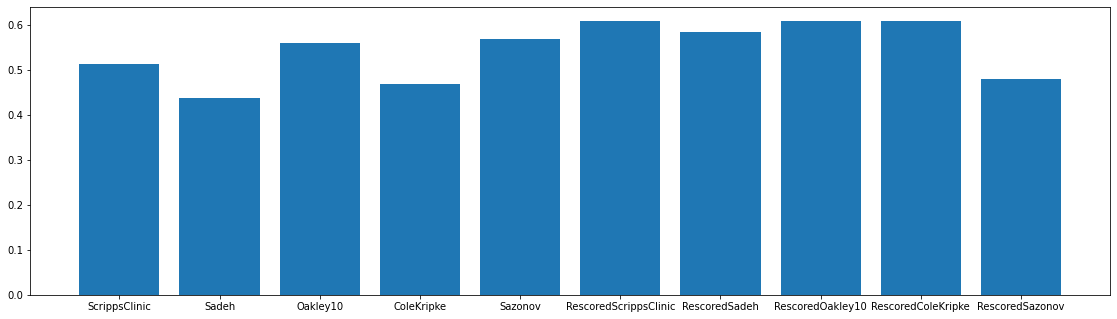

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
baselines = ['ScrippsClinic', 'Sadeh', 'Oakley10', 'ColeKripke', 'Sazonov',
            'RescoredScrippsClinic', 'RescoredSadeh', 'RescoredOakley10', 'RescoredColeKripke', 'RescoredSazonov'
            ]

mcc = result_bs.loc[result_bs['values'] == 'mcc'].values.tolist()
mcc[0].pop(0)

ax.bar(baselines,mcc[0])
plt.show()

In [23]:
# What we could have are boxplots for the different dimensions that we are inspecting:
# 3 boxplots: Featset, ML Model, winsize